In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

import charts as charts
import evaluations as evals

# Ignore warnings as they make notebook difficult to read (they are mostly useless)
import warnings

warnings.filterwarnings("ignore")

In [2]:
SEED = 42
np.random.seed(SEED)
CV = 5
F1_AVERAGING = 'micro'
F1_SCORE = f'f1_{F1_AVERAGING}'
WINE_PATH = f'{os.getcwd()}/figures/wine-quality'
STEP_1_PATH = f"{WINE_PATH}/step-1"
STEP_2_PATH = f"{WINE_PATH}/step-2"
STEP_3_PATH = f"{WINE_PATH}/step-3"
STEP_4_PATH = f"{WINE_PATH}/step-4"
STEP_5_PATH = f"{WINE_PATH}/step-5"

charts.setup_plots()

In [3]:
WINE_PATH

'/Users/pavponn/gatech/machine-learning/assignment-3/figures/wine-quality'

In [4]:
df = pd.read_csv('datasets/wine-quality/wine-quality-all.csv', delimiter=';', encoding='utf-8')
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train_color_df = X_train['color']
X_train_color = X_train_color_df.values.reshape(-1, 1)
X_test_color_df = X_test['color']
X_test_color = X_test['color'].values.reshape(-1, 1)


In [5]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded_color = encoder.fit_transform(X_train_color)
X_test_encoded_color = encoder.transform(X_test_color)

# Get the column names after one-hot encoding
encoded_color_columns = encoder.get_feature_names_out(['color'])

# Step 2: Concatenating with Original Data
X_train_reset = X_train.drop(columns=['color']).reset_index(drop=True)
X_train_encoded_color_reset = pd.DataFrame(X_train_encoded_color, columns=encoded_color_columns).reset_index(drop=True)
X_train_e = pd.concat([X_train_reset, X_train_encoded_color_reset], axis=1)

X_test_reset = X_test.drop(columns=['color']).reset_index(drop=True)
X_test_encoded_color_reset = pd.DataFrame(X_test_encoded_color, columns=encoded_color_columns).reset_index(drop=True)
X_test_e = pd.concat([X_test_reset, X_test_encoded_color_reset], axis=1)

X_all_e = pd.concat((X_train_e, X_test_e), axis=0)

# Step 3: Normalization (Standard Scaling)
scaler = StandardScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train_e), columns=X_train_e.columns)
X_test_normalized = pd.DataFrame(scaler.transform(X_test_e), columns=X_test_e.columns)

# Combine the normalized data
X_normalized = pd.concat((X_train_normalized, X_test_normalized), axis=0)


In [6]:
X_train = X_train_normalized
X_test = X_test_normalized

In [7]:
importlib.reload(charts)
# avoid creating ths plot again, as it is saved and recreating takes a loooot of time
# charts.pair_plot(X_train, f"{WINE_PATH}/pair_plot.png")

<module 'charts' from '/Users/pavponn/gatech/machine-learning/assignment-3/charts.py'>

In [8]:
# avoid creating ths plot again, as it is saved and recreating takes a loooot of time
# charts.pair_plot(pd.concat([X_train, X_train_color_df], axis=1), f"{WINE_PATH}/pair_plot_with_color.png", hue='color')

In [9]:
# avoid creating ths plot again, as it is saved and recreating takes a loooot of time
# charts.pair_plot(pd.concat([X_train, y_train], axis=1), f"{WINE_PATH}/pair_plot_with_label.png", hue='quality')

# Step 1 (Clustering algorithms)

## K-Means

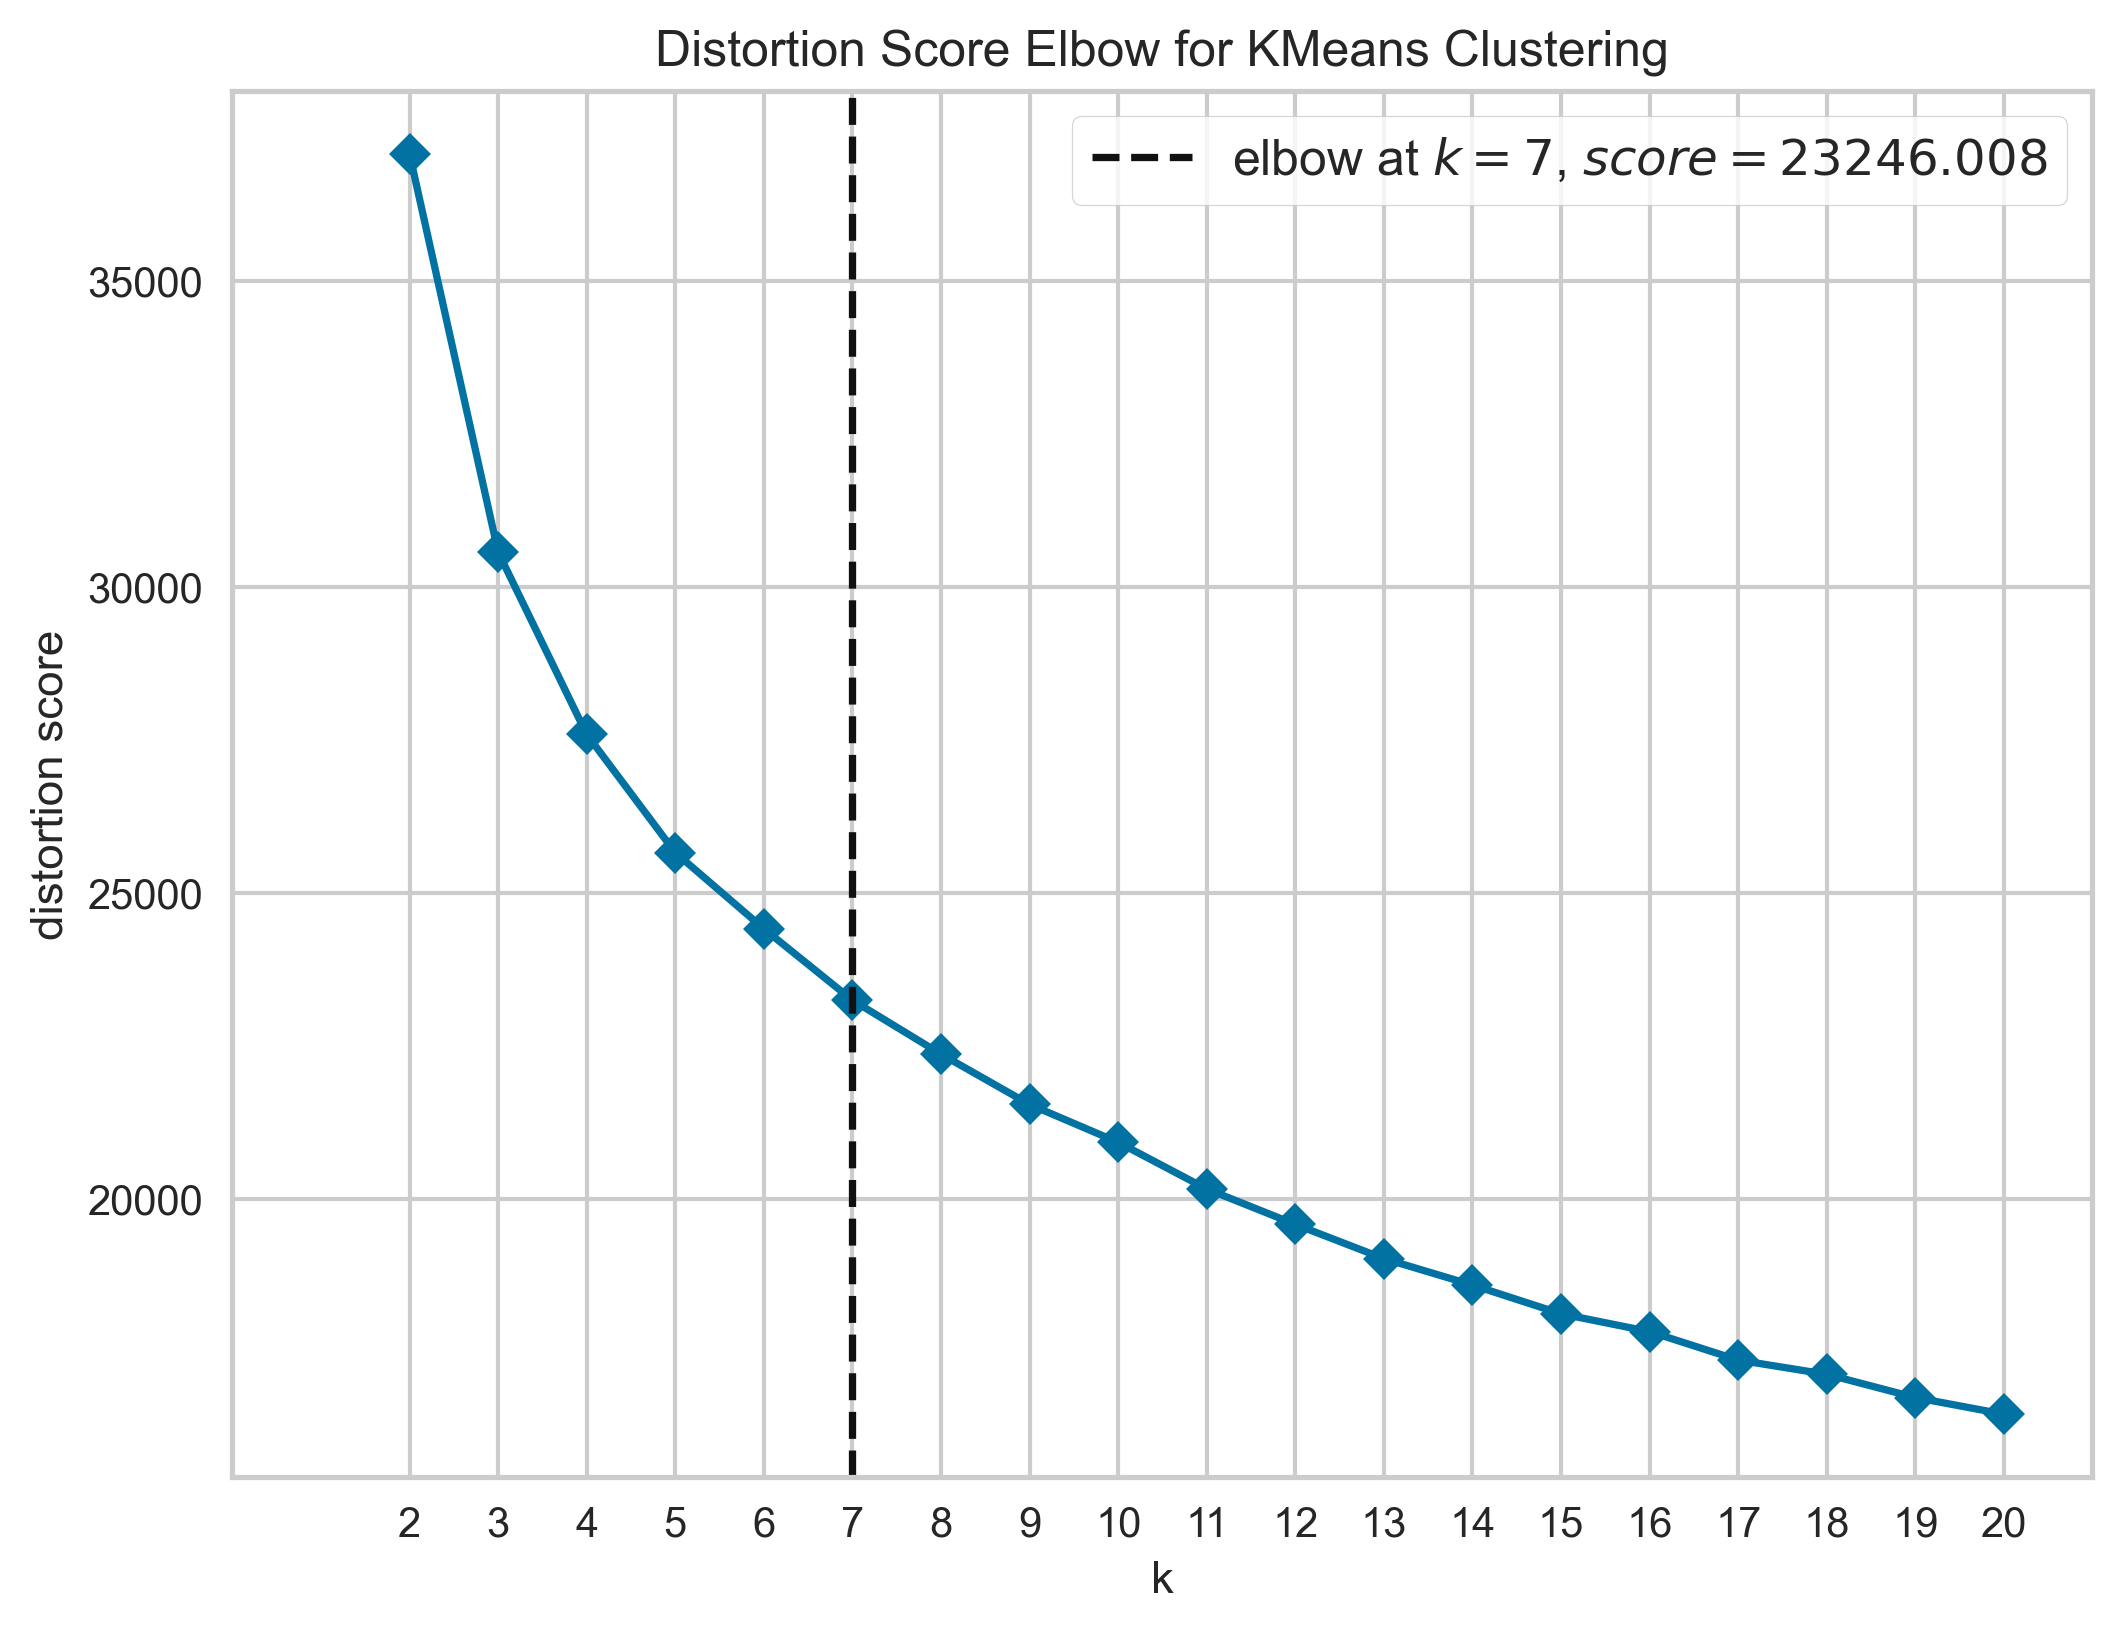

In [10]:
importlib.reload(charts)
# Using distortion/inertia
charts.k_means_visualize(X_train,
                         output_path=f"{STEP_1_PATH}/k_means_distortion.png",
                         seed=SEED,
                         metric='distortion',
                         locate_elbow=True)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


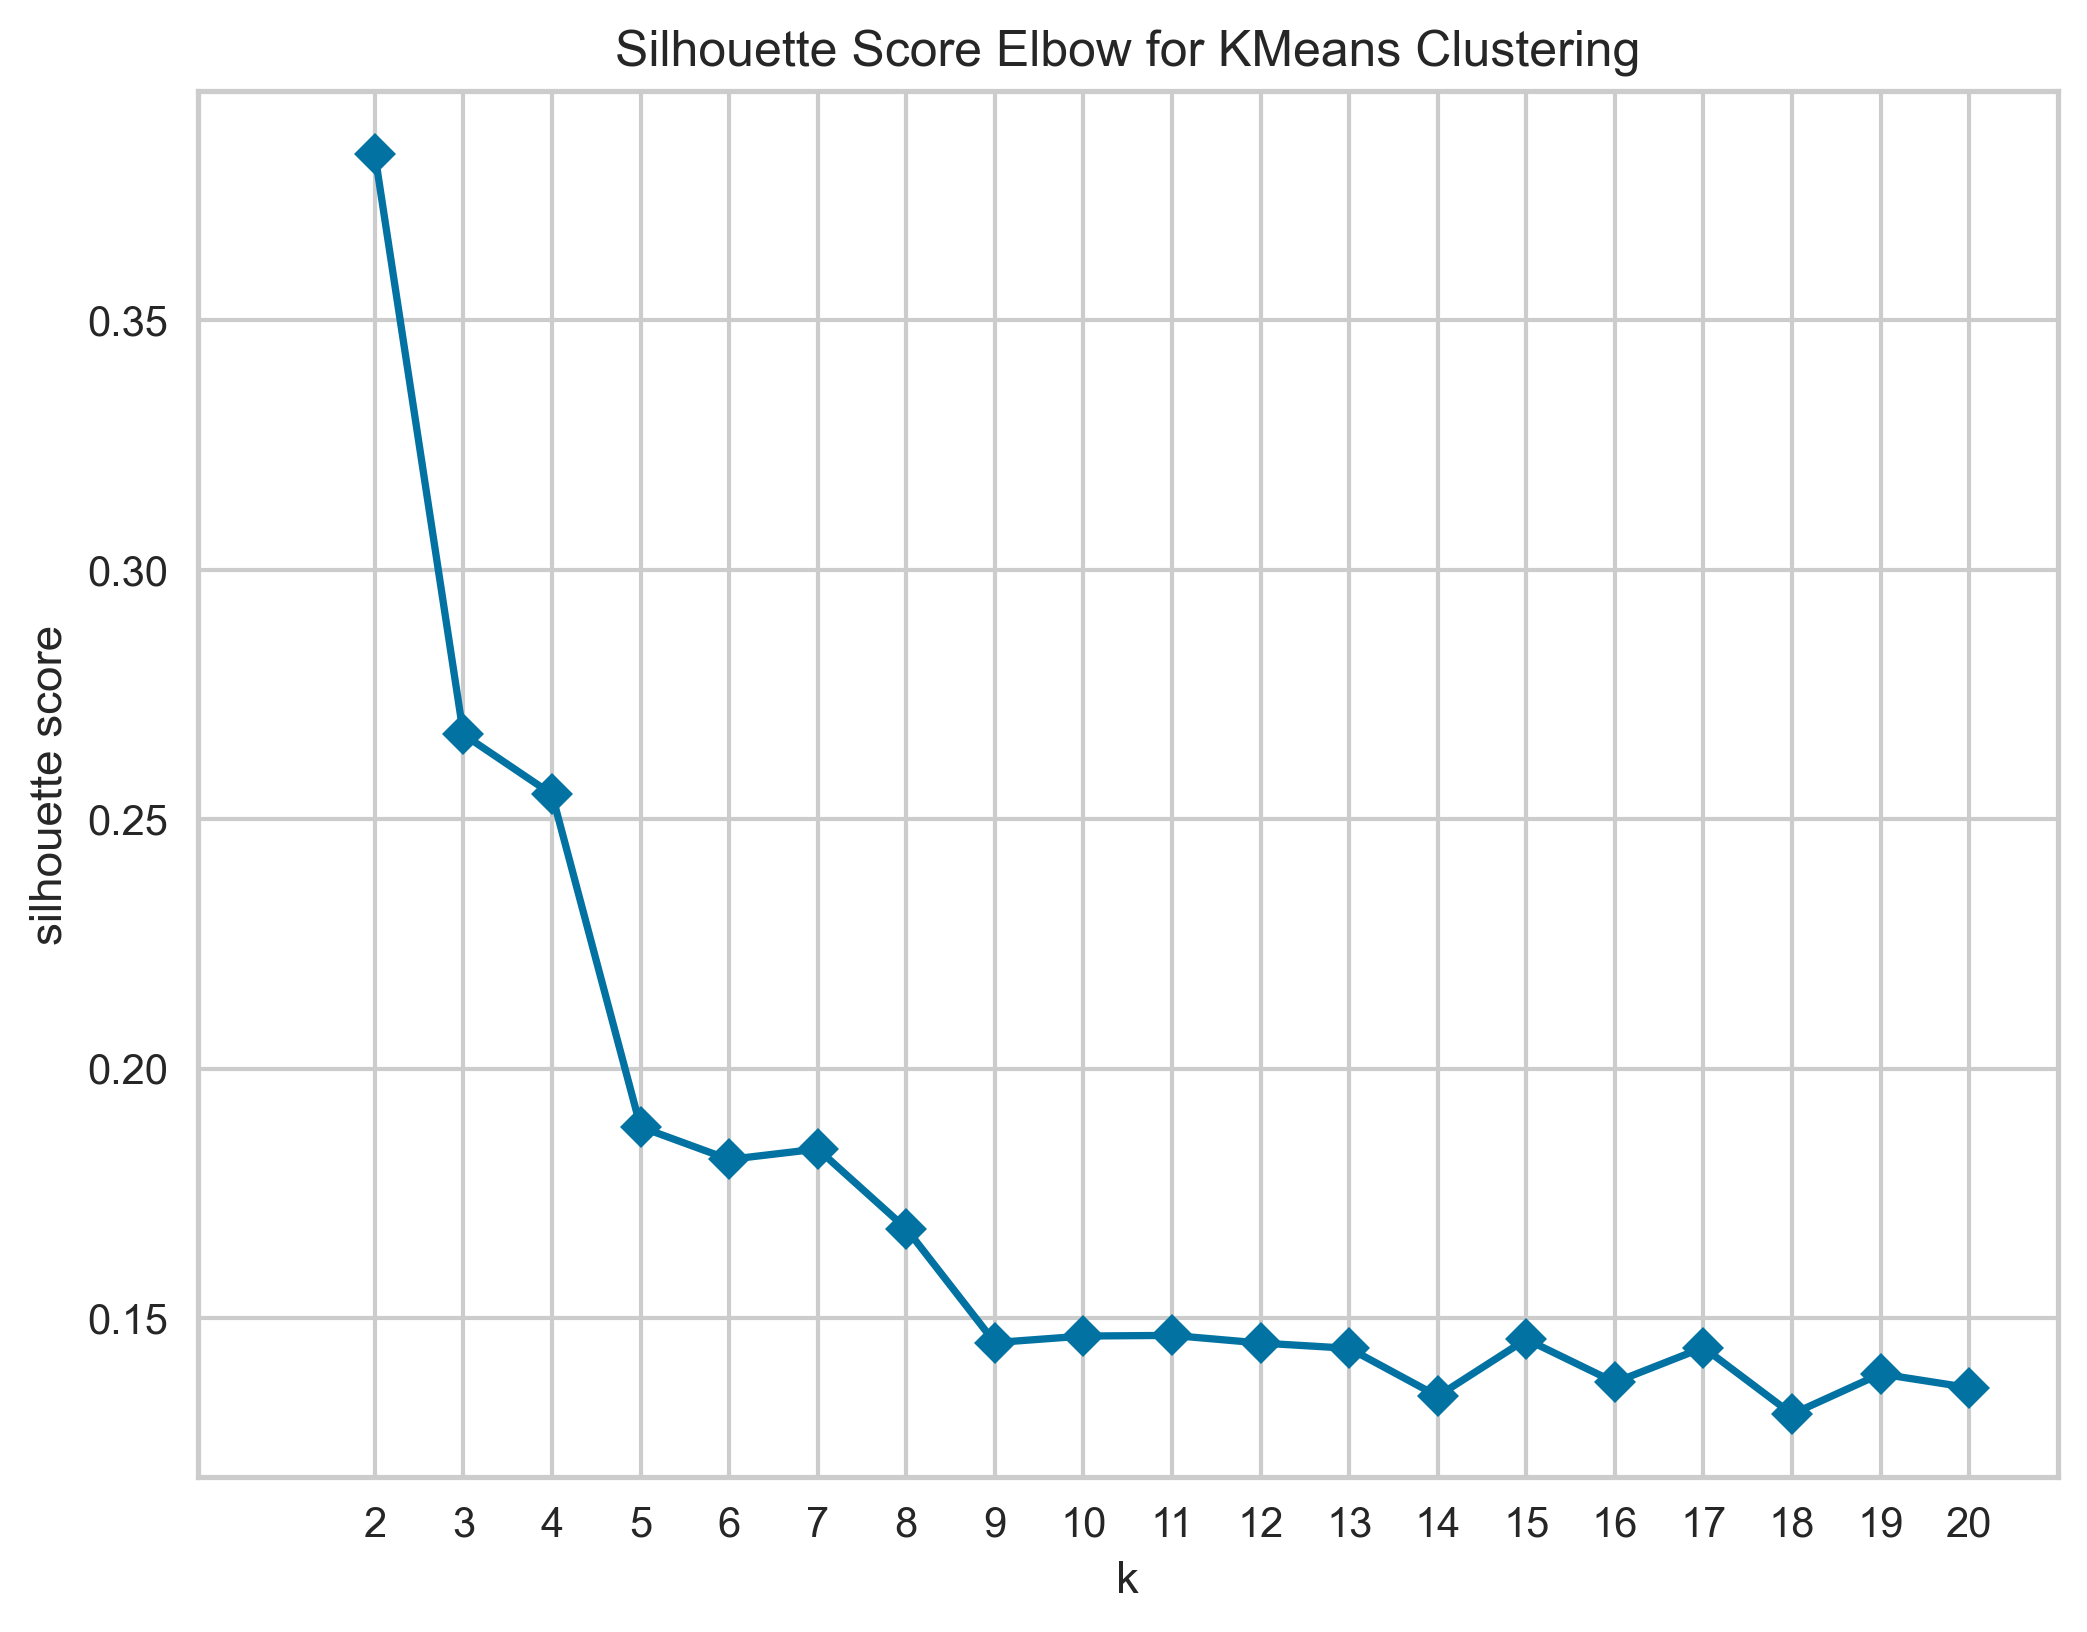

In [11]:
charts.k_means_visualize(X_train,
                         output_path=f"{STEP_1_PATH}/k_means_silhouette.png",
                         seed=SEED,
                         metric='silhouette',
                         locate_elbow=False)

## Expectation Maximization

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


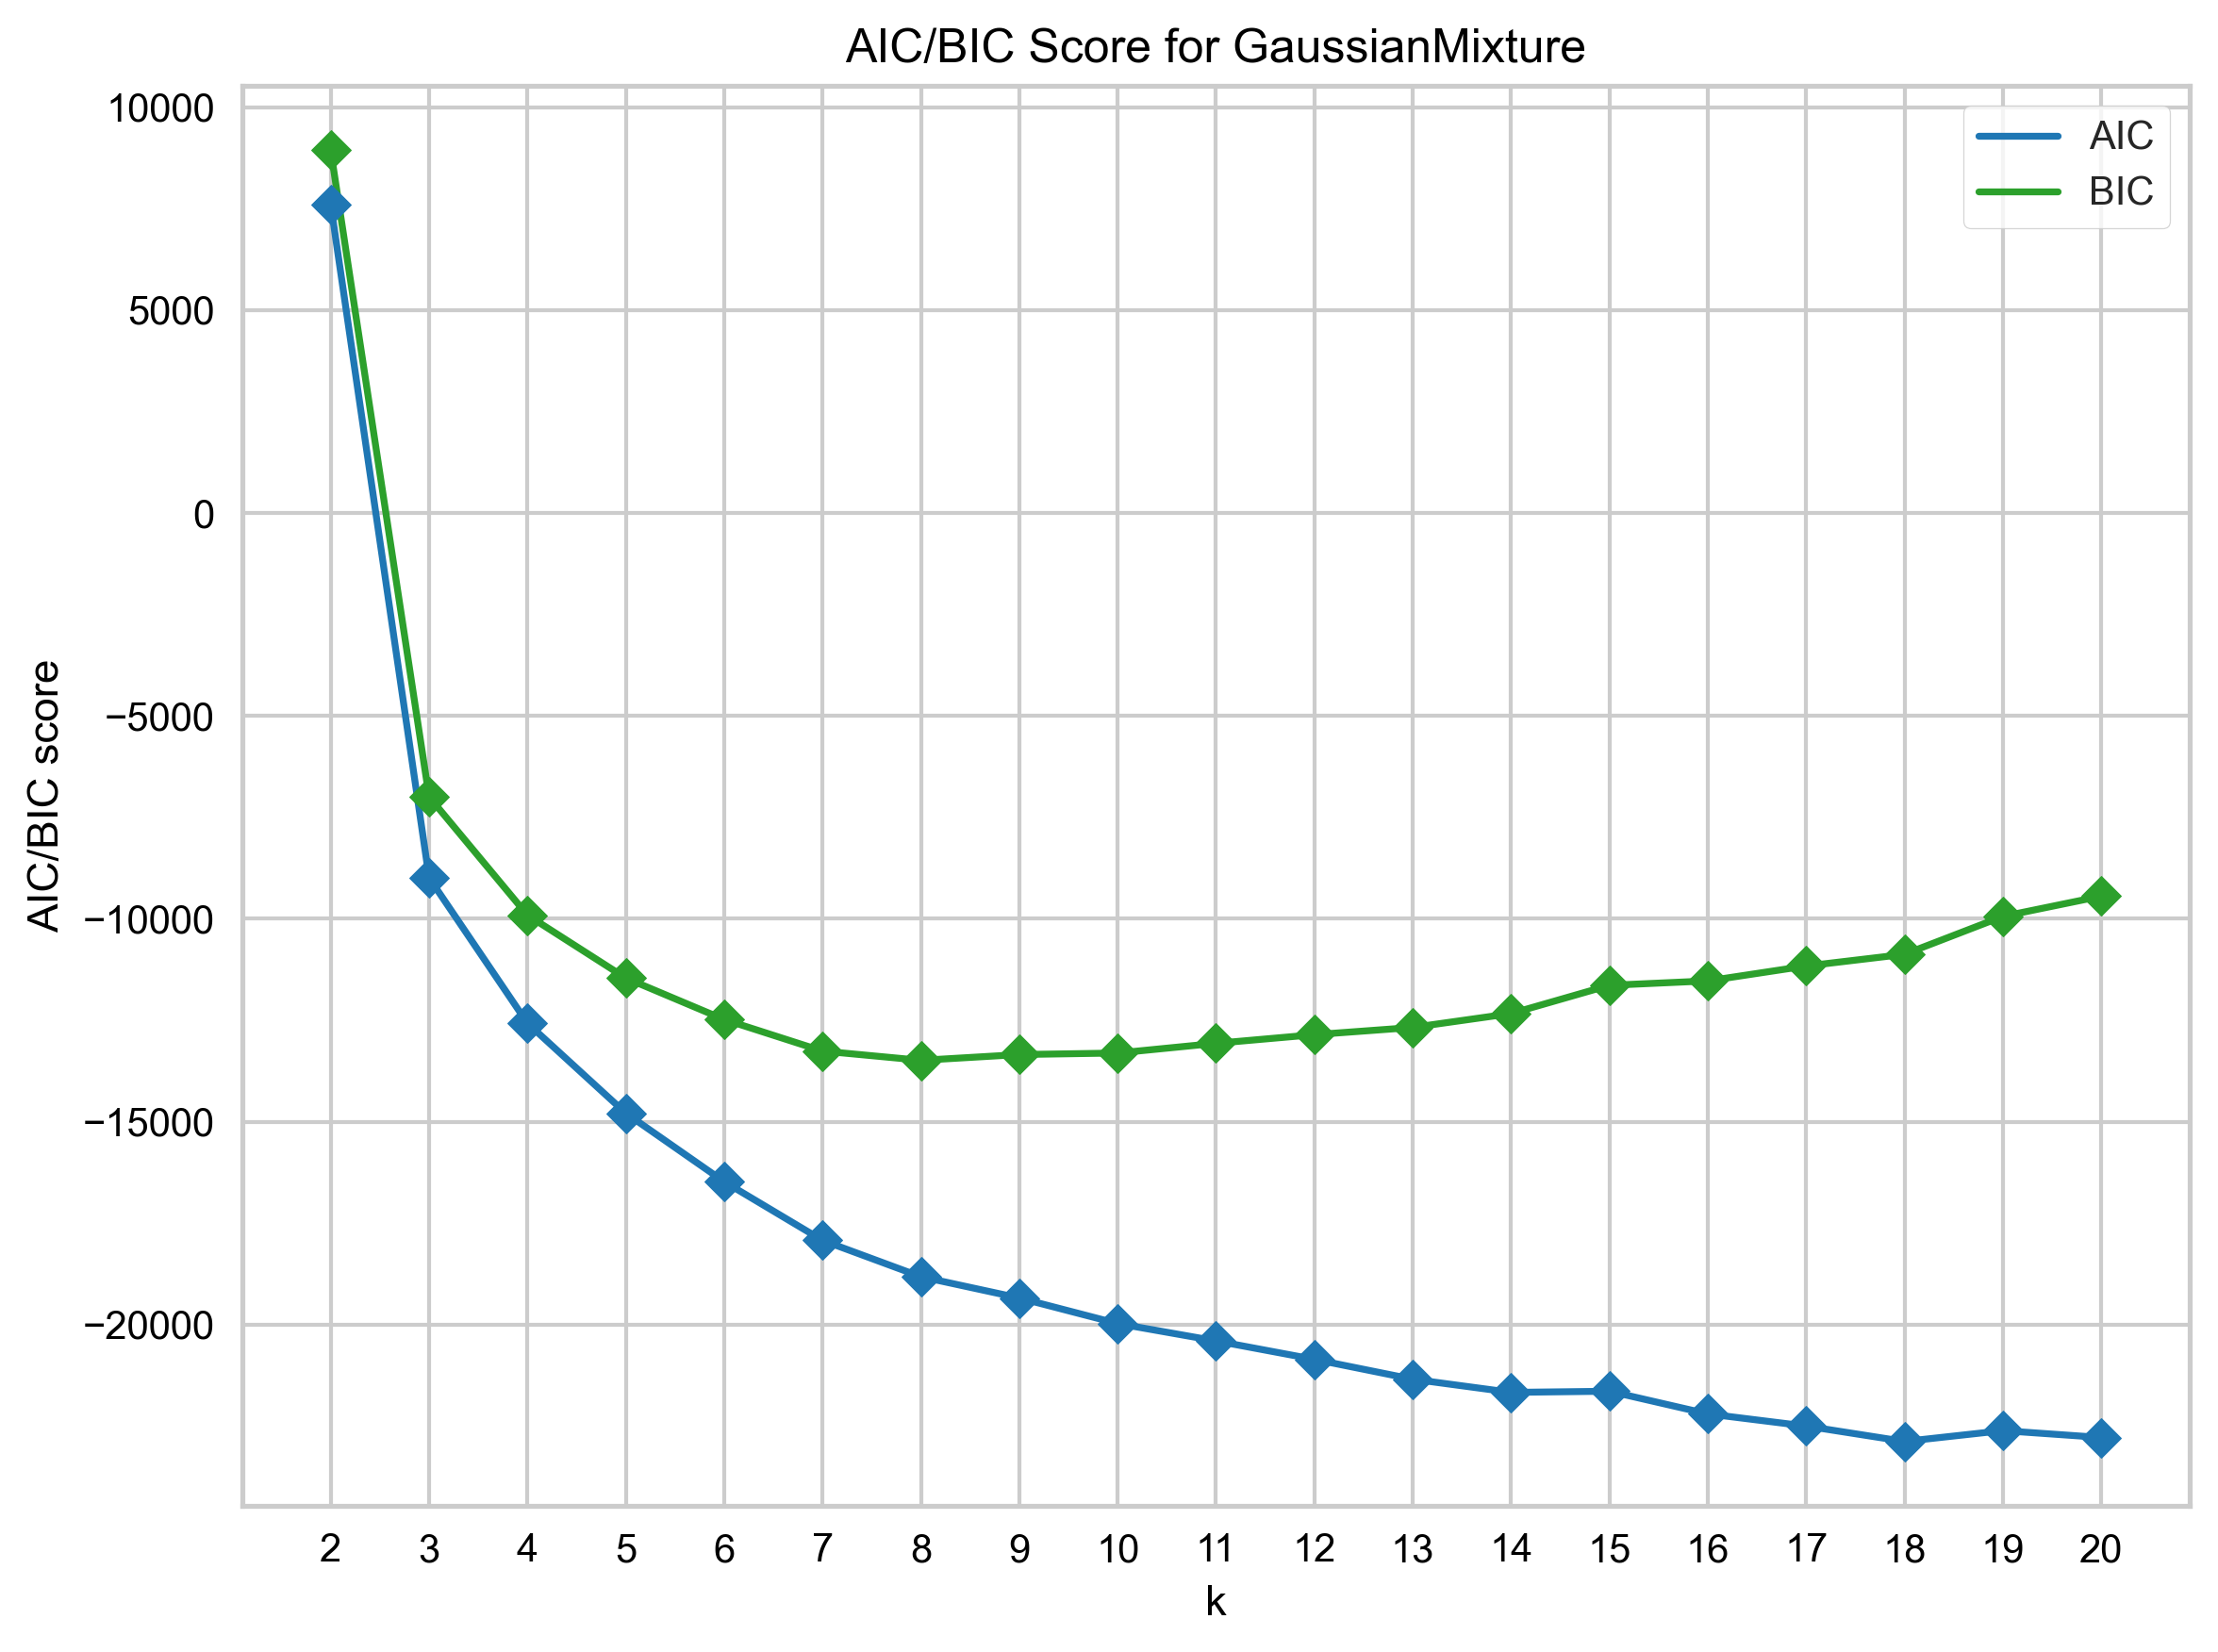

In [12]:
importlib.reload(charts)
charts.gmm_visualize_aic_bic(
    X_data=X_train,
    output_path=f"{STEP_1_PATH}/em_aic_bic.png",
    seed=SEED,
    k_max=20,
    n_init=10,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


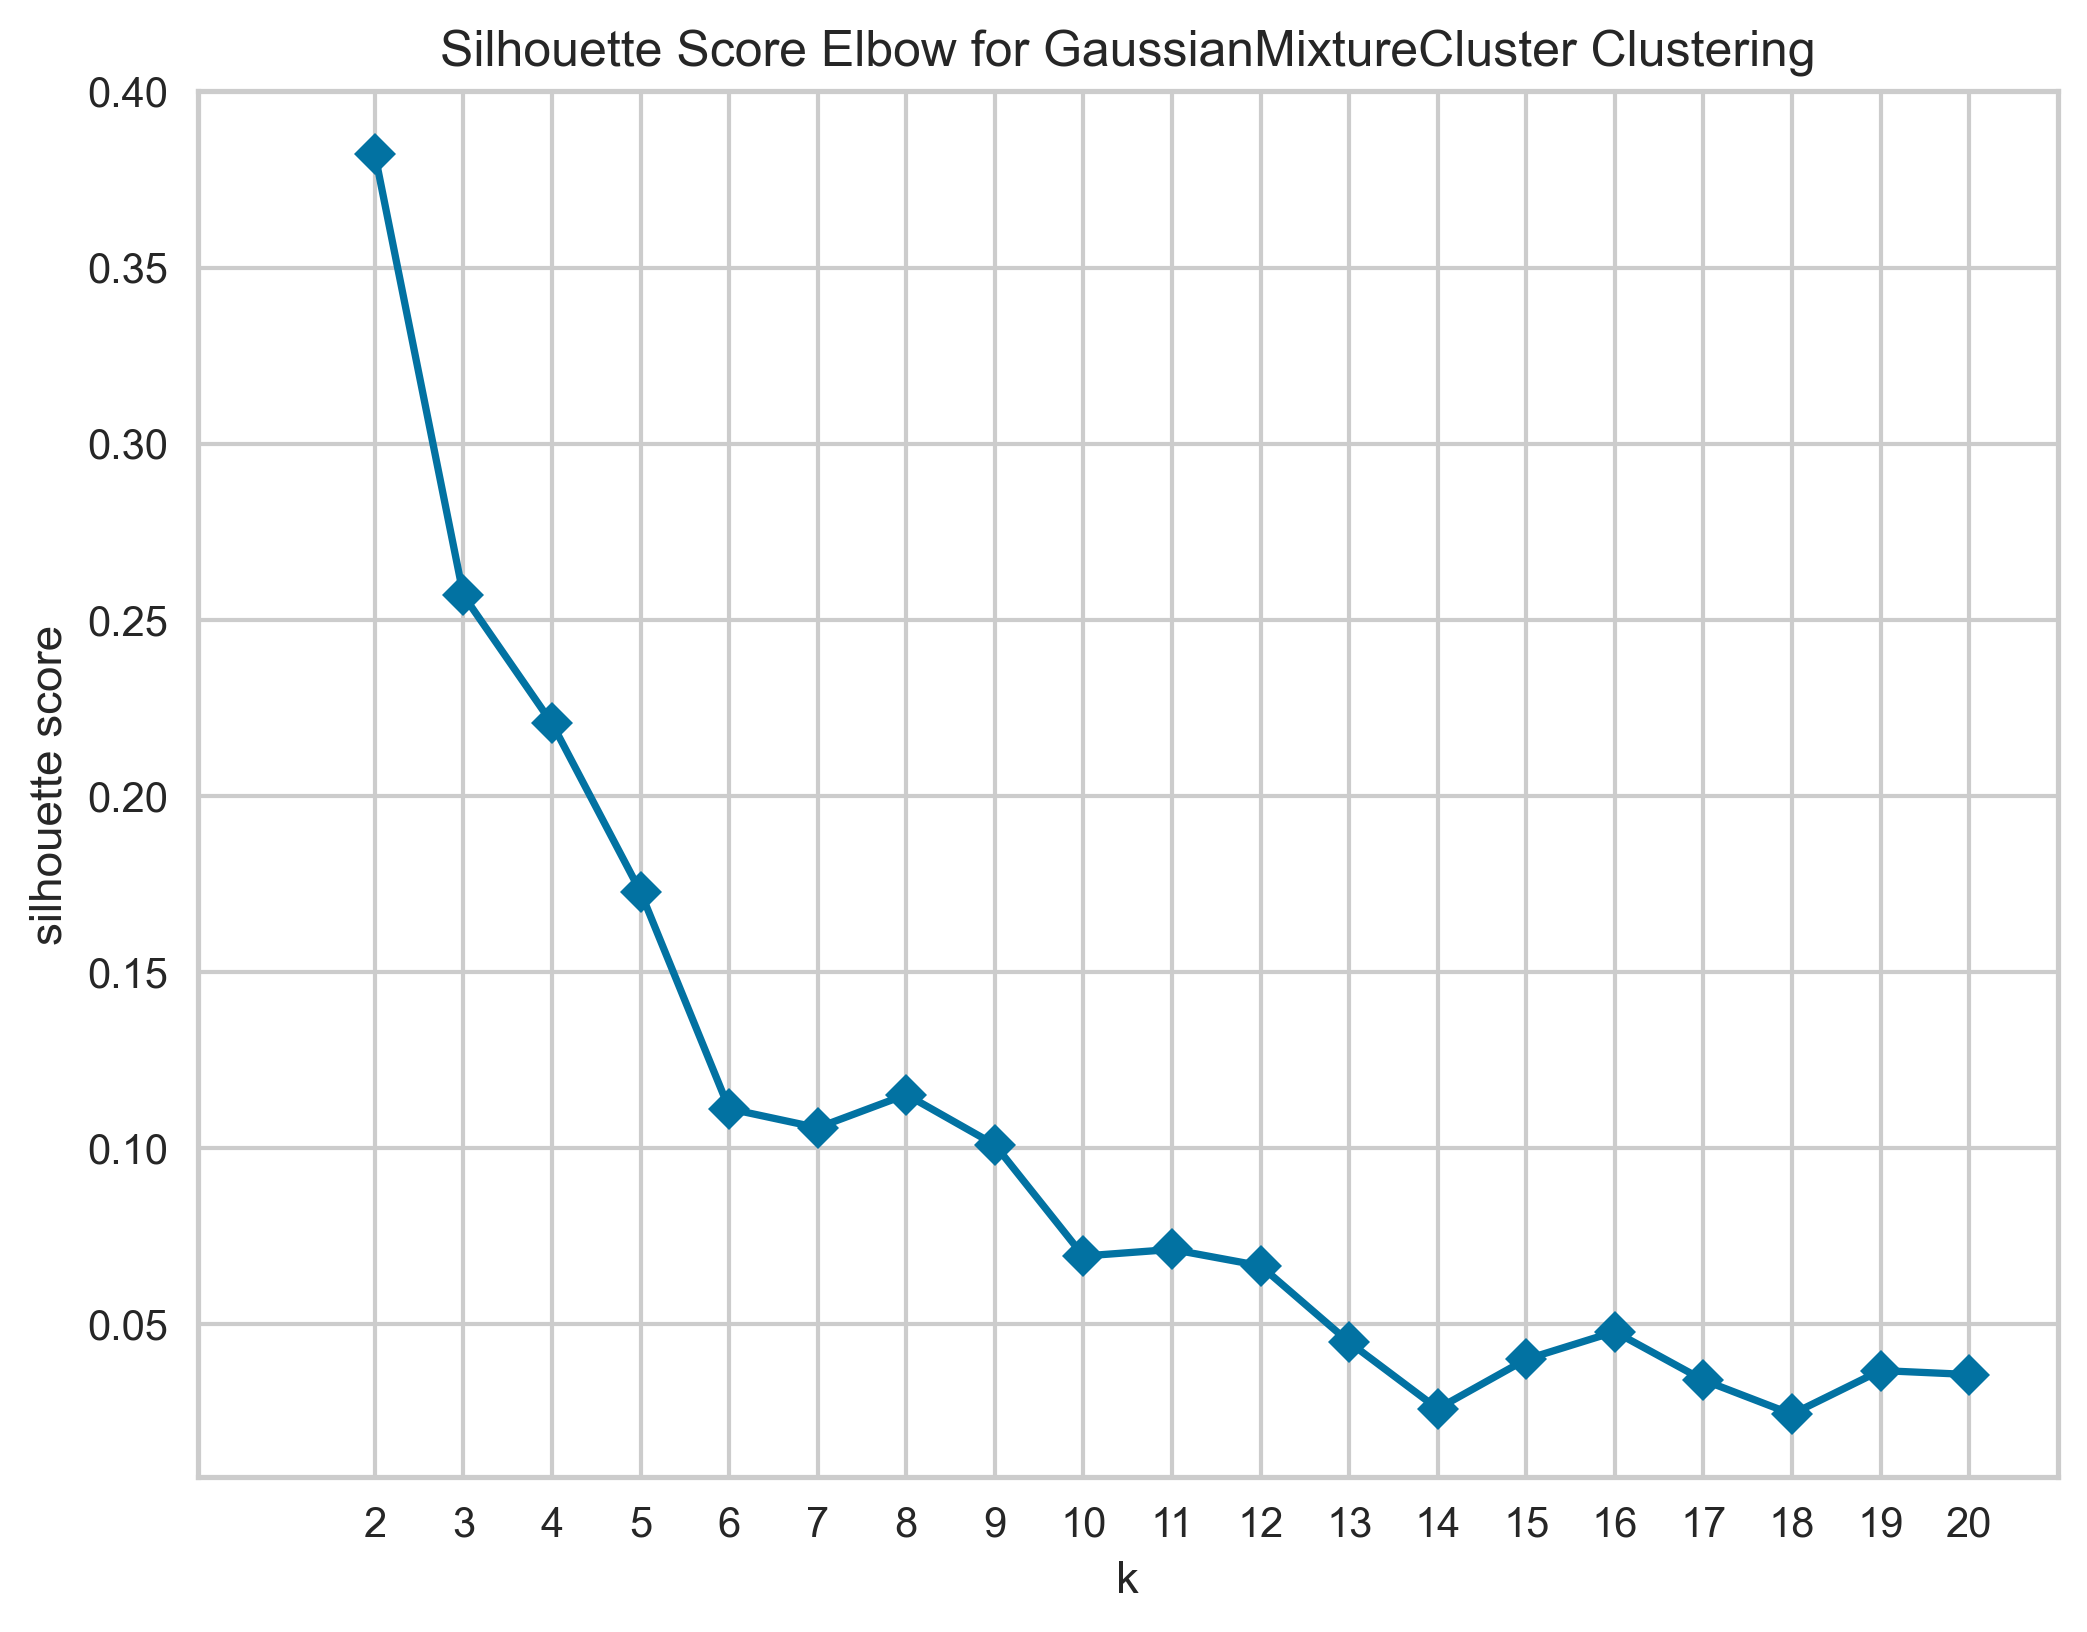

In [13]:
importlib.reload(charts)
charts.gmm_visualize(
    X_data=X_train,
    output_path=f"{STEP_1_PATH}/em_silhouette.png",
    metric='silhouette',
    seed=SEED,
    k_max=20,
    n_init=10,
    locate_elbow=False,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


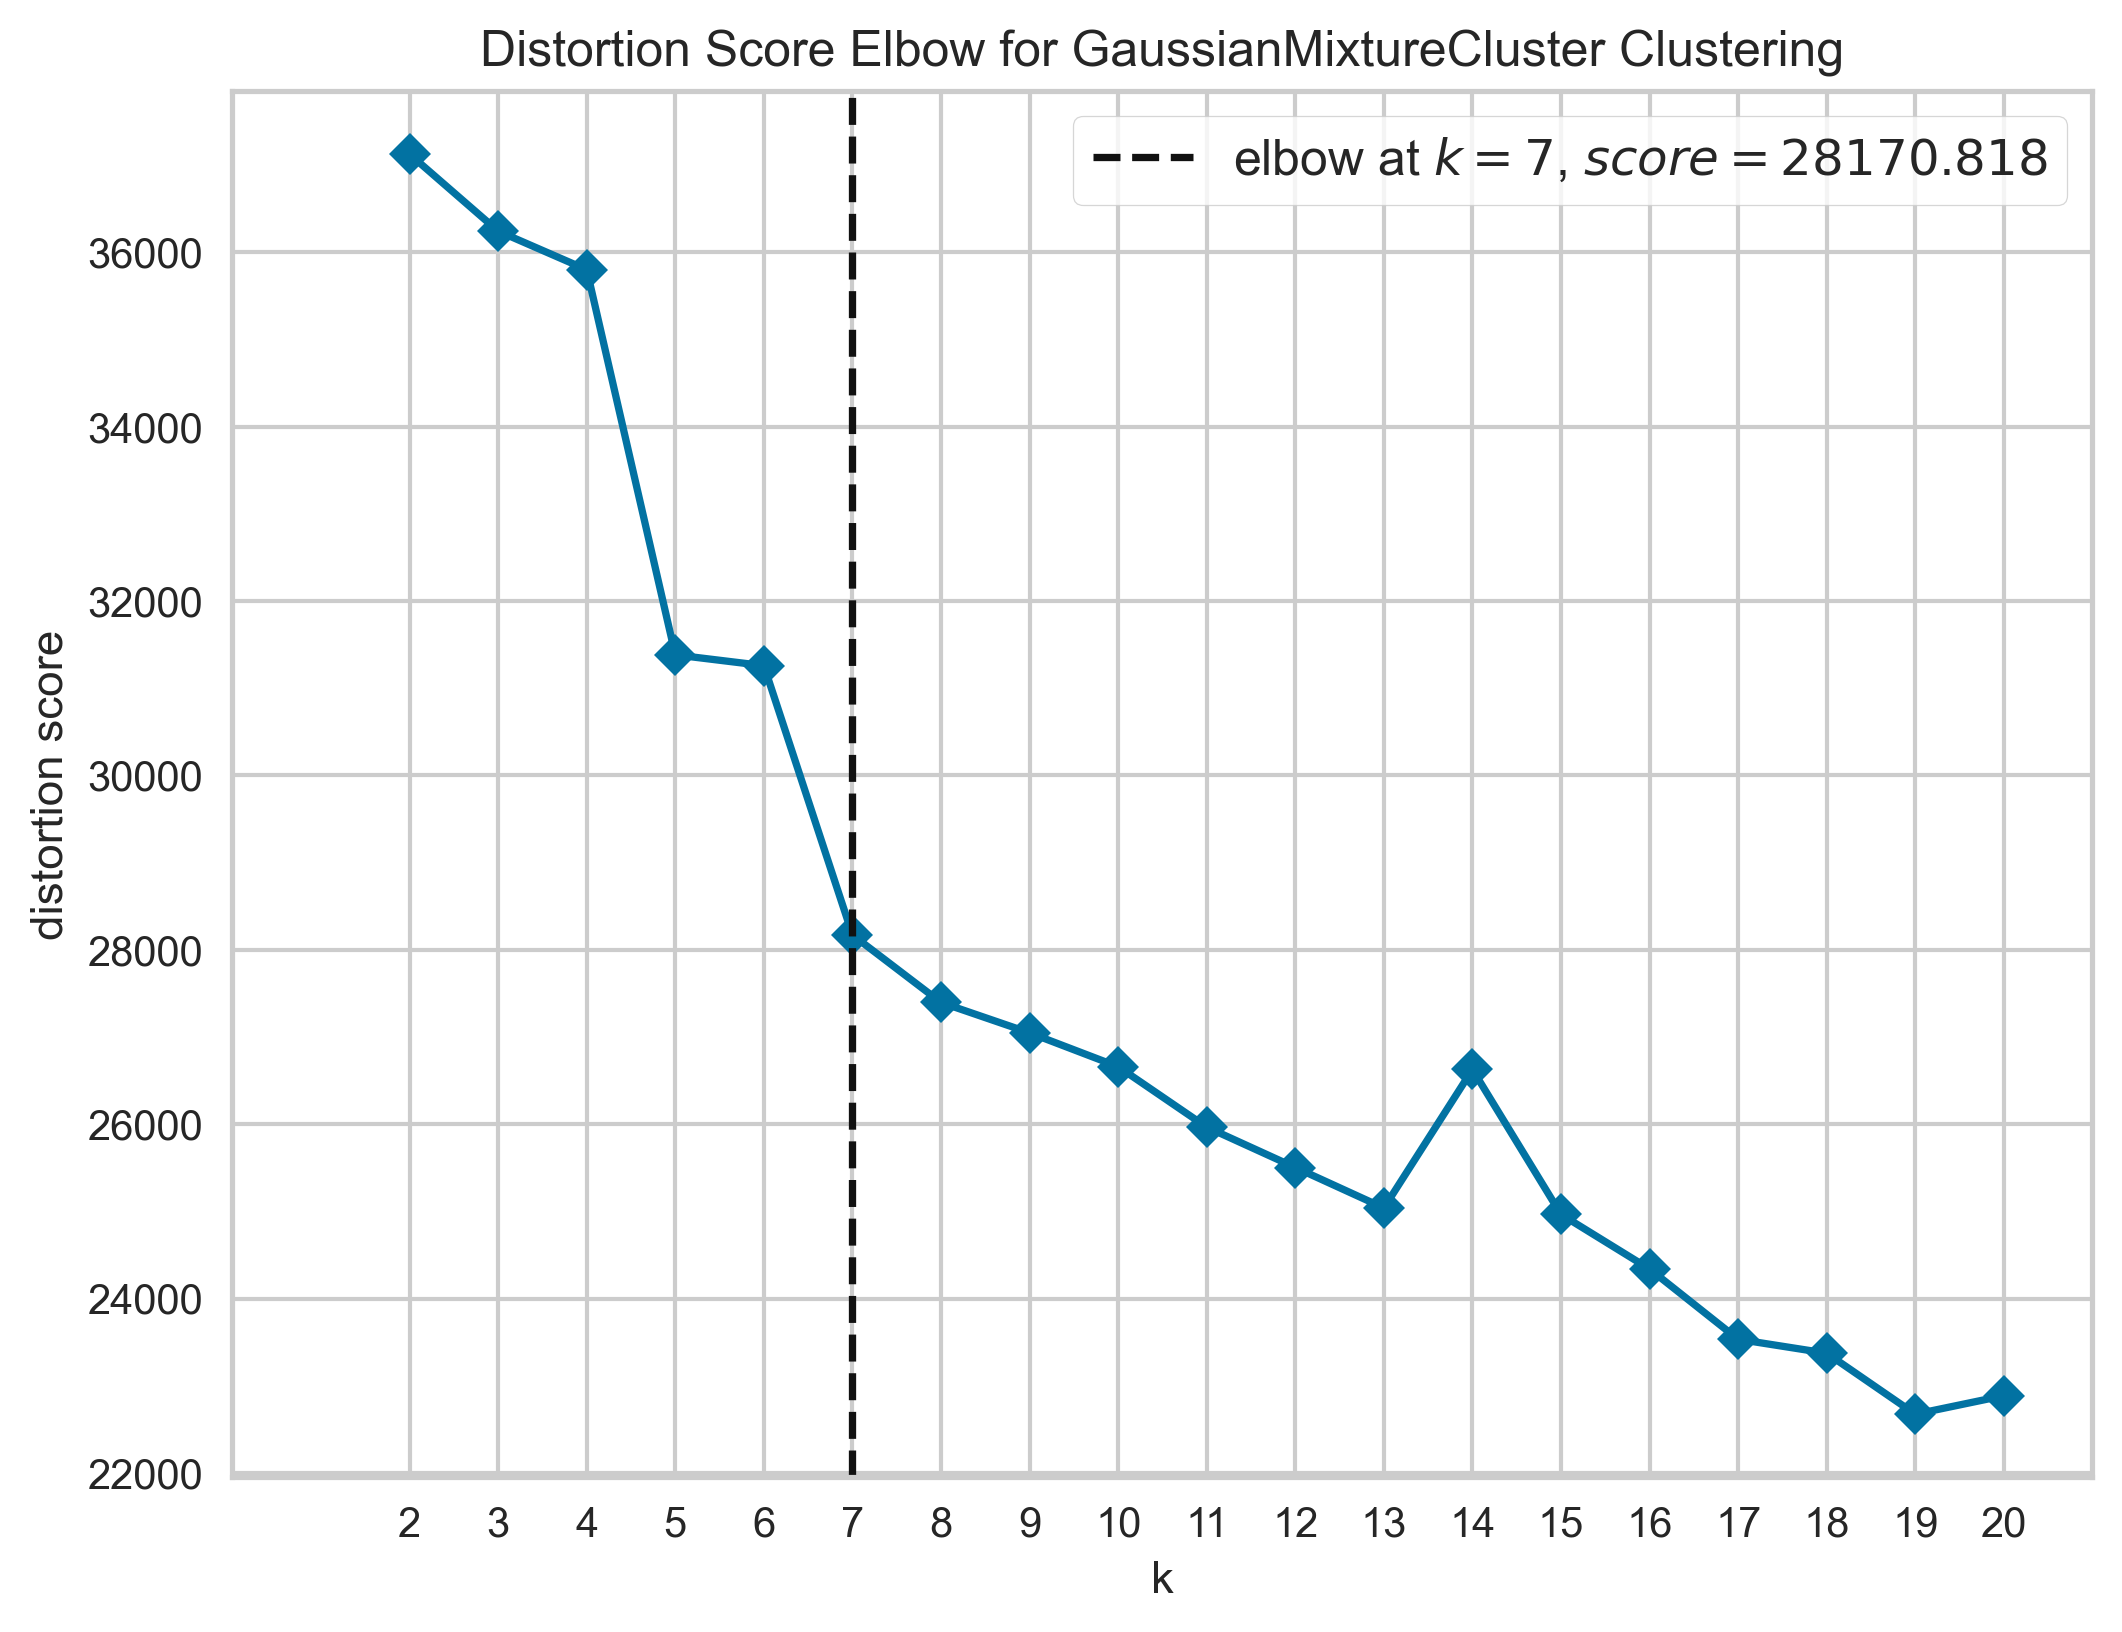

In [14]:
importlib.reload(charts)
charts.gmm_visualize(
    X_data=X_train,
    output_path=f"{STEP_1_PATH}/em_distortion_do_not_use.png",
    metric='distortion',
    seed=SEED,
    k_max=20,
    n_init=10,
)

## Evaluation

In [17]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

importlib.reload(evals)

#  evaluation
evals.evaluate_models(
    models=[
        ('KMeans (k=7)', KMeans(random_state=SEED, n_clusters=7)),
        ('KMeans (k=2)', KMeans(random_state=SEED, n_clusters=2)),
        ('GMM (k=8)', GaussianMixture(random_state=SEED, n_components=8, n_init=10)),
        ('GMM (k=2)', GaussianMixture(random_state=SEED, n_components=2, n_init=10)),
    ],
    X_data=X_train,
    labels=y_train
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  Homogeneity  Completeness  V Measure  \
KMeans (k=7) 0    0.625605     0.071989      0.051439   0.060003   
KMeans (k=2) 0    0.456825     0.006563      0.014987   0.009128   
GMM (k=8)    0    0.625141     0.077637      0.053738   0.063513   
GMM (k=2)    0    0.457064     0.006252      0.014244   0.008689   

                Mutual Information  Fowlkes-Mallows index  
KMeans (k=7) 0            0.092530               0.262941  
KMeans (k=2) 0            0.008436               0.452000  
GMM (k=8)    0            0.099790               0.269107  
GMM (k=2)    0            0.008035               0.451394

In [18]:
# Colors evaluation
evals.evaluate_models(
    models=[
        ('KMeans (k=7)', KMeans(random_state=SEED, n_clusters=7)),
        ('KMeans (k=2)', KMeans(random_state=SEED, n_clusters=2)),
        ('GMM (k=8)', GaussianMixture(random_state=SEED, n_components=8, n_init=10)),
        ('GMM (k=2)', GaussianMixture(random_state=SEED, n_components=2, n_init=10)),
    ],
    X_data=X_train,
    labels=X_train_color_df
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  Homogeneity  Completeness  V Measure  \
KMeans (k=7) 0    0.546300     0.967342      0.303231   0.461725   
KMeans (k=2) 0    0.995311     0.970640      0.972412   0.971525   
GMM (k=8)    0    0.553262     1.000000      0.303653   0.465850   
GMM (k=2)    0    0.999530     0.996677      0.996224   0.996450   

                Mutual Information  Fowlkes-Mallows index  
KMeans (k=7) 0            0.545464               0.521868  
KMeans (k=2) 0            0.547323               0.996243  
GMM (k=8)    0            0.563879               0.532454  
GMM (k=2)    0            0.562005               0.999623

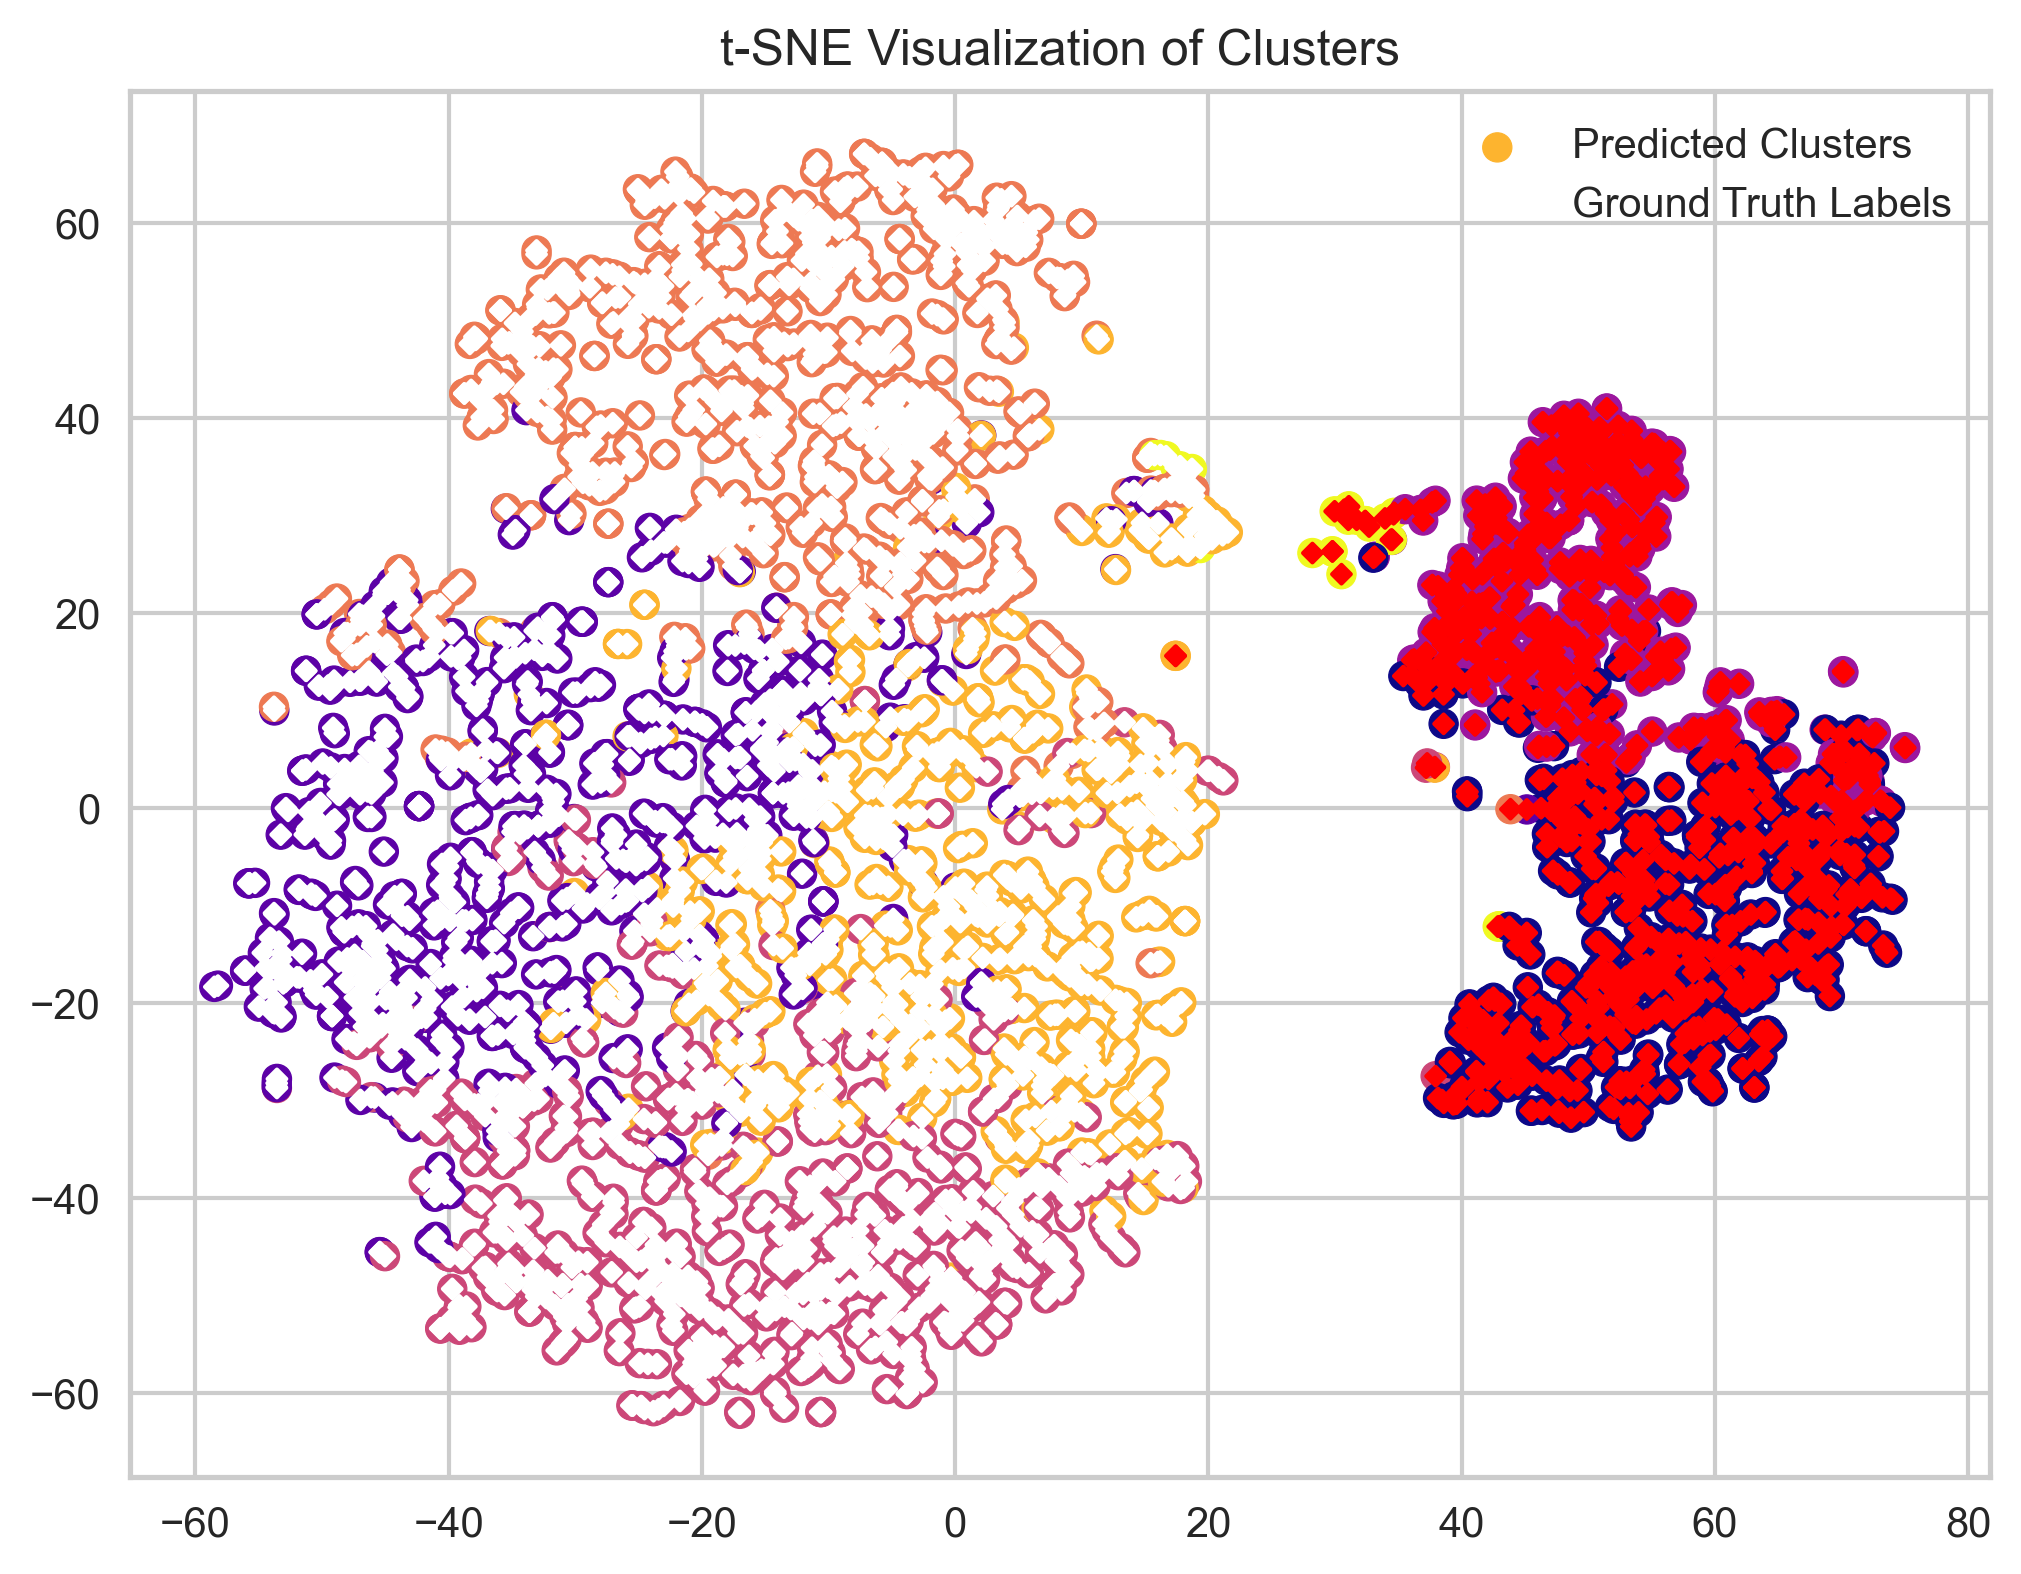

In [39]:
importlib.reload(charts)
charts.visualize_clusters_with_tsne(
    model=KMeans(random_state=SEED, n_clusters=7),
    X_data=X_train,
    labels=None,  # Otherwise it is so-so
    output_path=f"{STEP_1_PATH}/k_means_clusters_visualization.png",
    seed=SEED,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


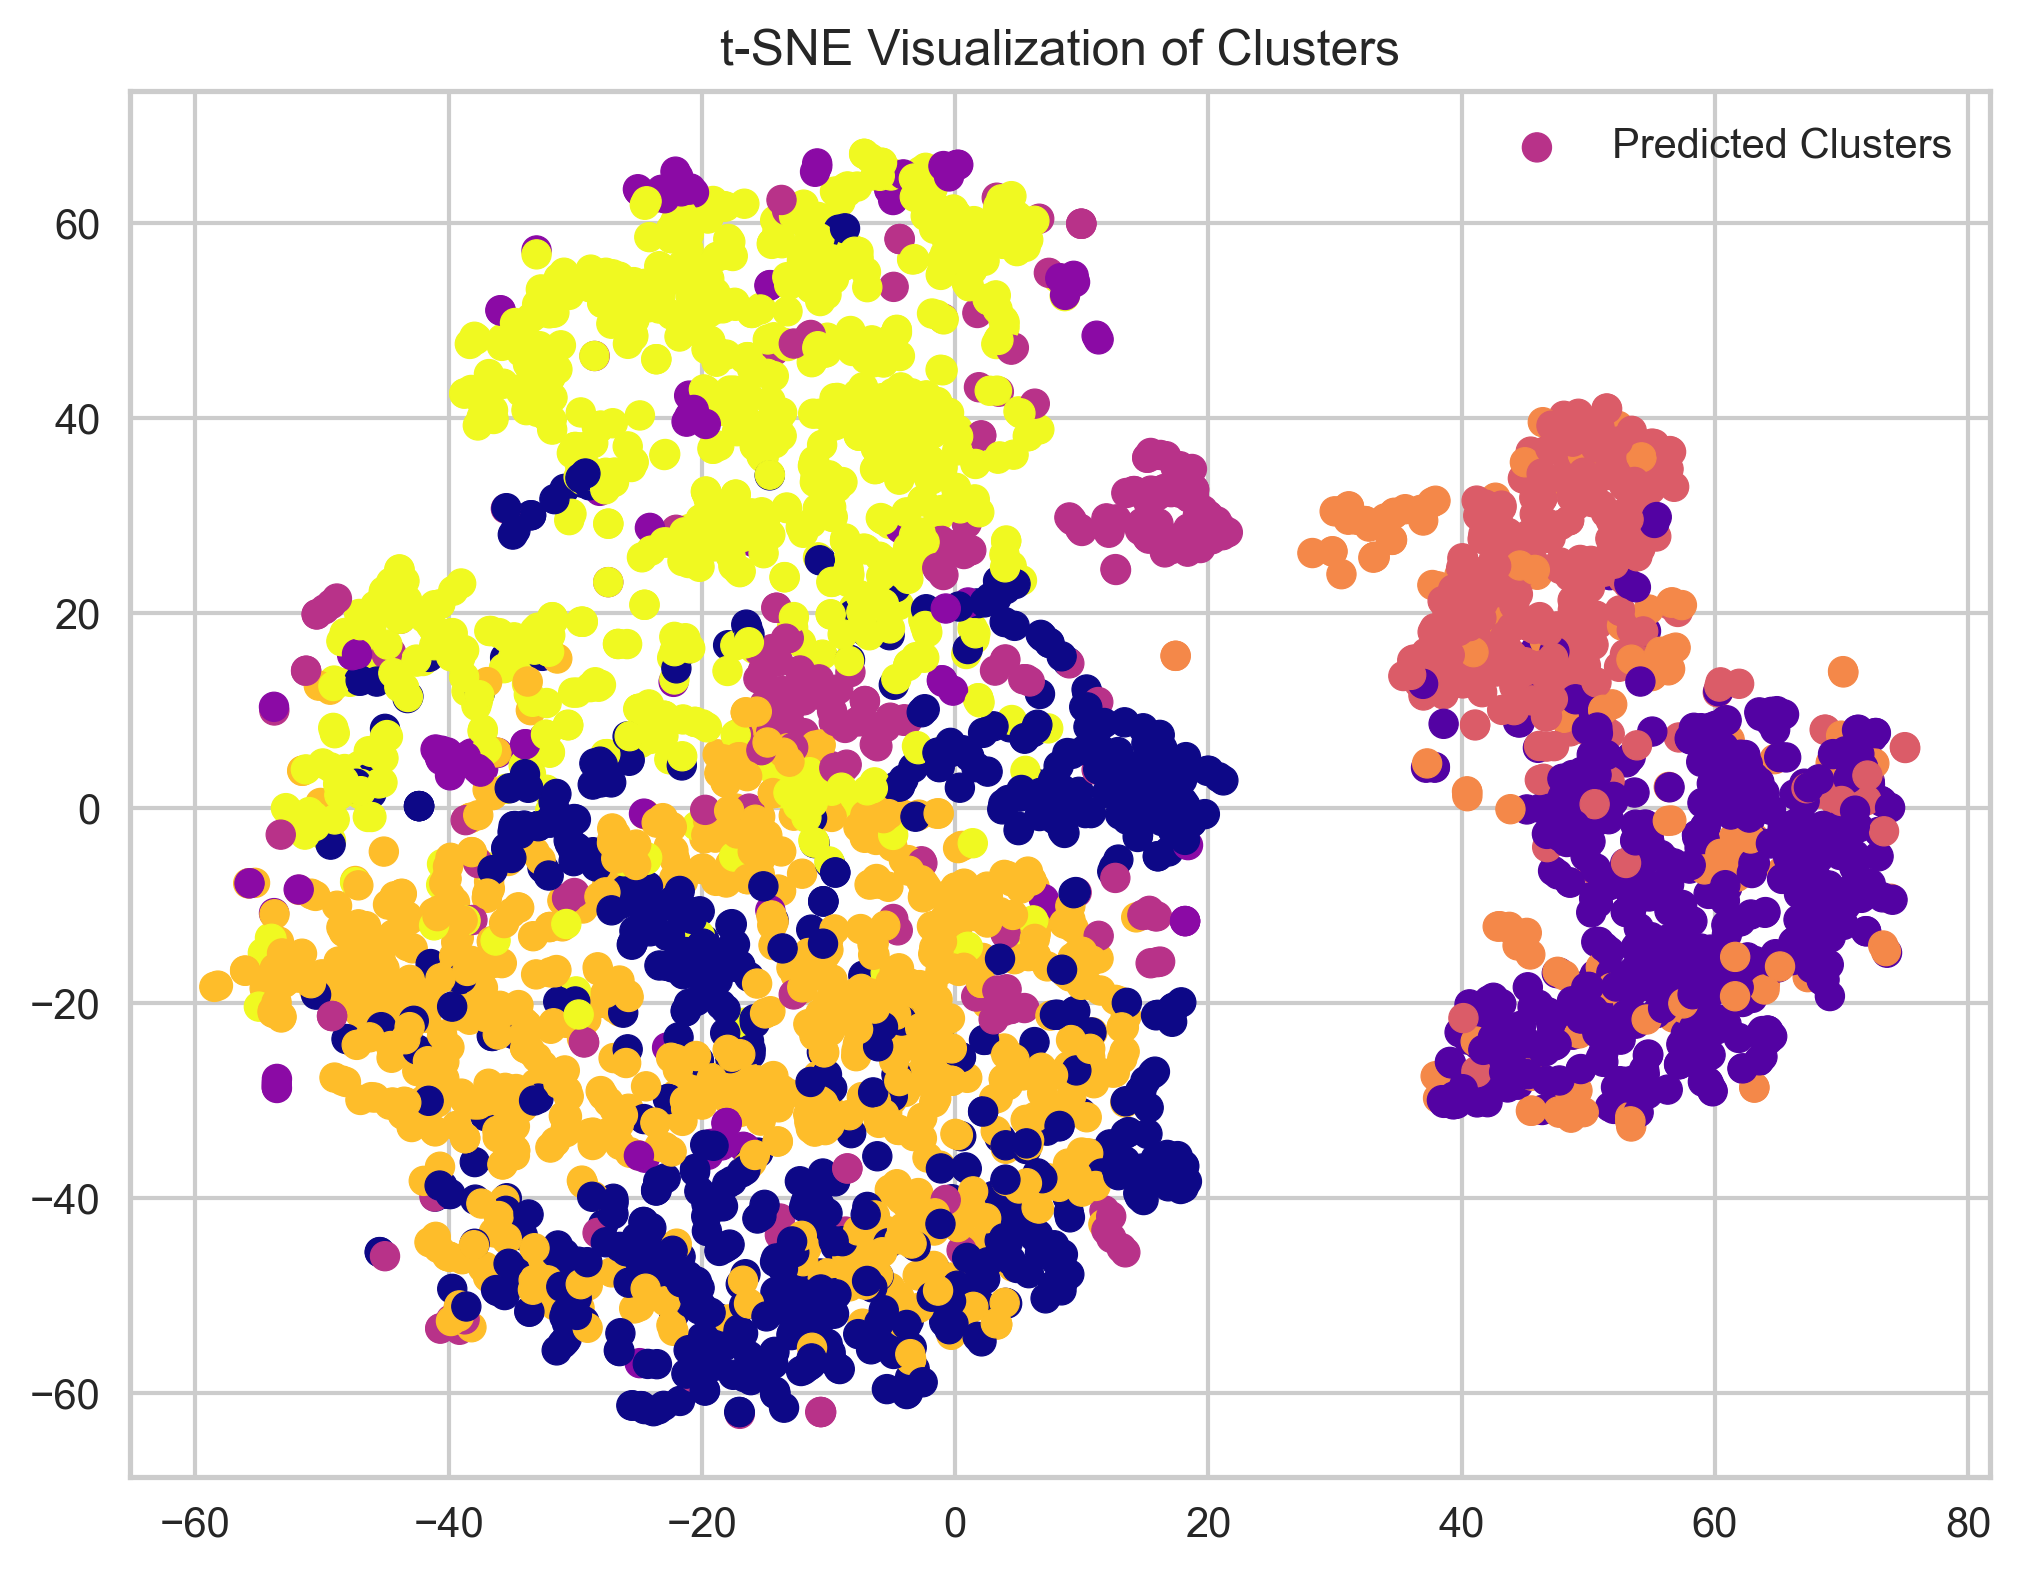

In [40]:
importlib.reload(charts)
charts.visualize_clusters_with_tsne(
    model=GaussianMixture(random_state=SEED, n_components=8, n_init=10),
    X_data=X_train,
    labels=None,  # Otherwise it is so-so
    output_path=f"{STEP_1_PATH}/em_clusters_visualization.png",
    seed=SEED,
)

# Step 2

## PCA

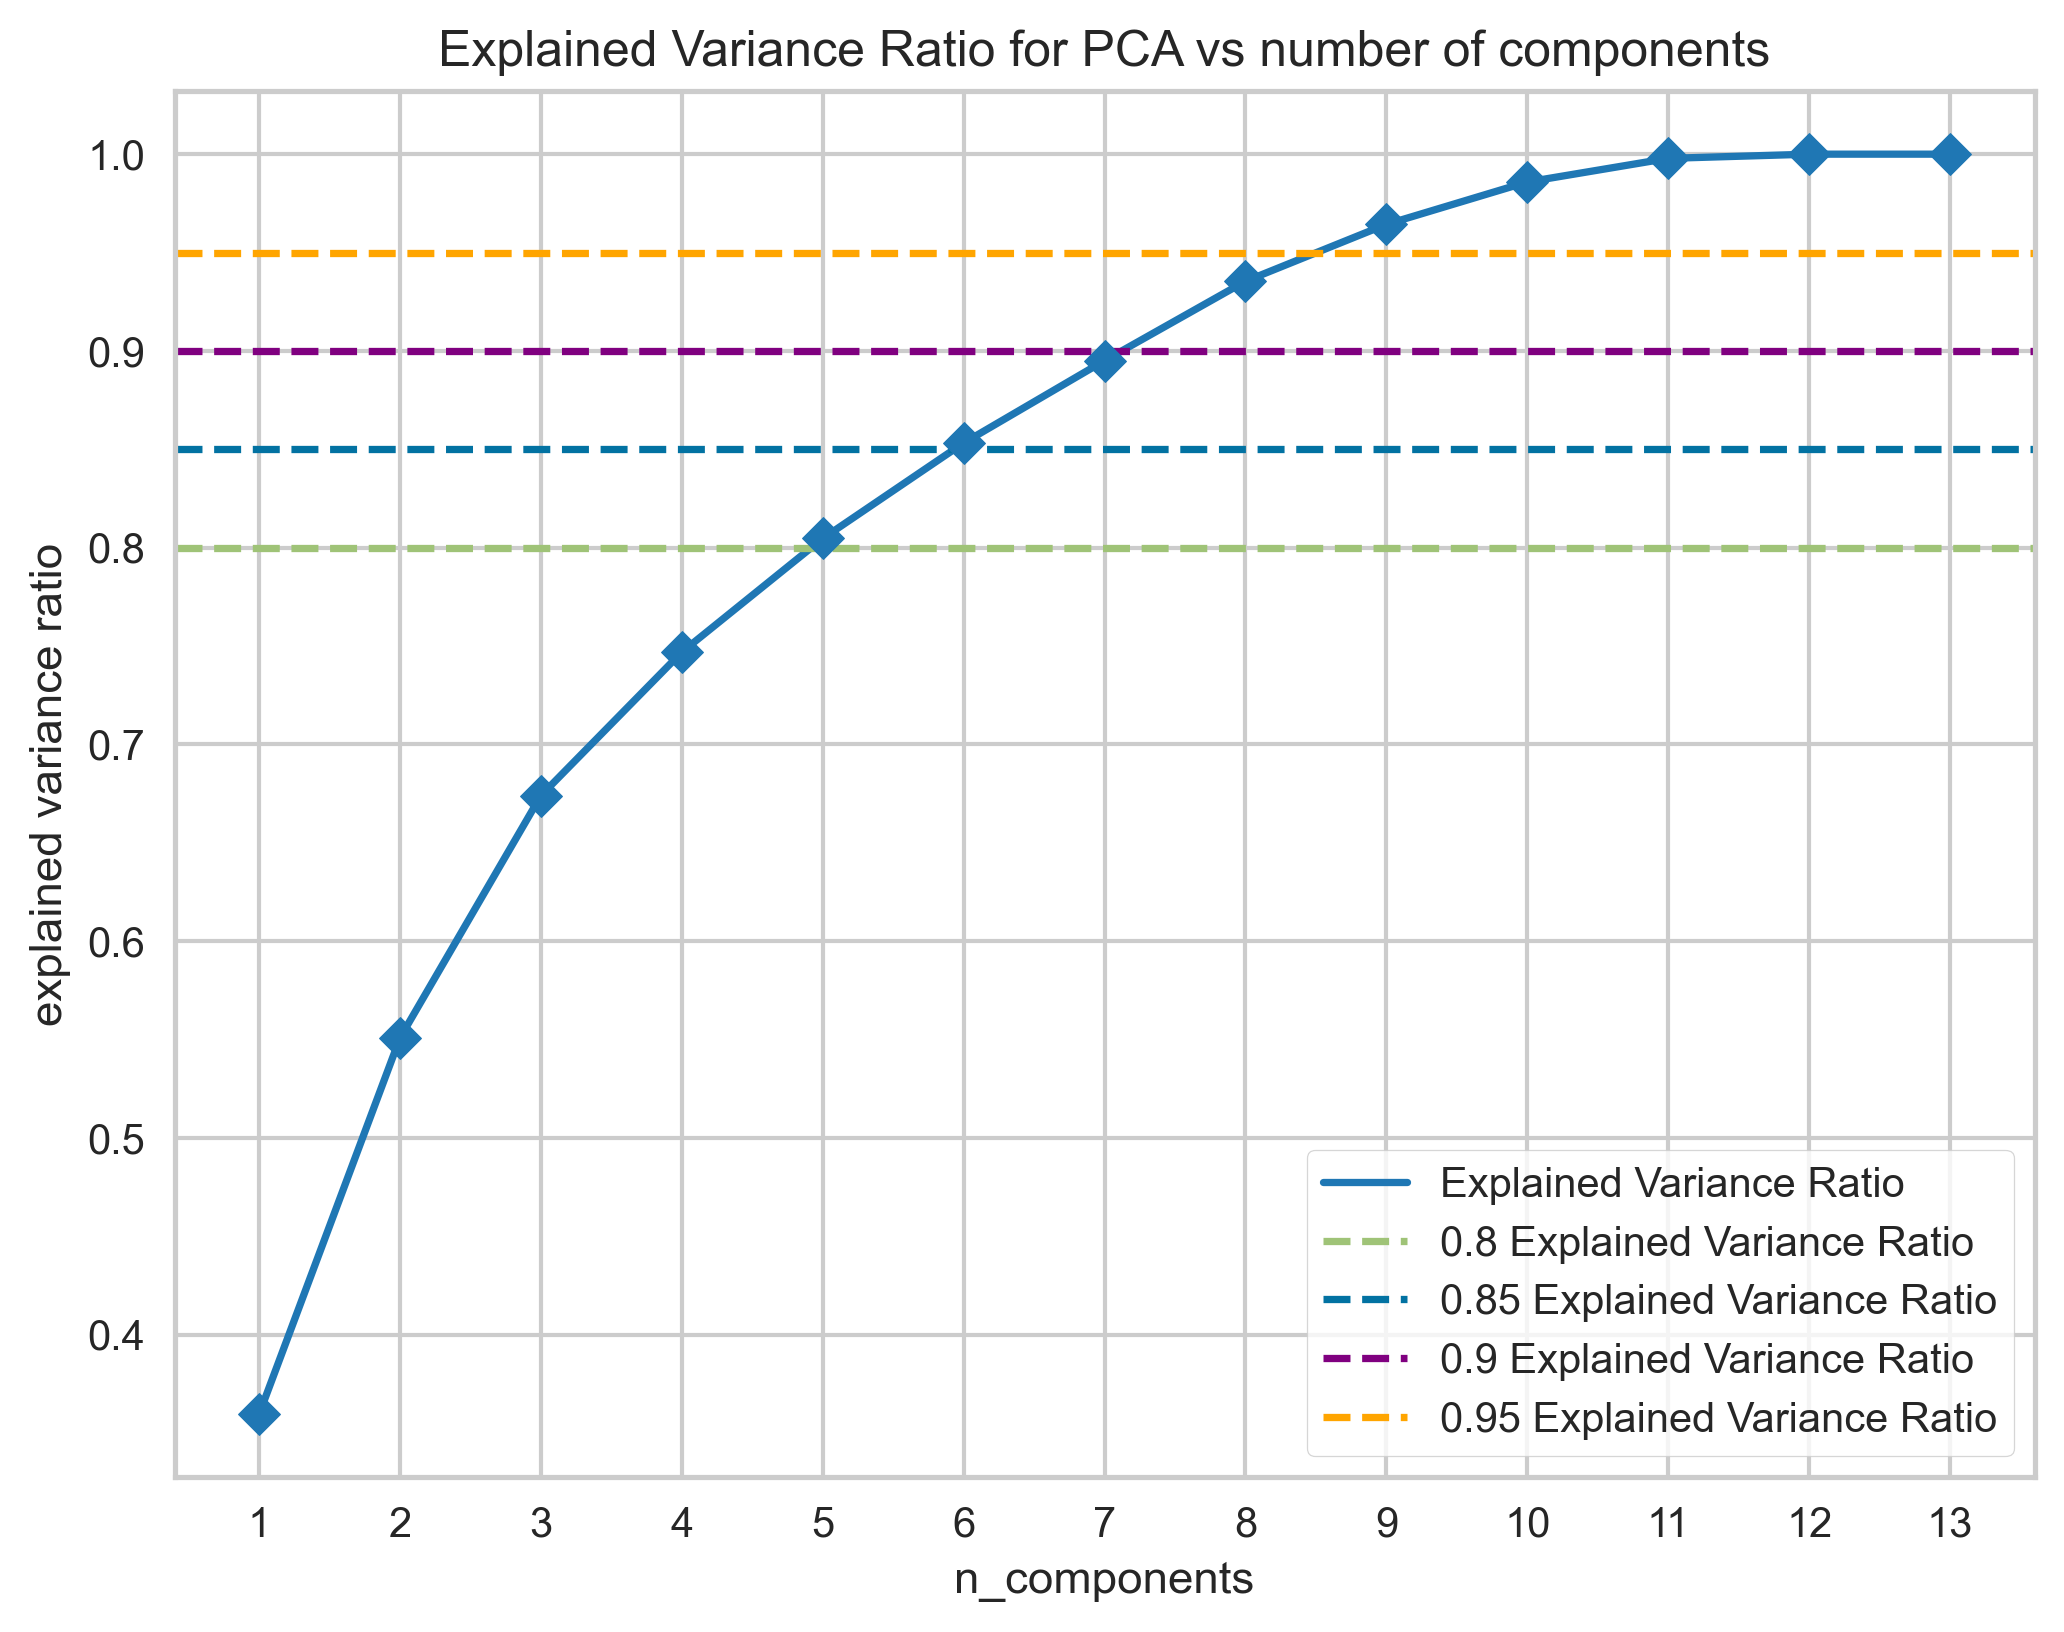

In [57]:
importlib.reload(charts)
charts.pca_visualize_explained_variance_ratio(X_train, f"{STEP_2_PATH}/pca_explained_variance_ratio.png")

Eigen values: [4.67521009e+00 2.48738217e+00 1.60133020e+00 9.48270176e-01
 7.51036001e-01 6.31260104e-01 5.44208932e-01 5.24622621e-01
 3.75842006e-01 2.80089850e-01 1.56053078e-01 2.77500003e-02
 2.75424632e-33]


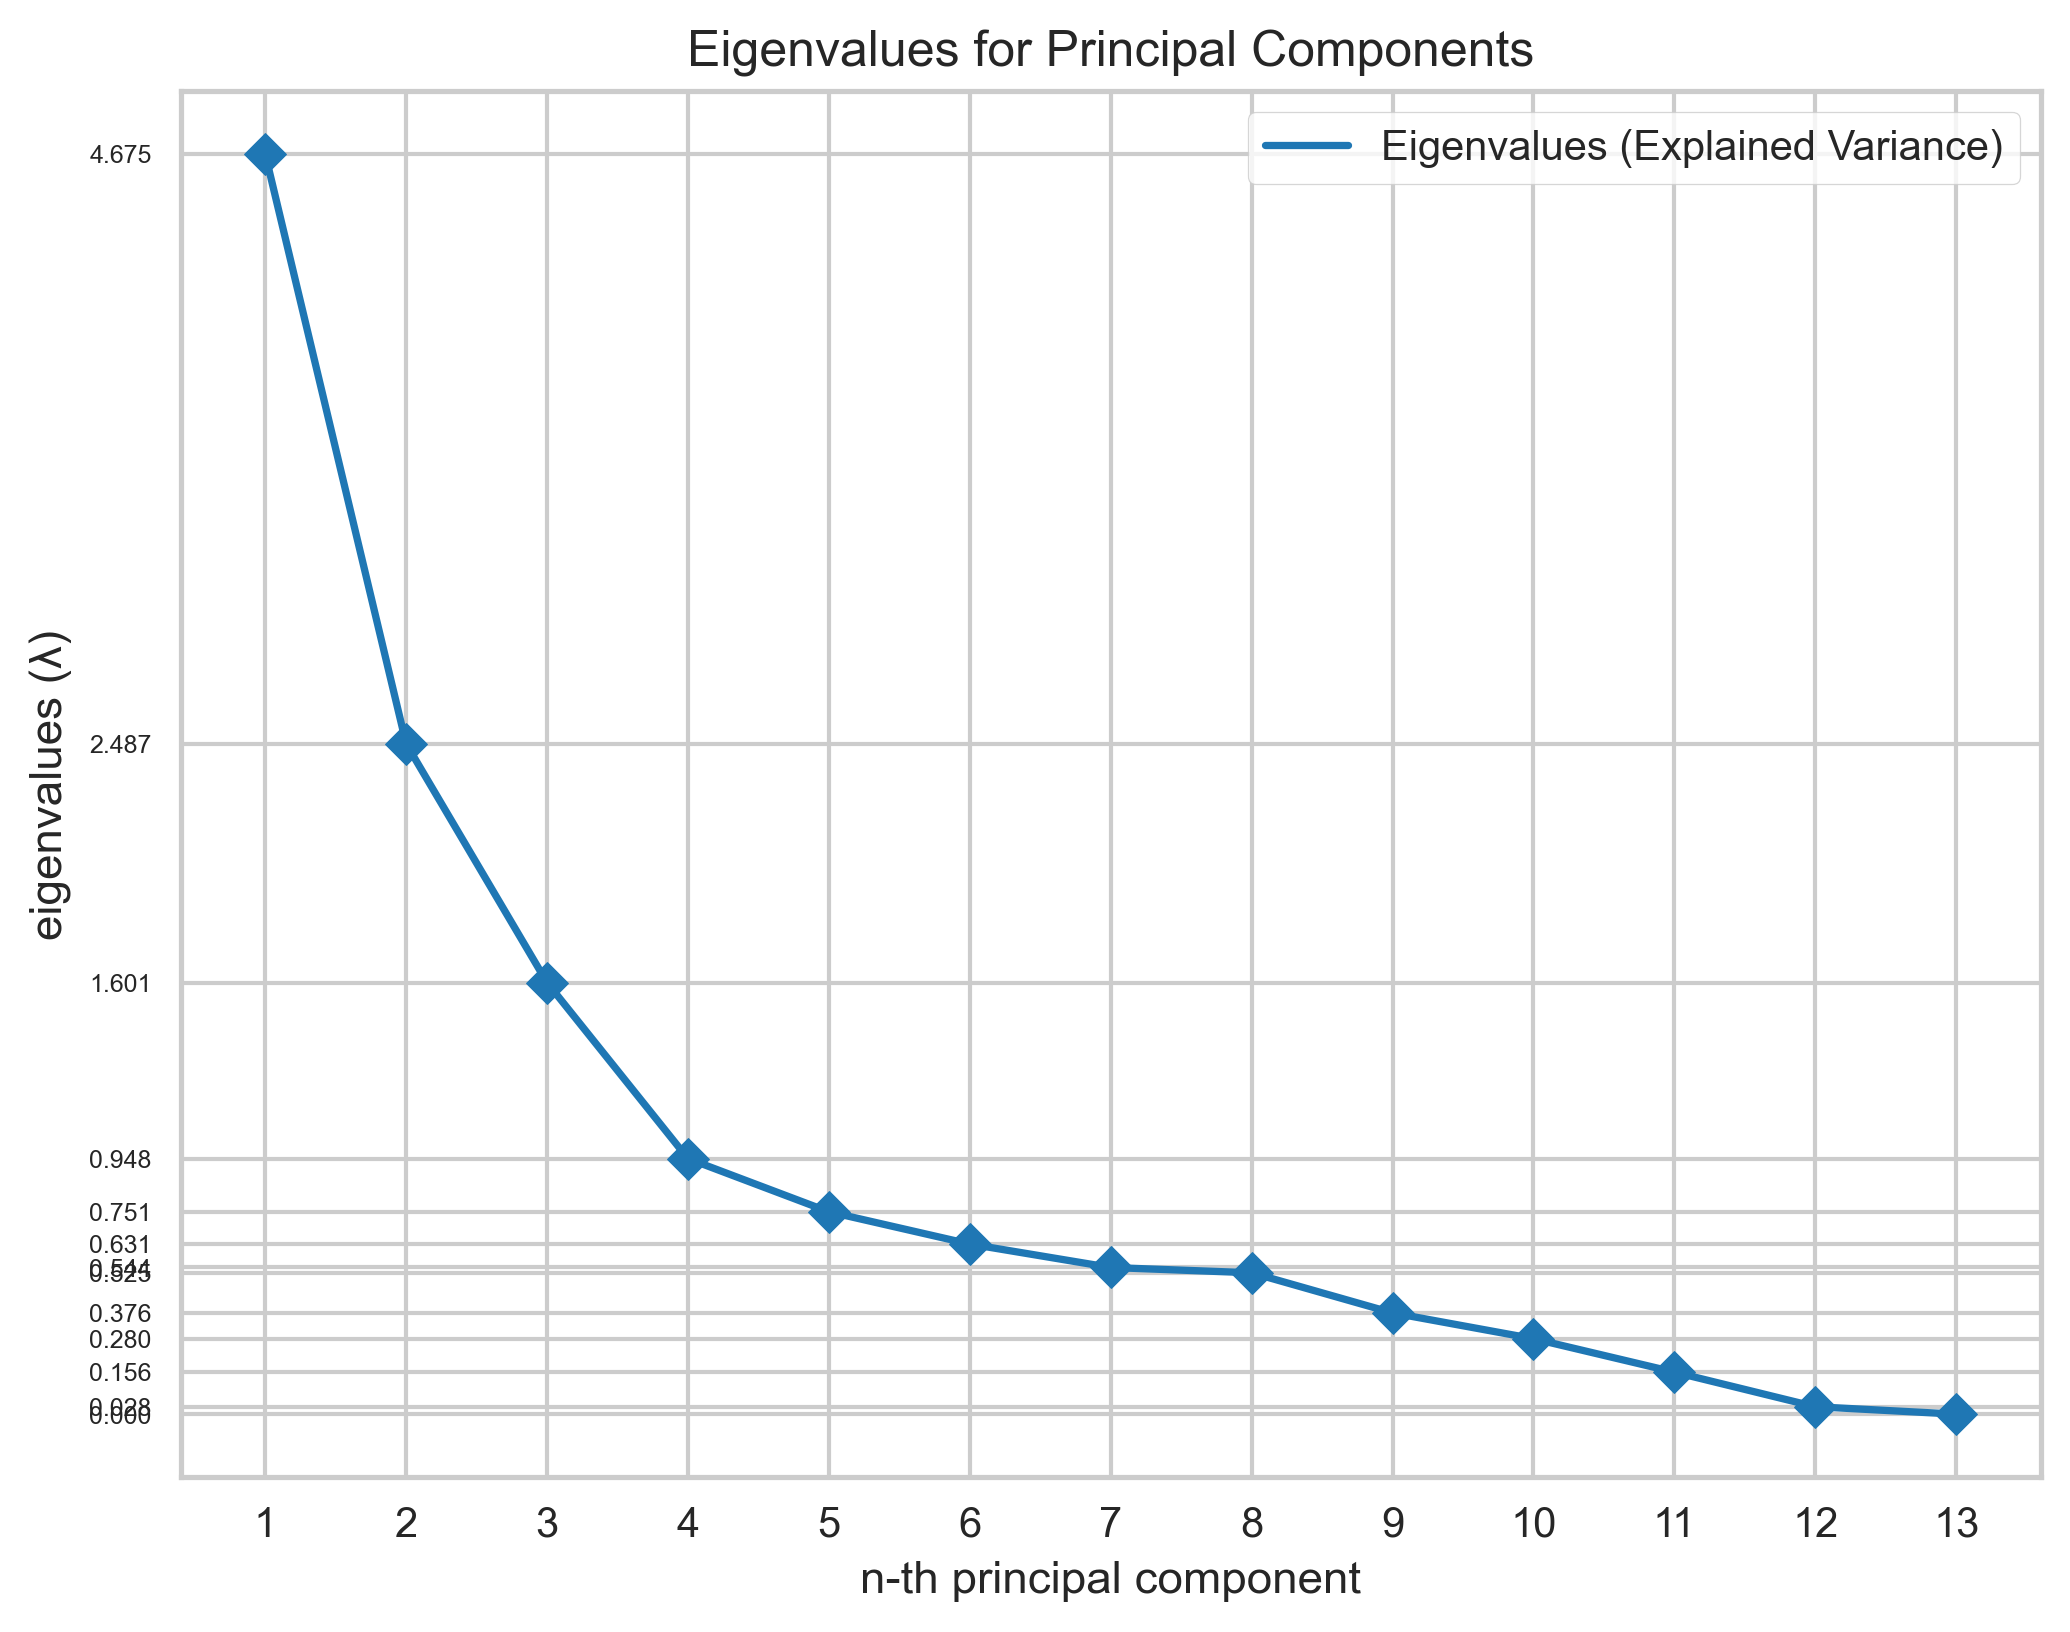

In [62]:
importlib.reload(charts)
charts.pca_visualize_eigenvalues(X_train, f"{STEP_2_PATH}/pca_eigenvalues.png")

## ICA

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


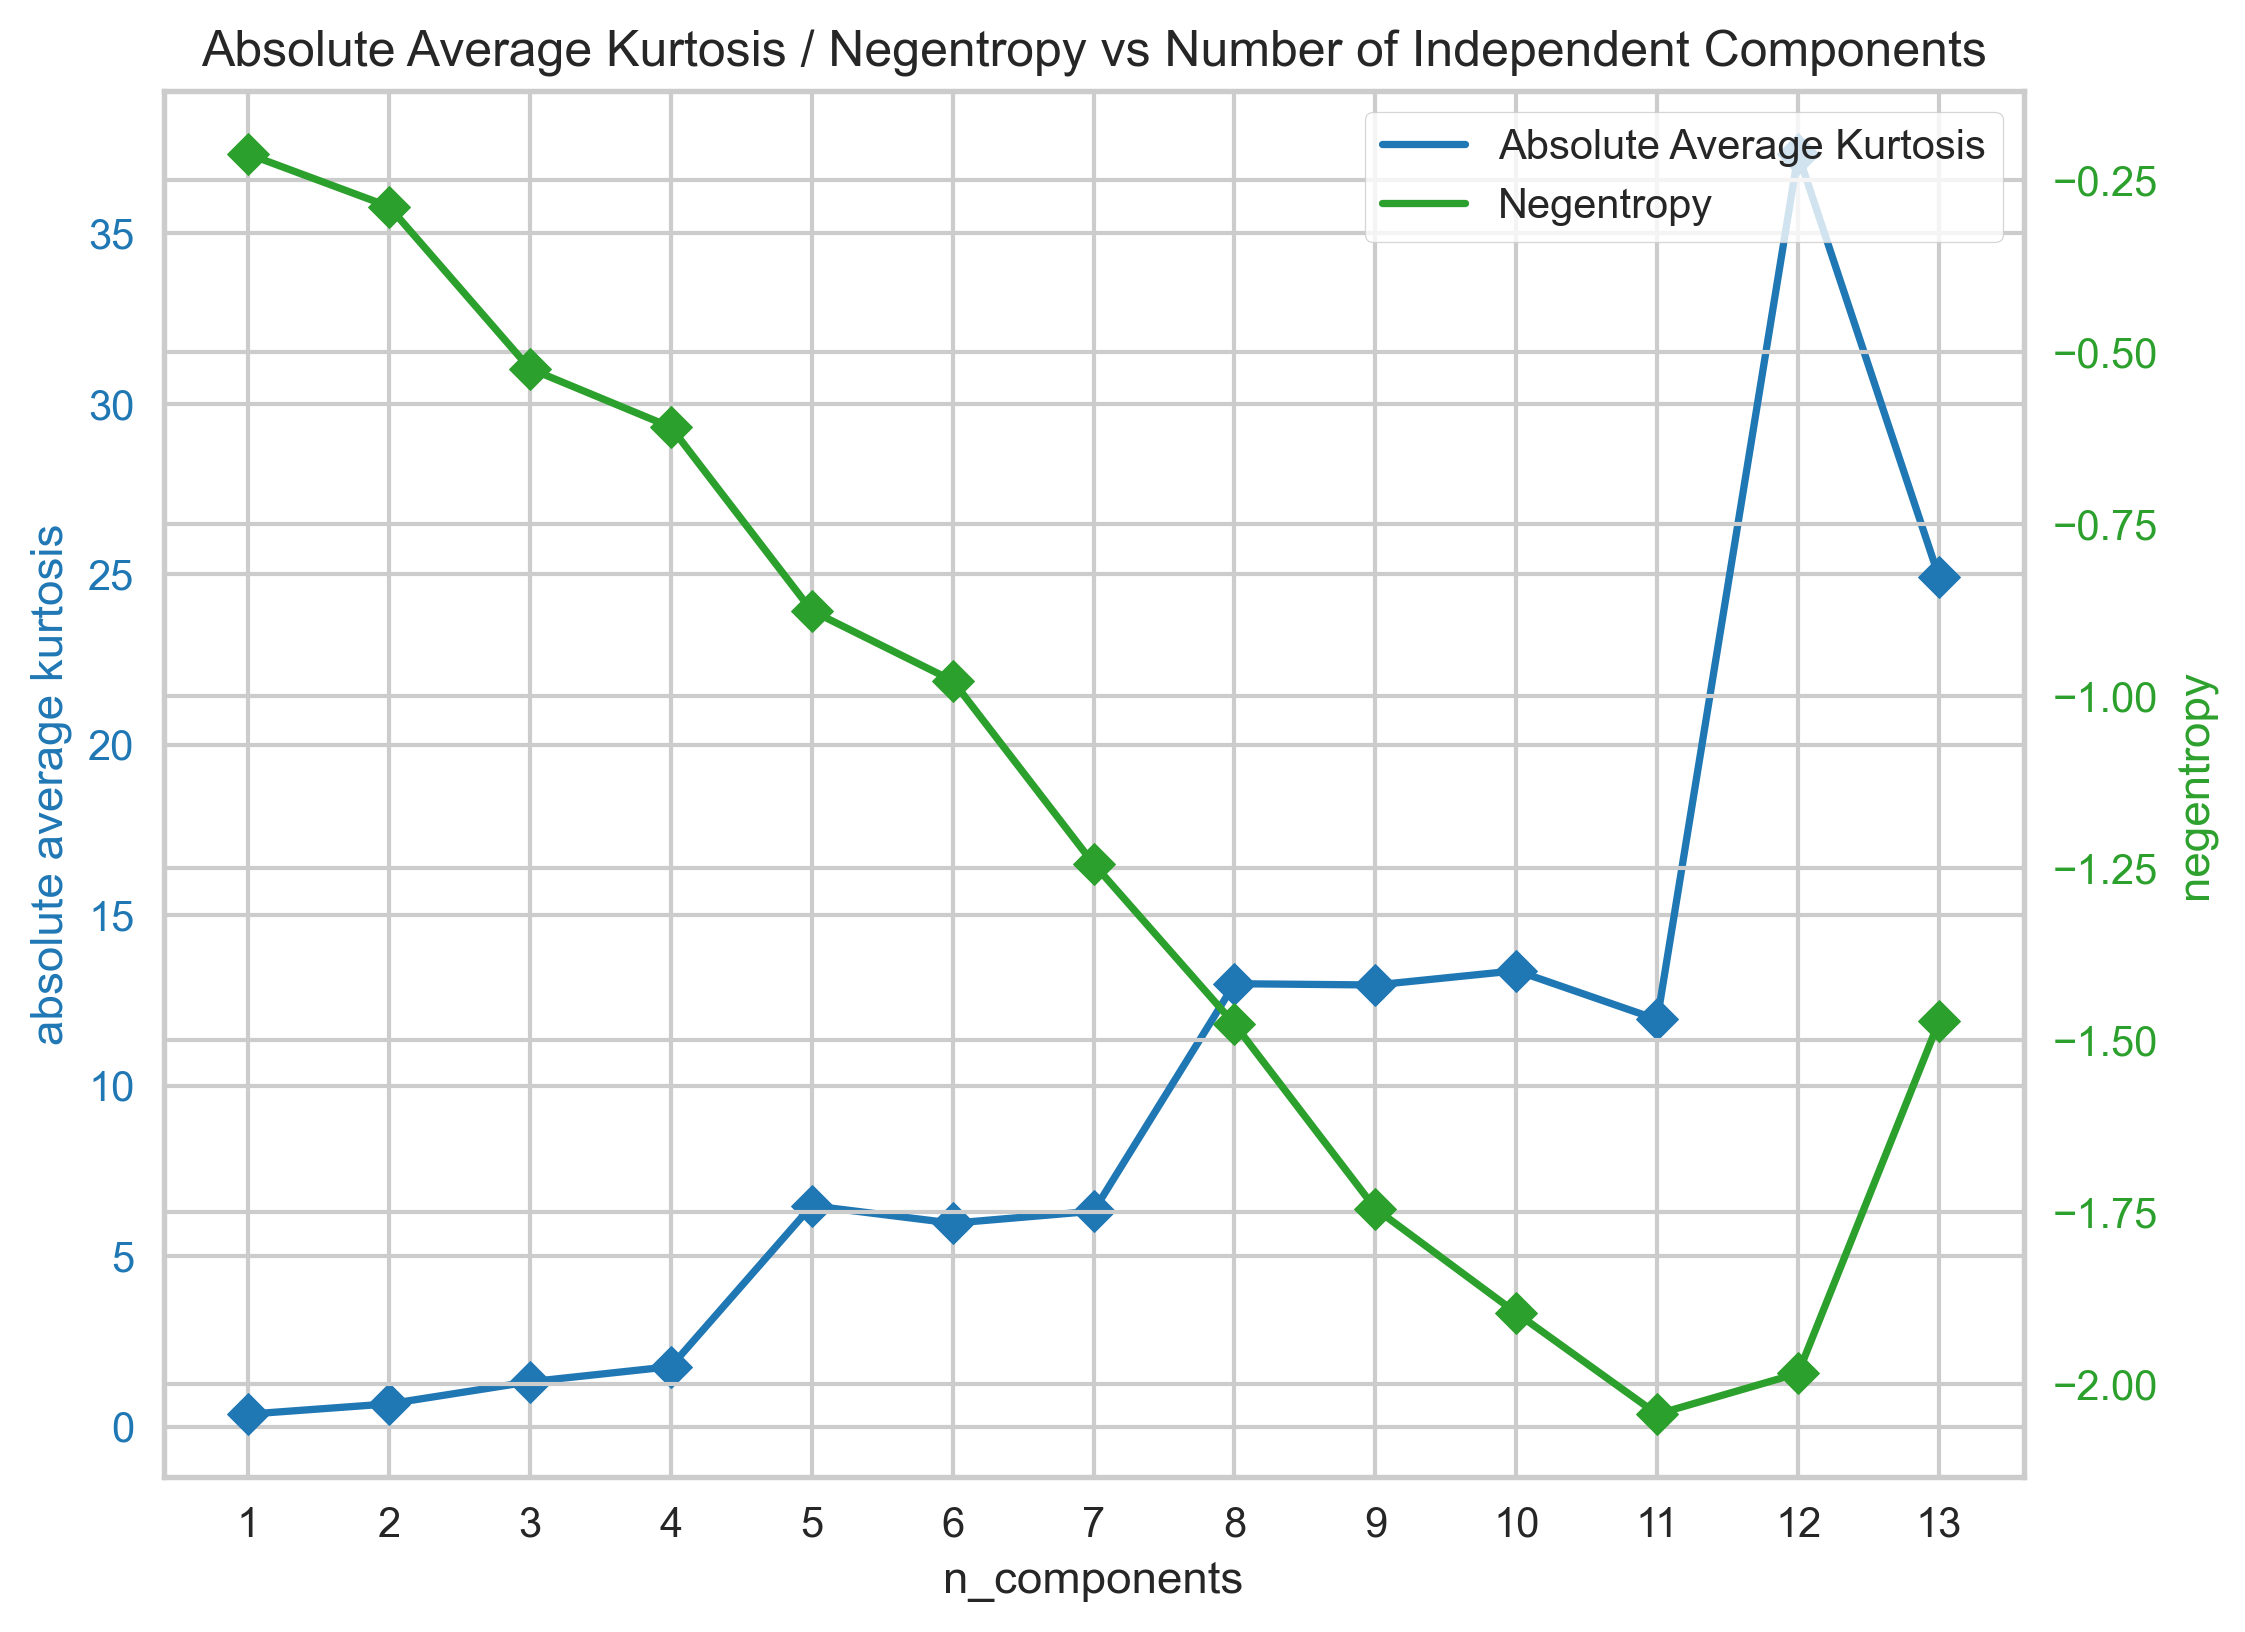

In [94]:
importlib.reload(charts)
charts.ica_visualize_absolute_mean_kurtosis(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/ica_absolute_mean_kurtosis_negentropy.png",
    seed=SEED,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


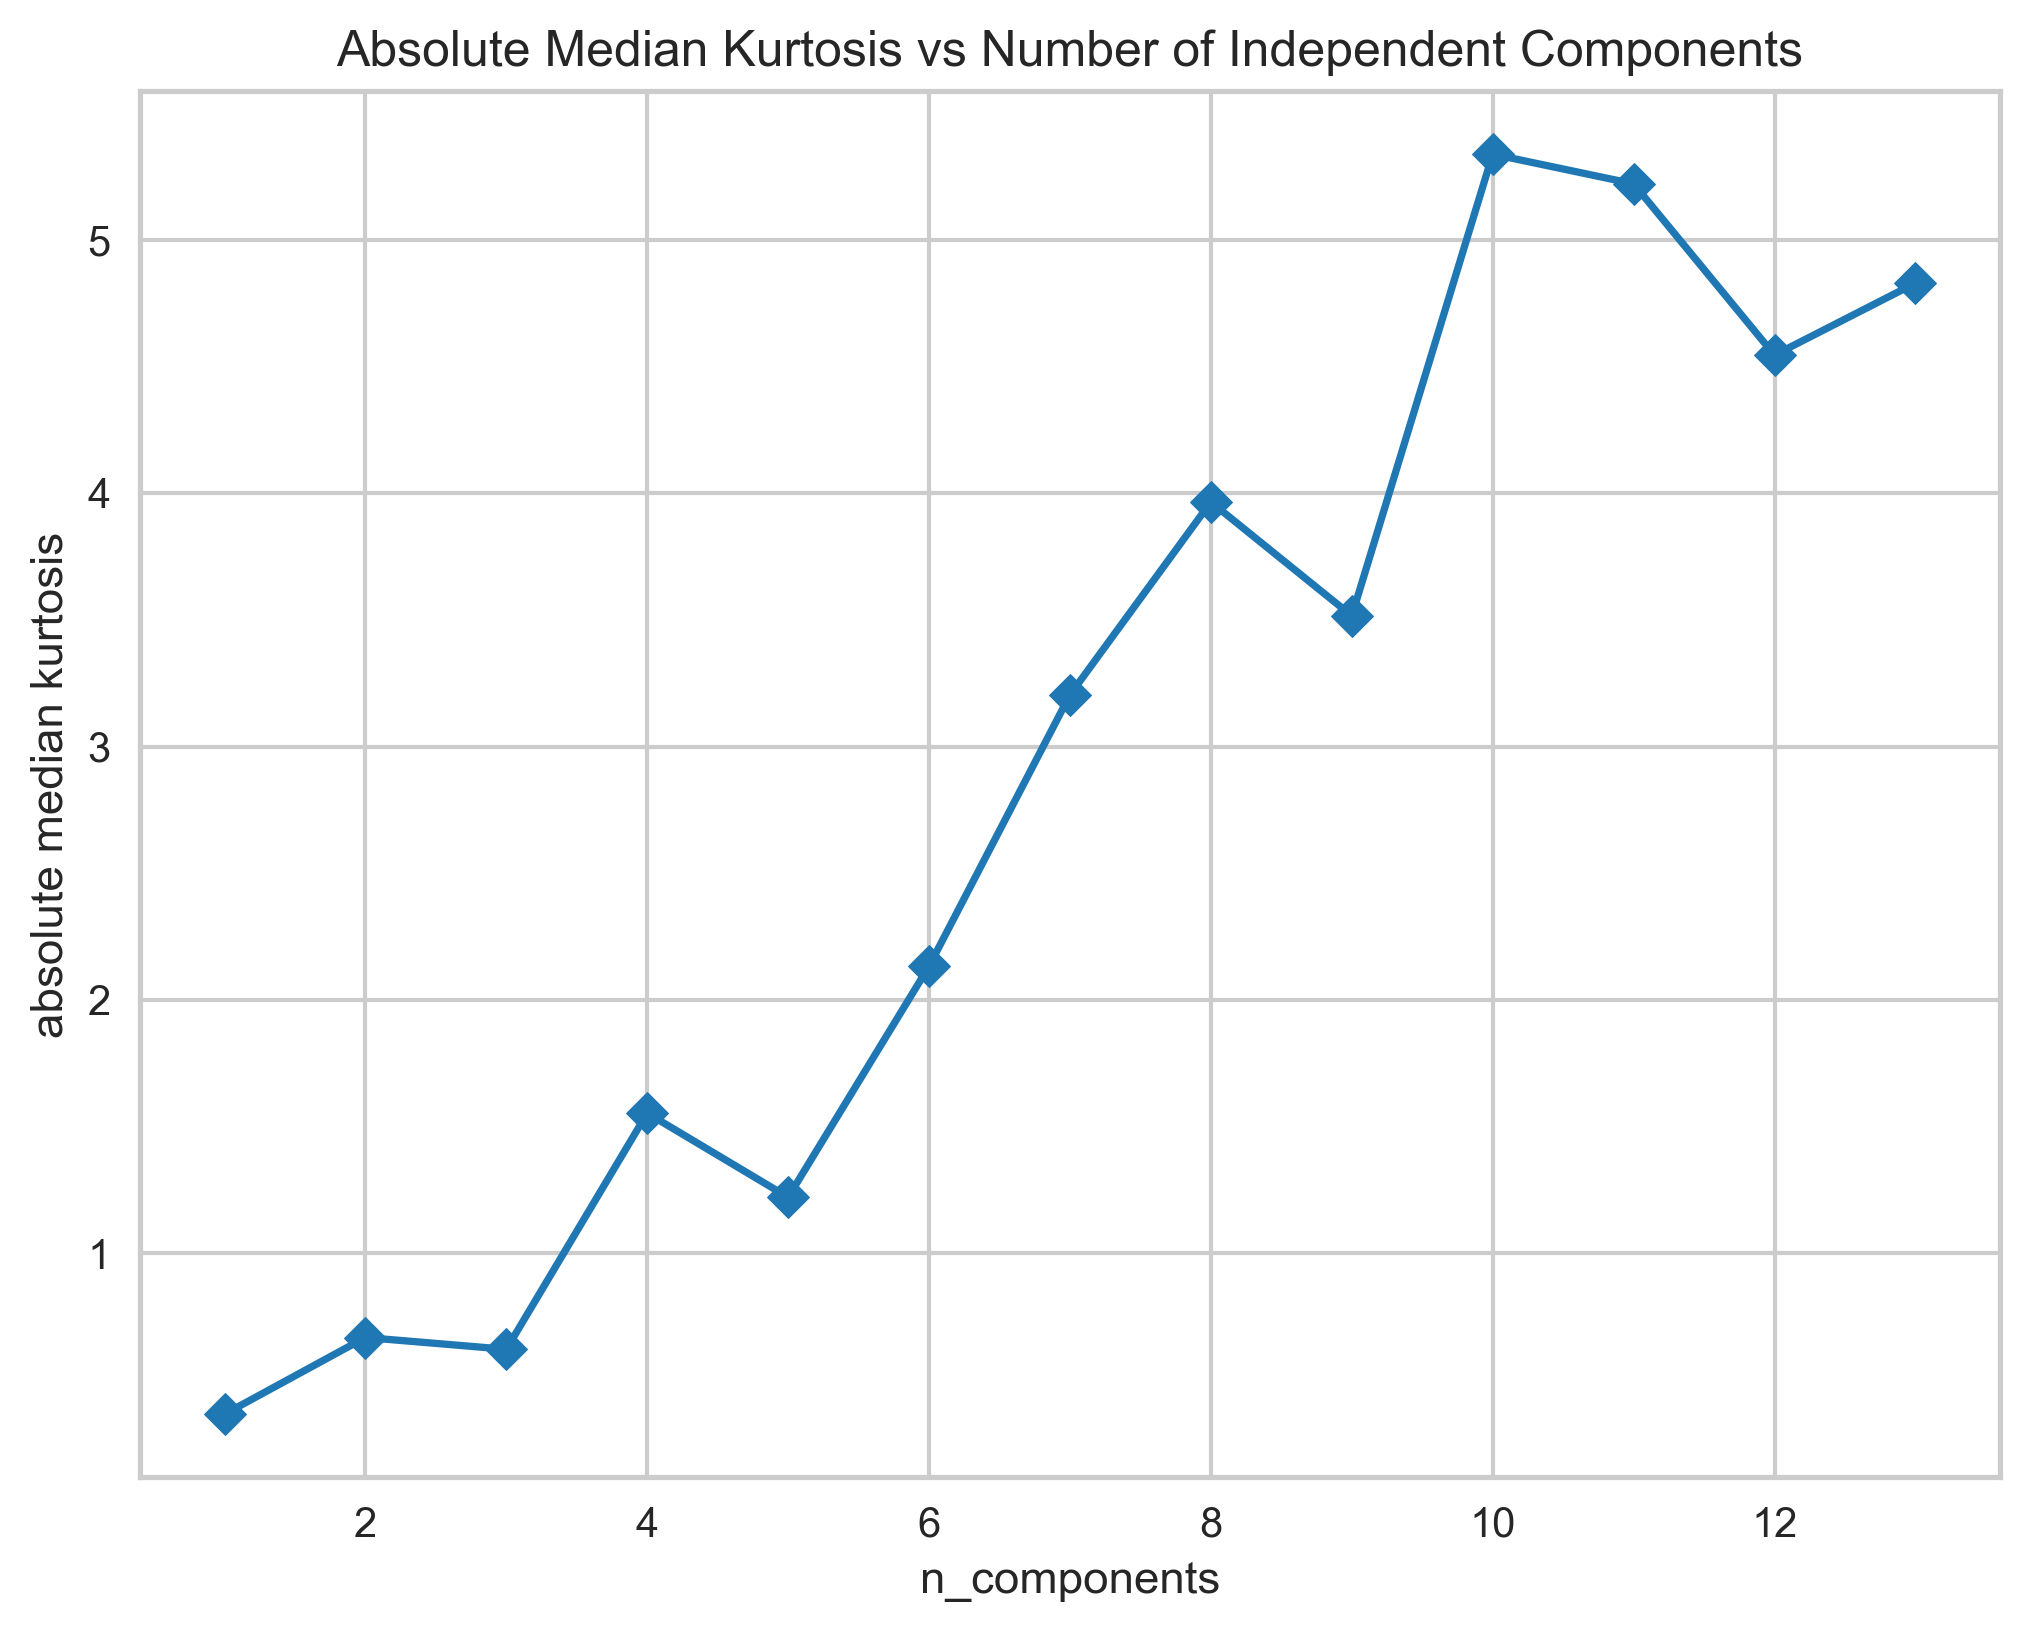

In [118]:
importlib.reload(charts)
charts.ica_visualize_absolute_median_kurtosis(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/ica_absolute_median_kurtosis.png",
    seed=SEED,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


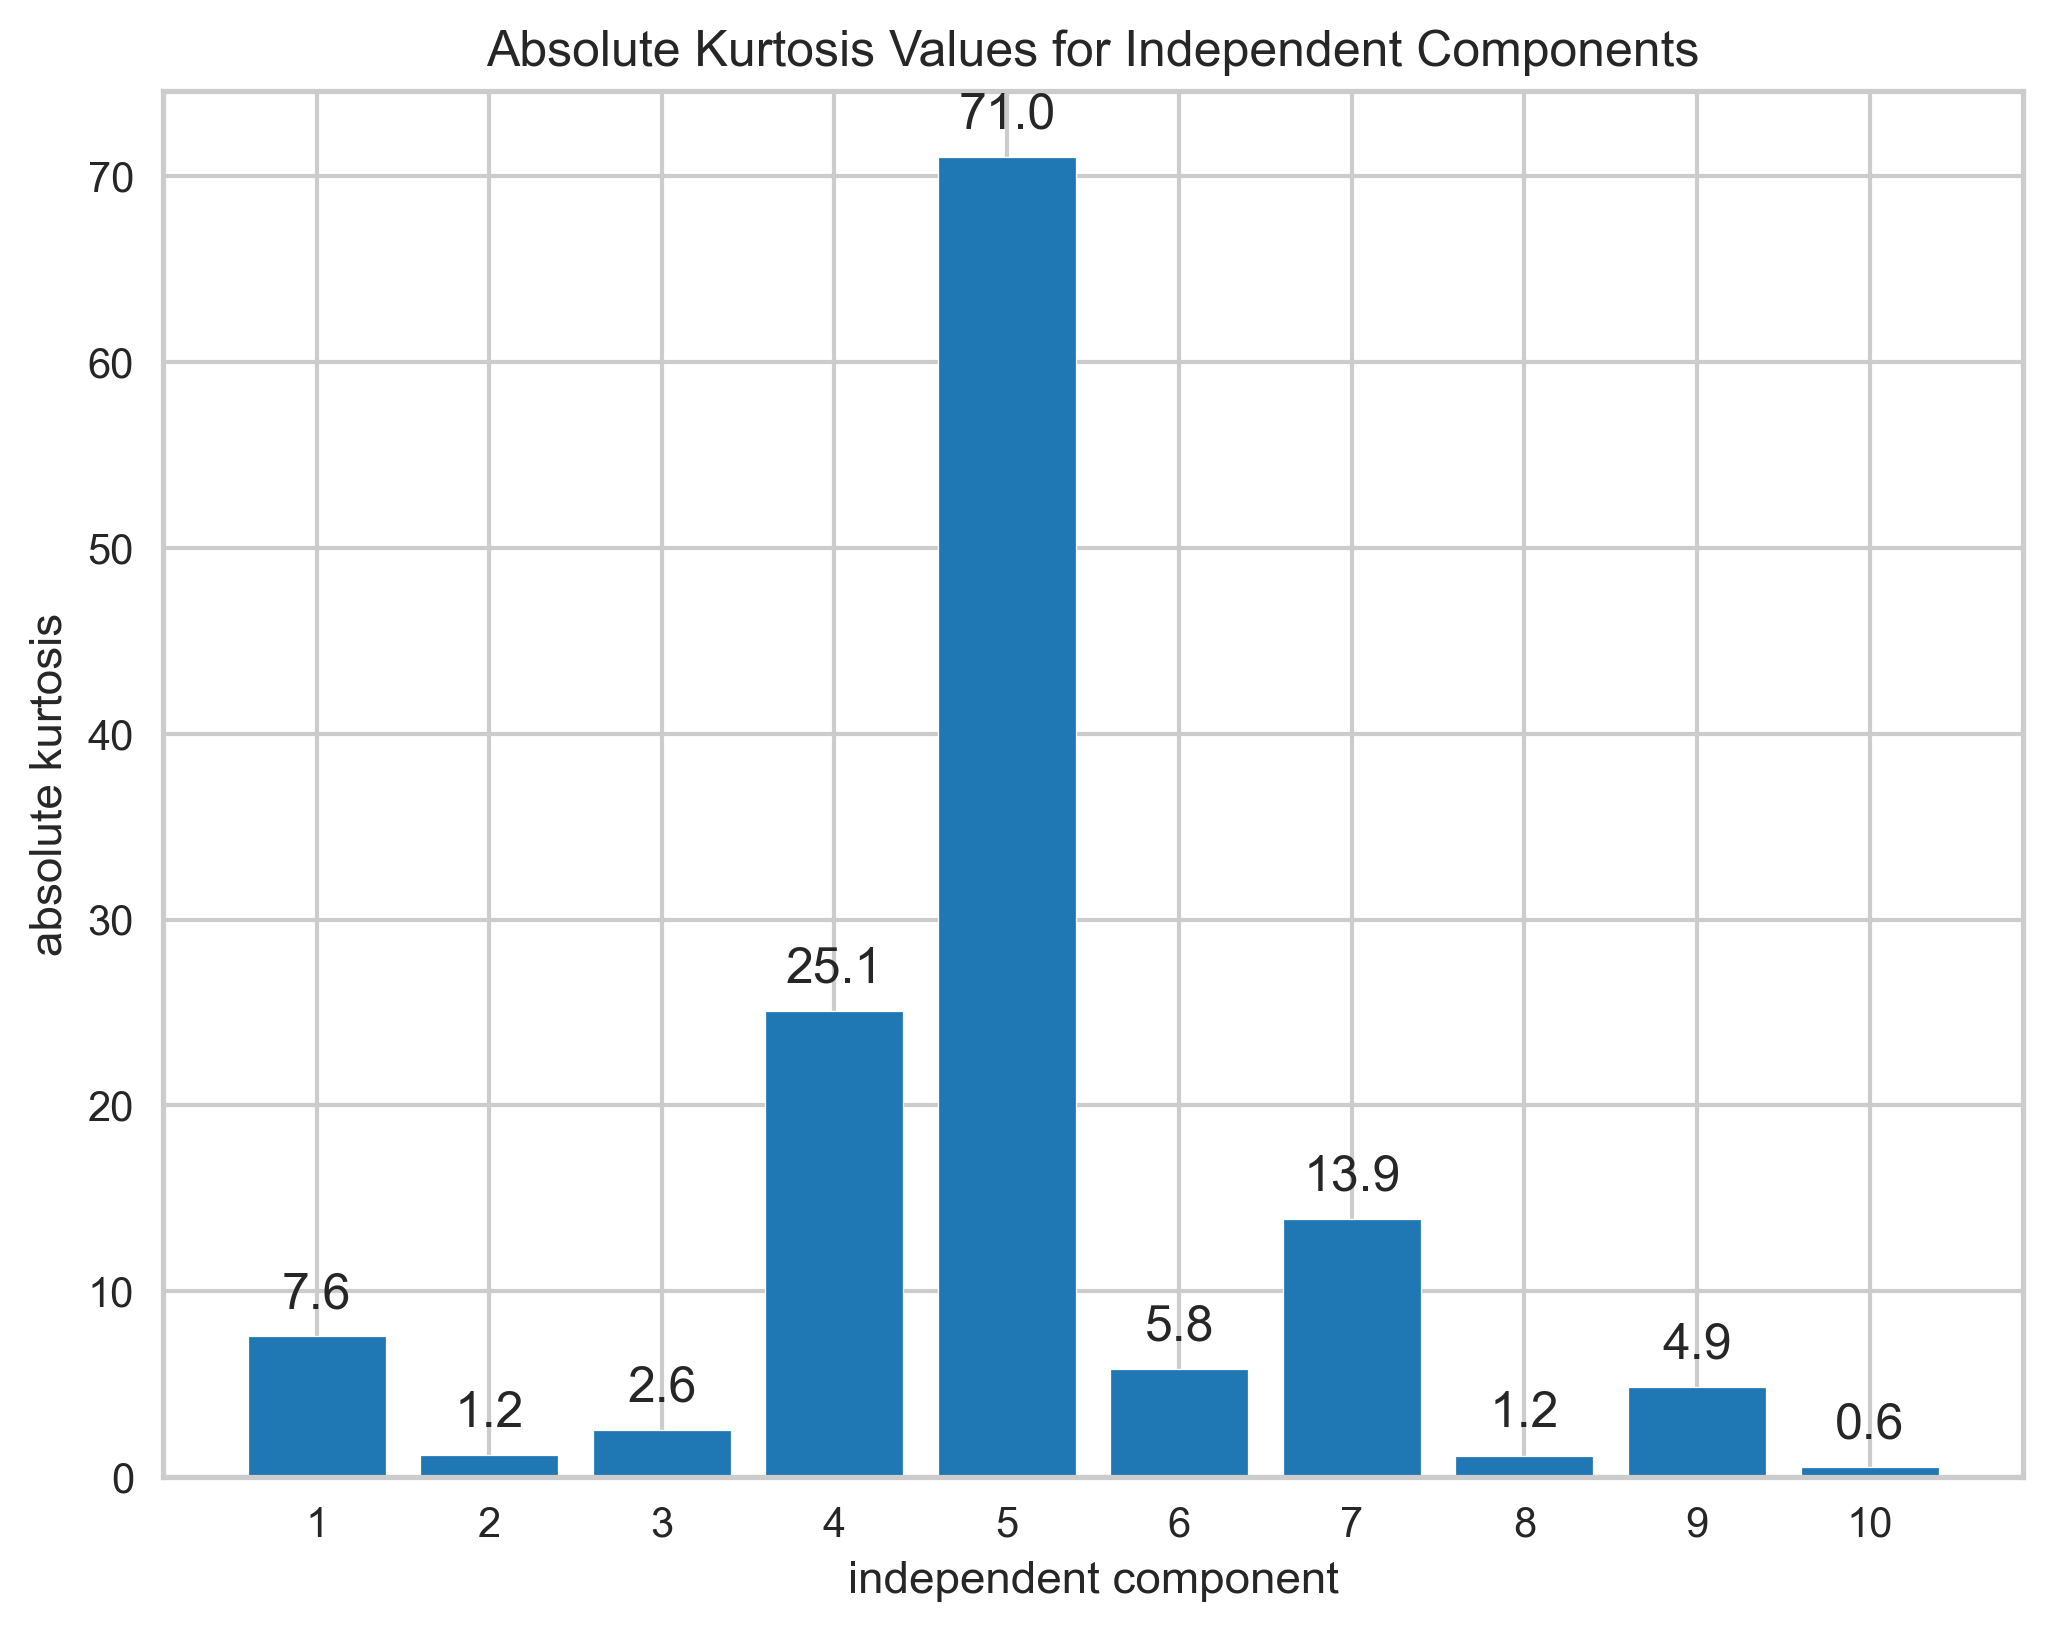

In [96]:
importlib.reload(charts)
charts.ica_visualize_absolute_kurtosis_distribution(
    X_data=X_train,
    k=10,
    output_path=f"{STEP_2_PATH}/ica_kurtosis_values_components.png",
    seed=SEED,

)

## RP

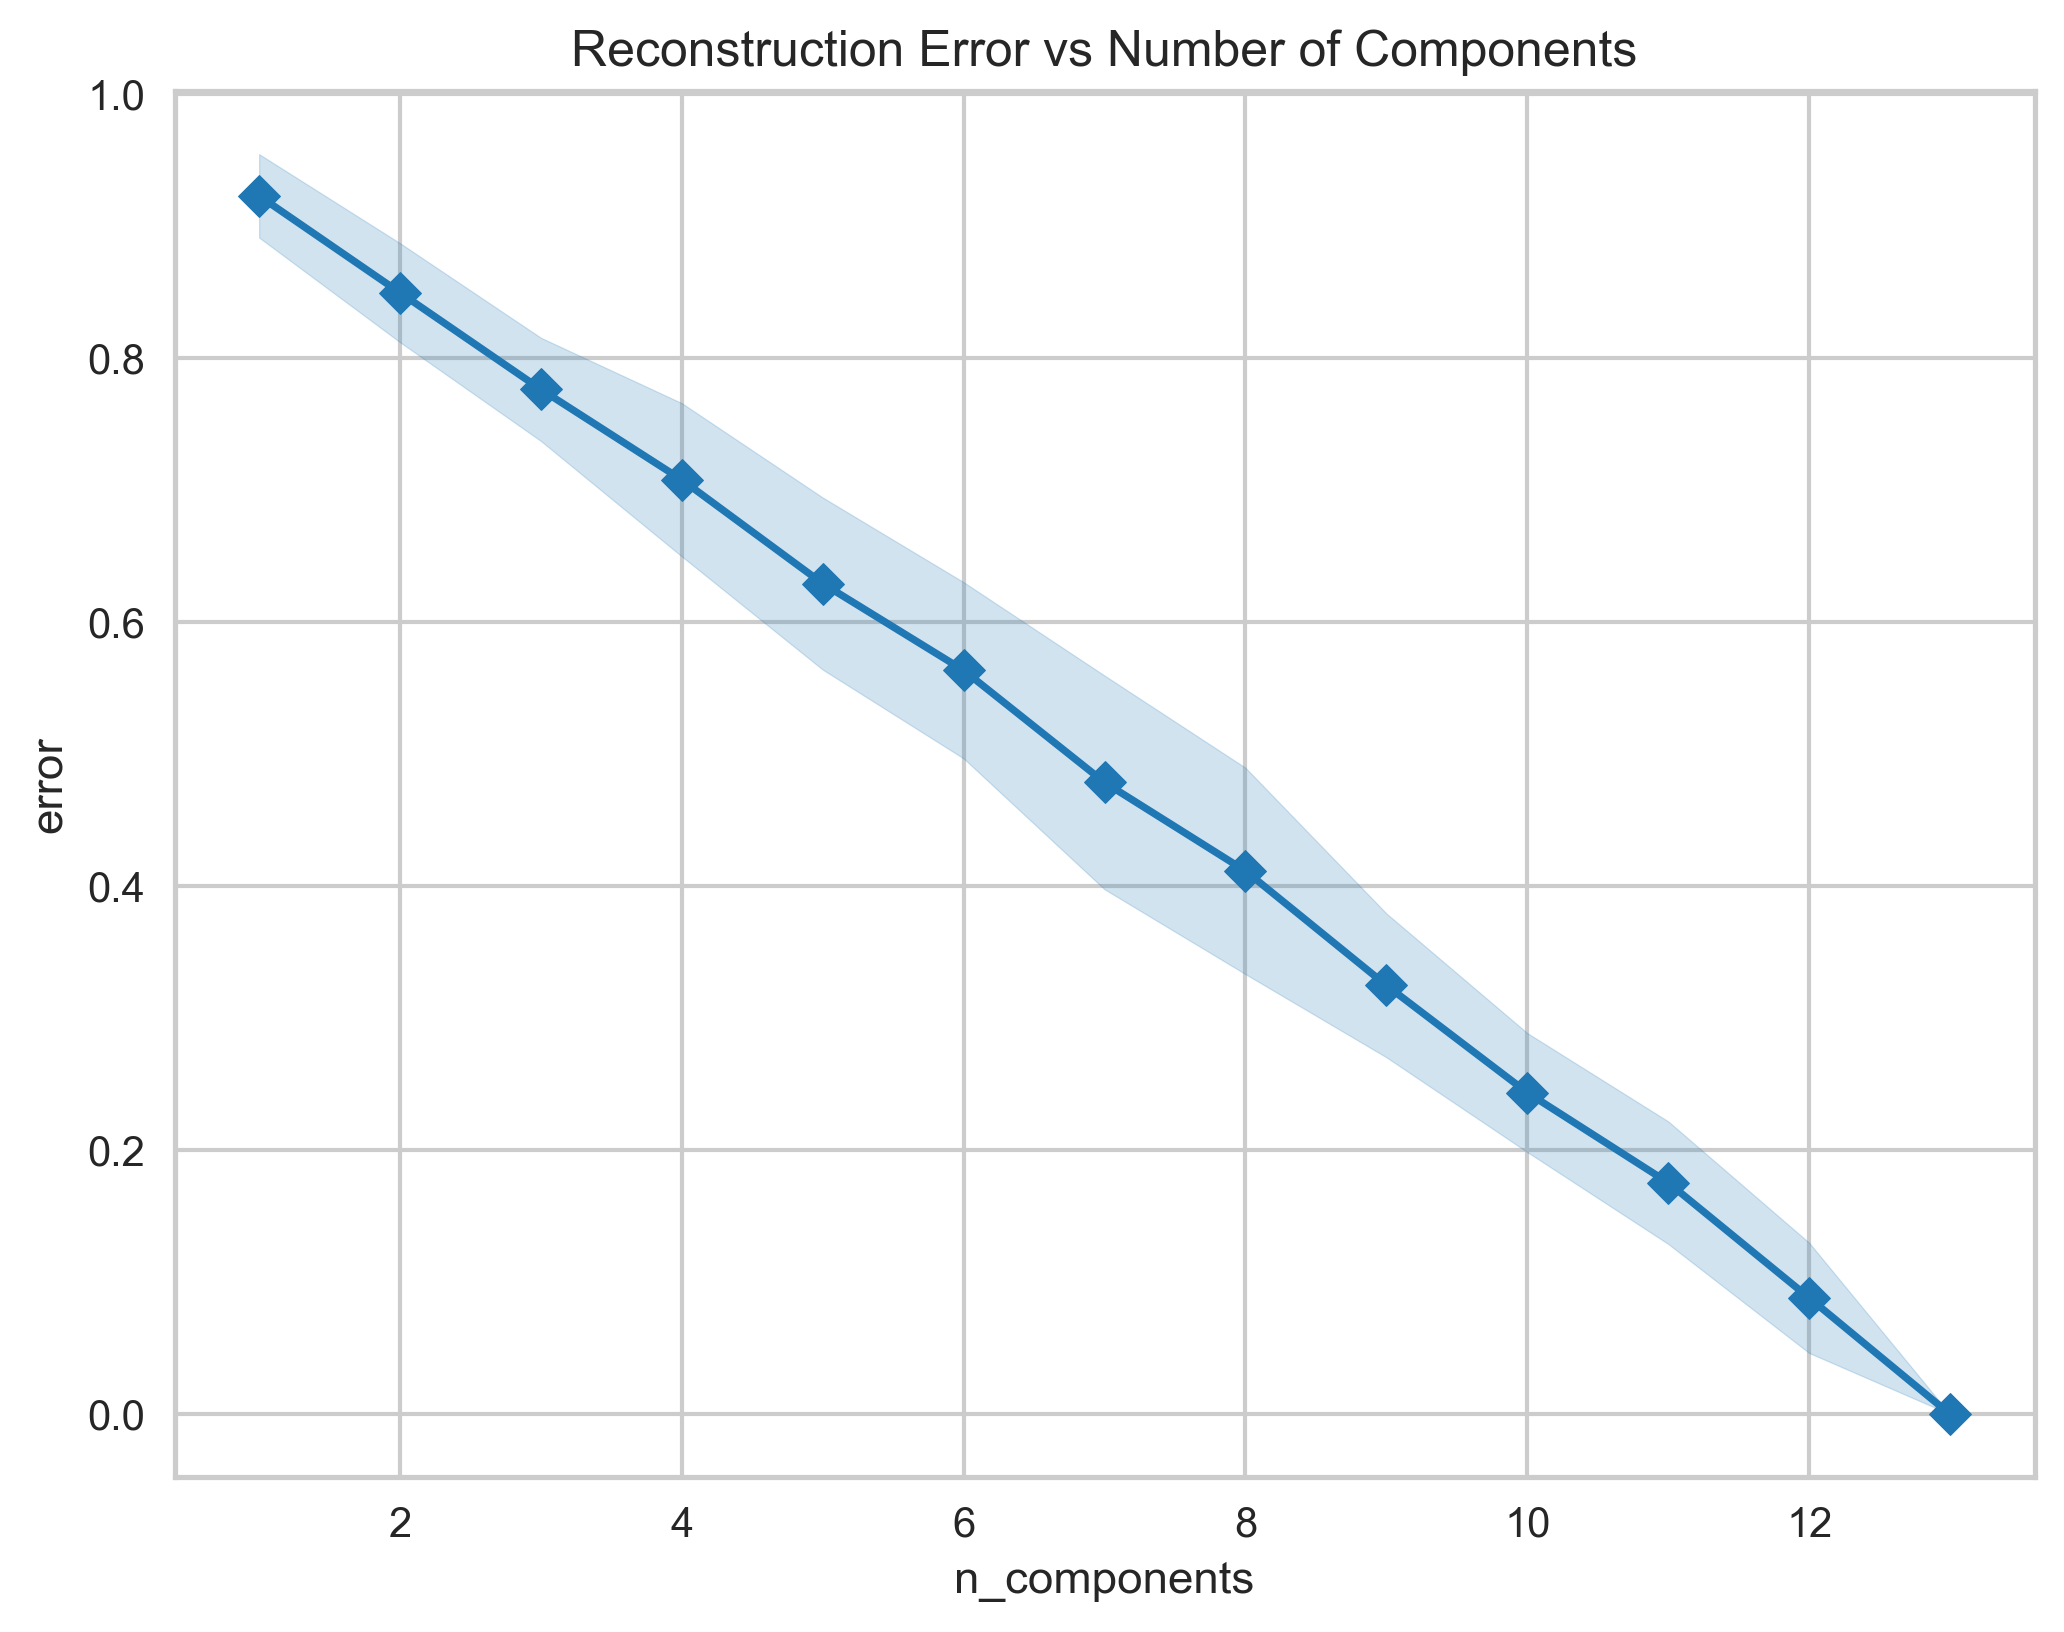

In [98]:
importlib.reload(charts)
charts.rp_reconstruction_error(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/rp_reconstruction_error.png",
)

## Isomap

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


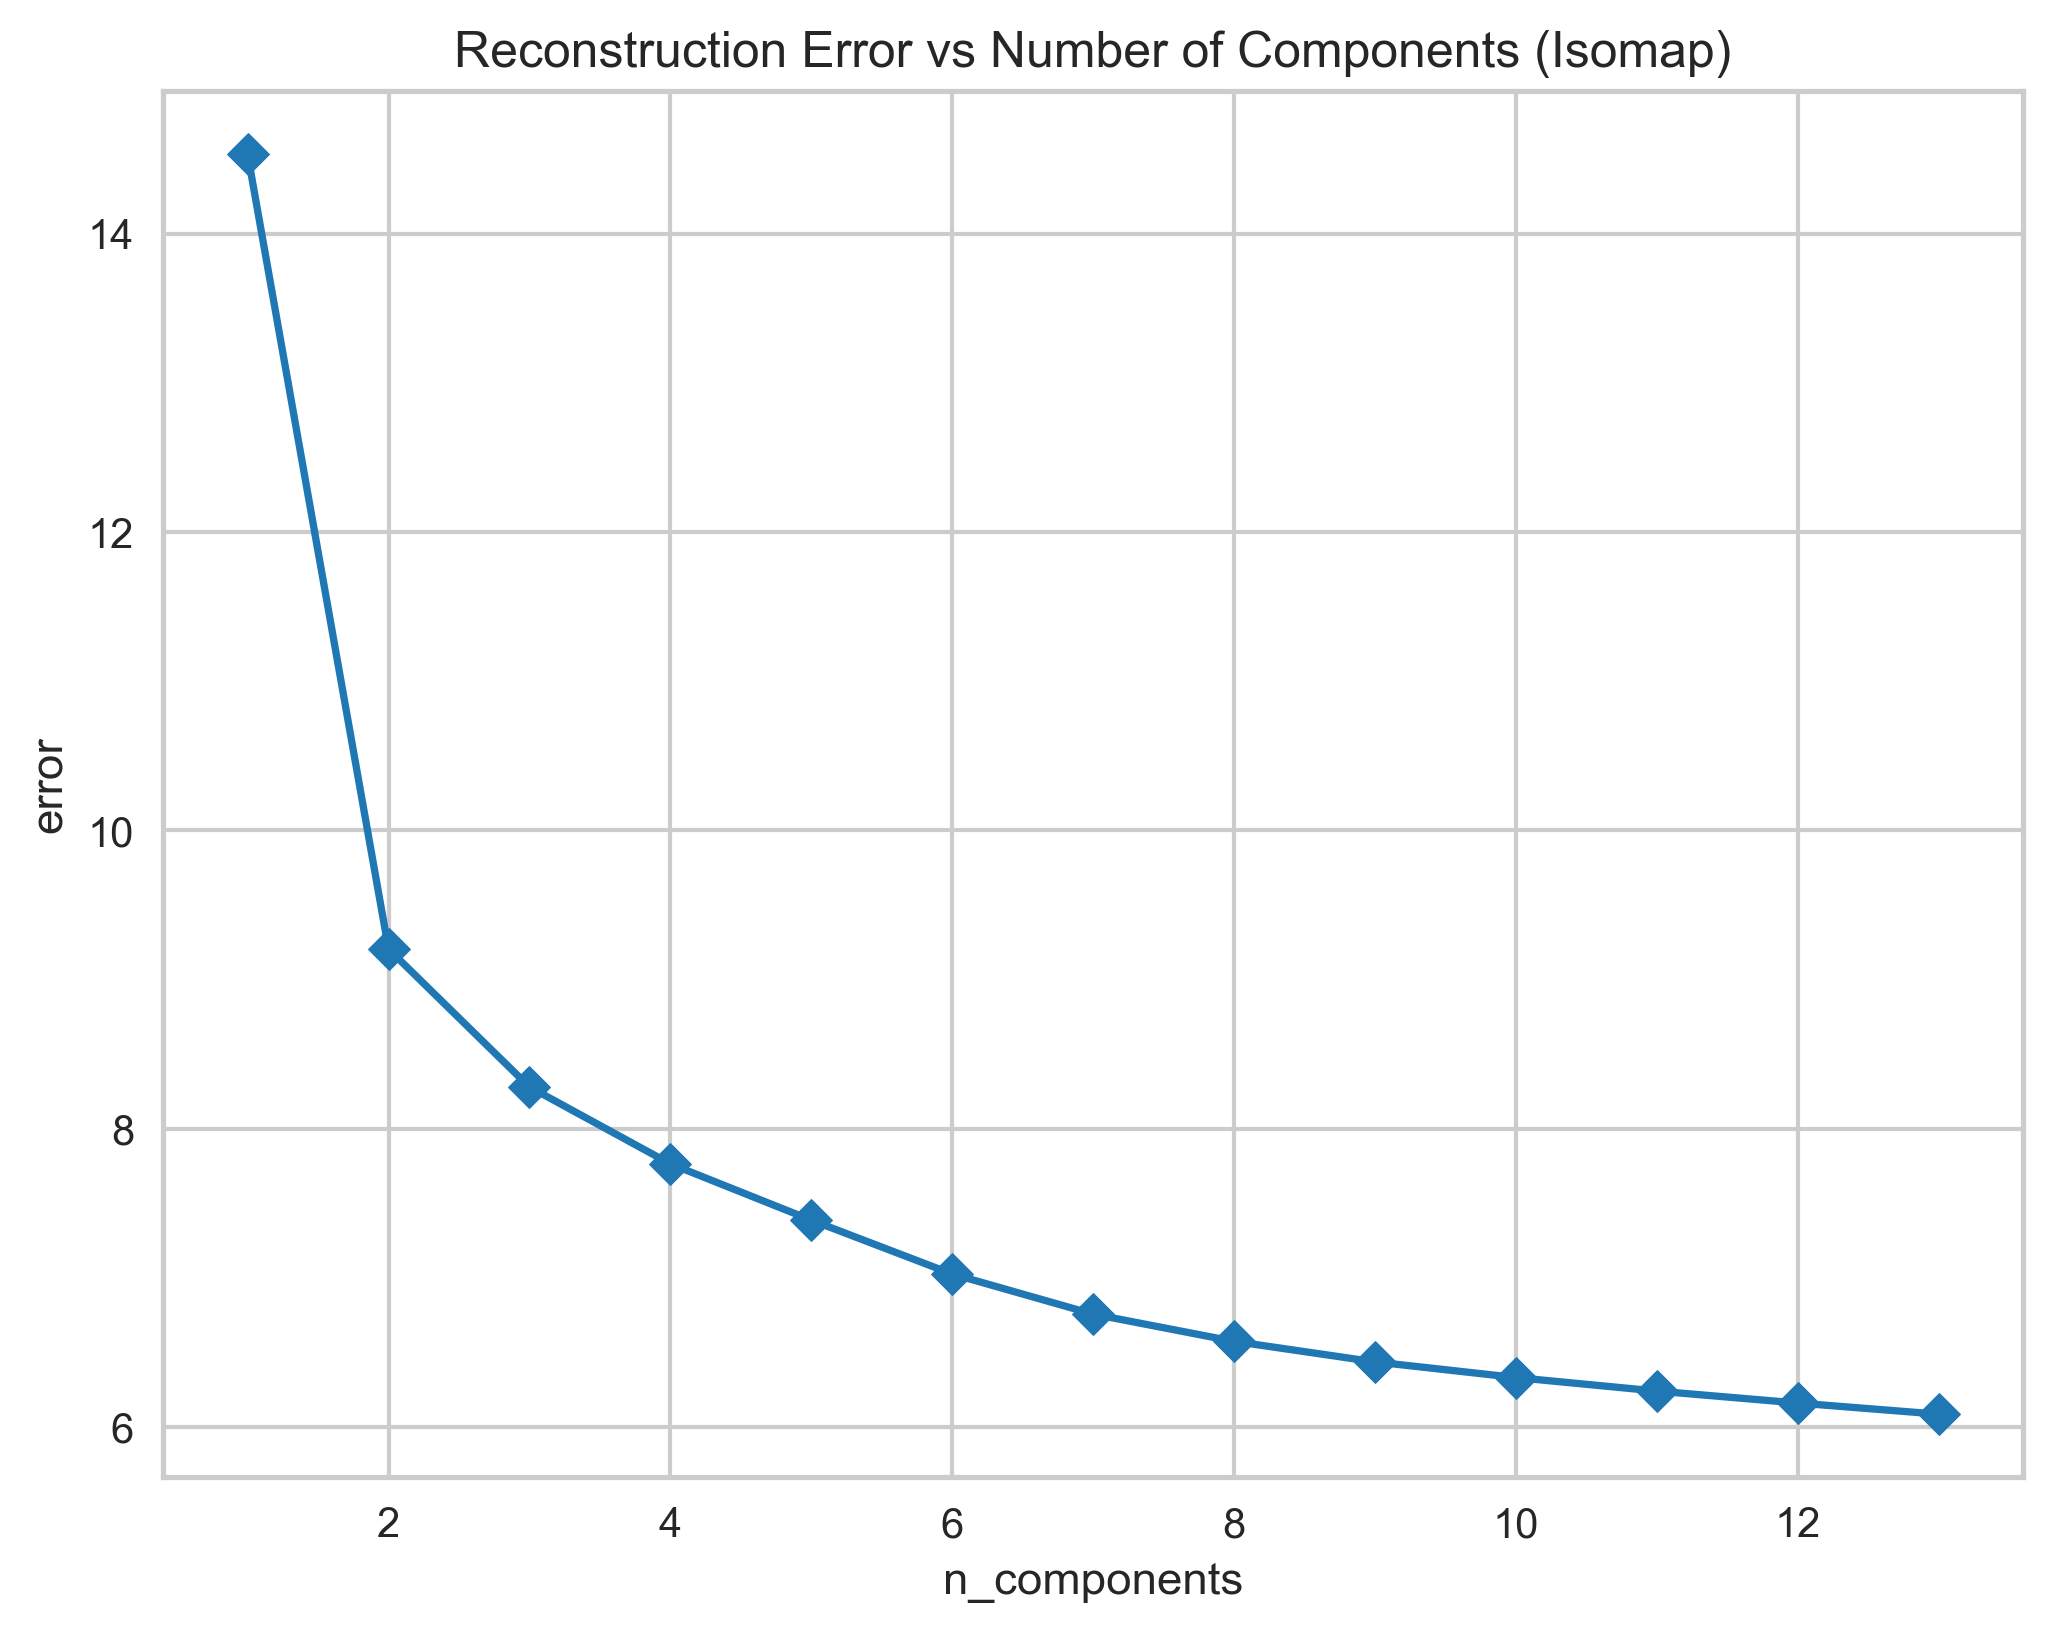

In [110]:
importlib.reload(charts)
charts.isomap_reconstruction_error(
    X_data=X_train,
    output_path=f"{STEP_2_PATH}/isomap_reconstruction_error.png",
)

## Evaluation

In [116]:
from sklearn.manifold import Isomap
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA, FastICA
from DummyTransformer import DummyTransformer

importlib.reload(evals)
evals.evaluate_dim_reduction(
    [
        ("Baseline", DummyTransformer()),
        ("PCA (n_components=8)", PCA(n_components=8)),
        ("ICA (n_components=10)", FastICA(n_components=10, random_state=SEED)),
        ("RP (n_components=10)", GaussianRandomProjection(n_components=10, random_state=SEED)),
        ("Isomap (n_components=8)", Isomap(n_components=8)),
    ],
    X_data=X_train,
    labels=y_train,
    scoring=F1_SCORE,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


DecisionTreeClassifier  RandomForestClassifier  \
Baseline                0                0.506348                0.565087   
PCA (n_components=8)    0                0.488722                0.552162   
ICA (n_components=10)   0                0.506577                0.559916   
RP (n_components=10)    0                0.480731                0.552161   
Isomap (n_components=8) 0                0.499299                0.531019   

                           BaggingClassifier  LinearSVC  SGDClassifier  \
Baseline                0           0.516216   0.539476       0.489424   
PCA (n_components=8)    0           0.520448   0.519737       0.473210   
ICA (n_components=10)   0           0.527257   0.530313       0.500701   
RP (n_components=10)    0           0.492719   0.511515       0.458412   
Isomap (n_components=8) 0           0.508701   0.500000       0.390747   

                           LogisticRegression  
Baseline                0            0.551222  
PCA (n_components=8)    0            0.531957  
ICA (n_components=10)   0            0.466870  
RP (n_components=10)    0            0.514802  
Isomap (n_components=8) 0            0.515511

# Step 3

In [126]:
projections = [
    ("pca", "PCA (n_components=8)", PCA(n_components=8)),
    ("ica", "ICA (n_components=10)", FastICA(n_components=10, random_state=SEED)),
    ("rp", "RP (n_components=10)", GaussianRandomProjection(n_components=10, random_state=SEED)),
    ("isomap", "Isomap (n_components=8)", Isomap(n_components=8)),
]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


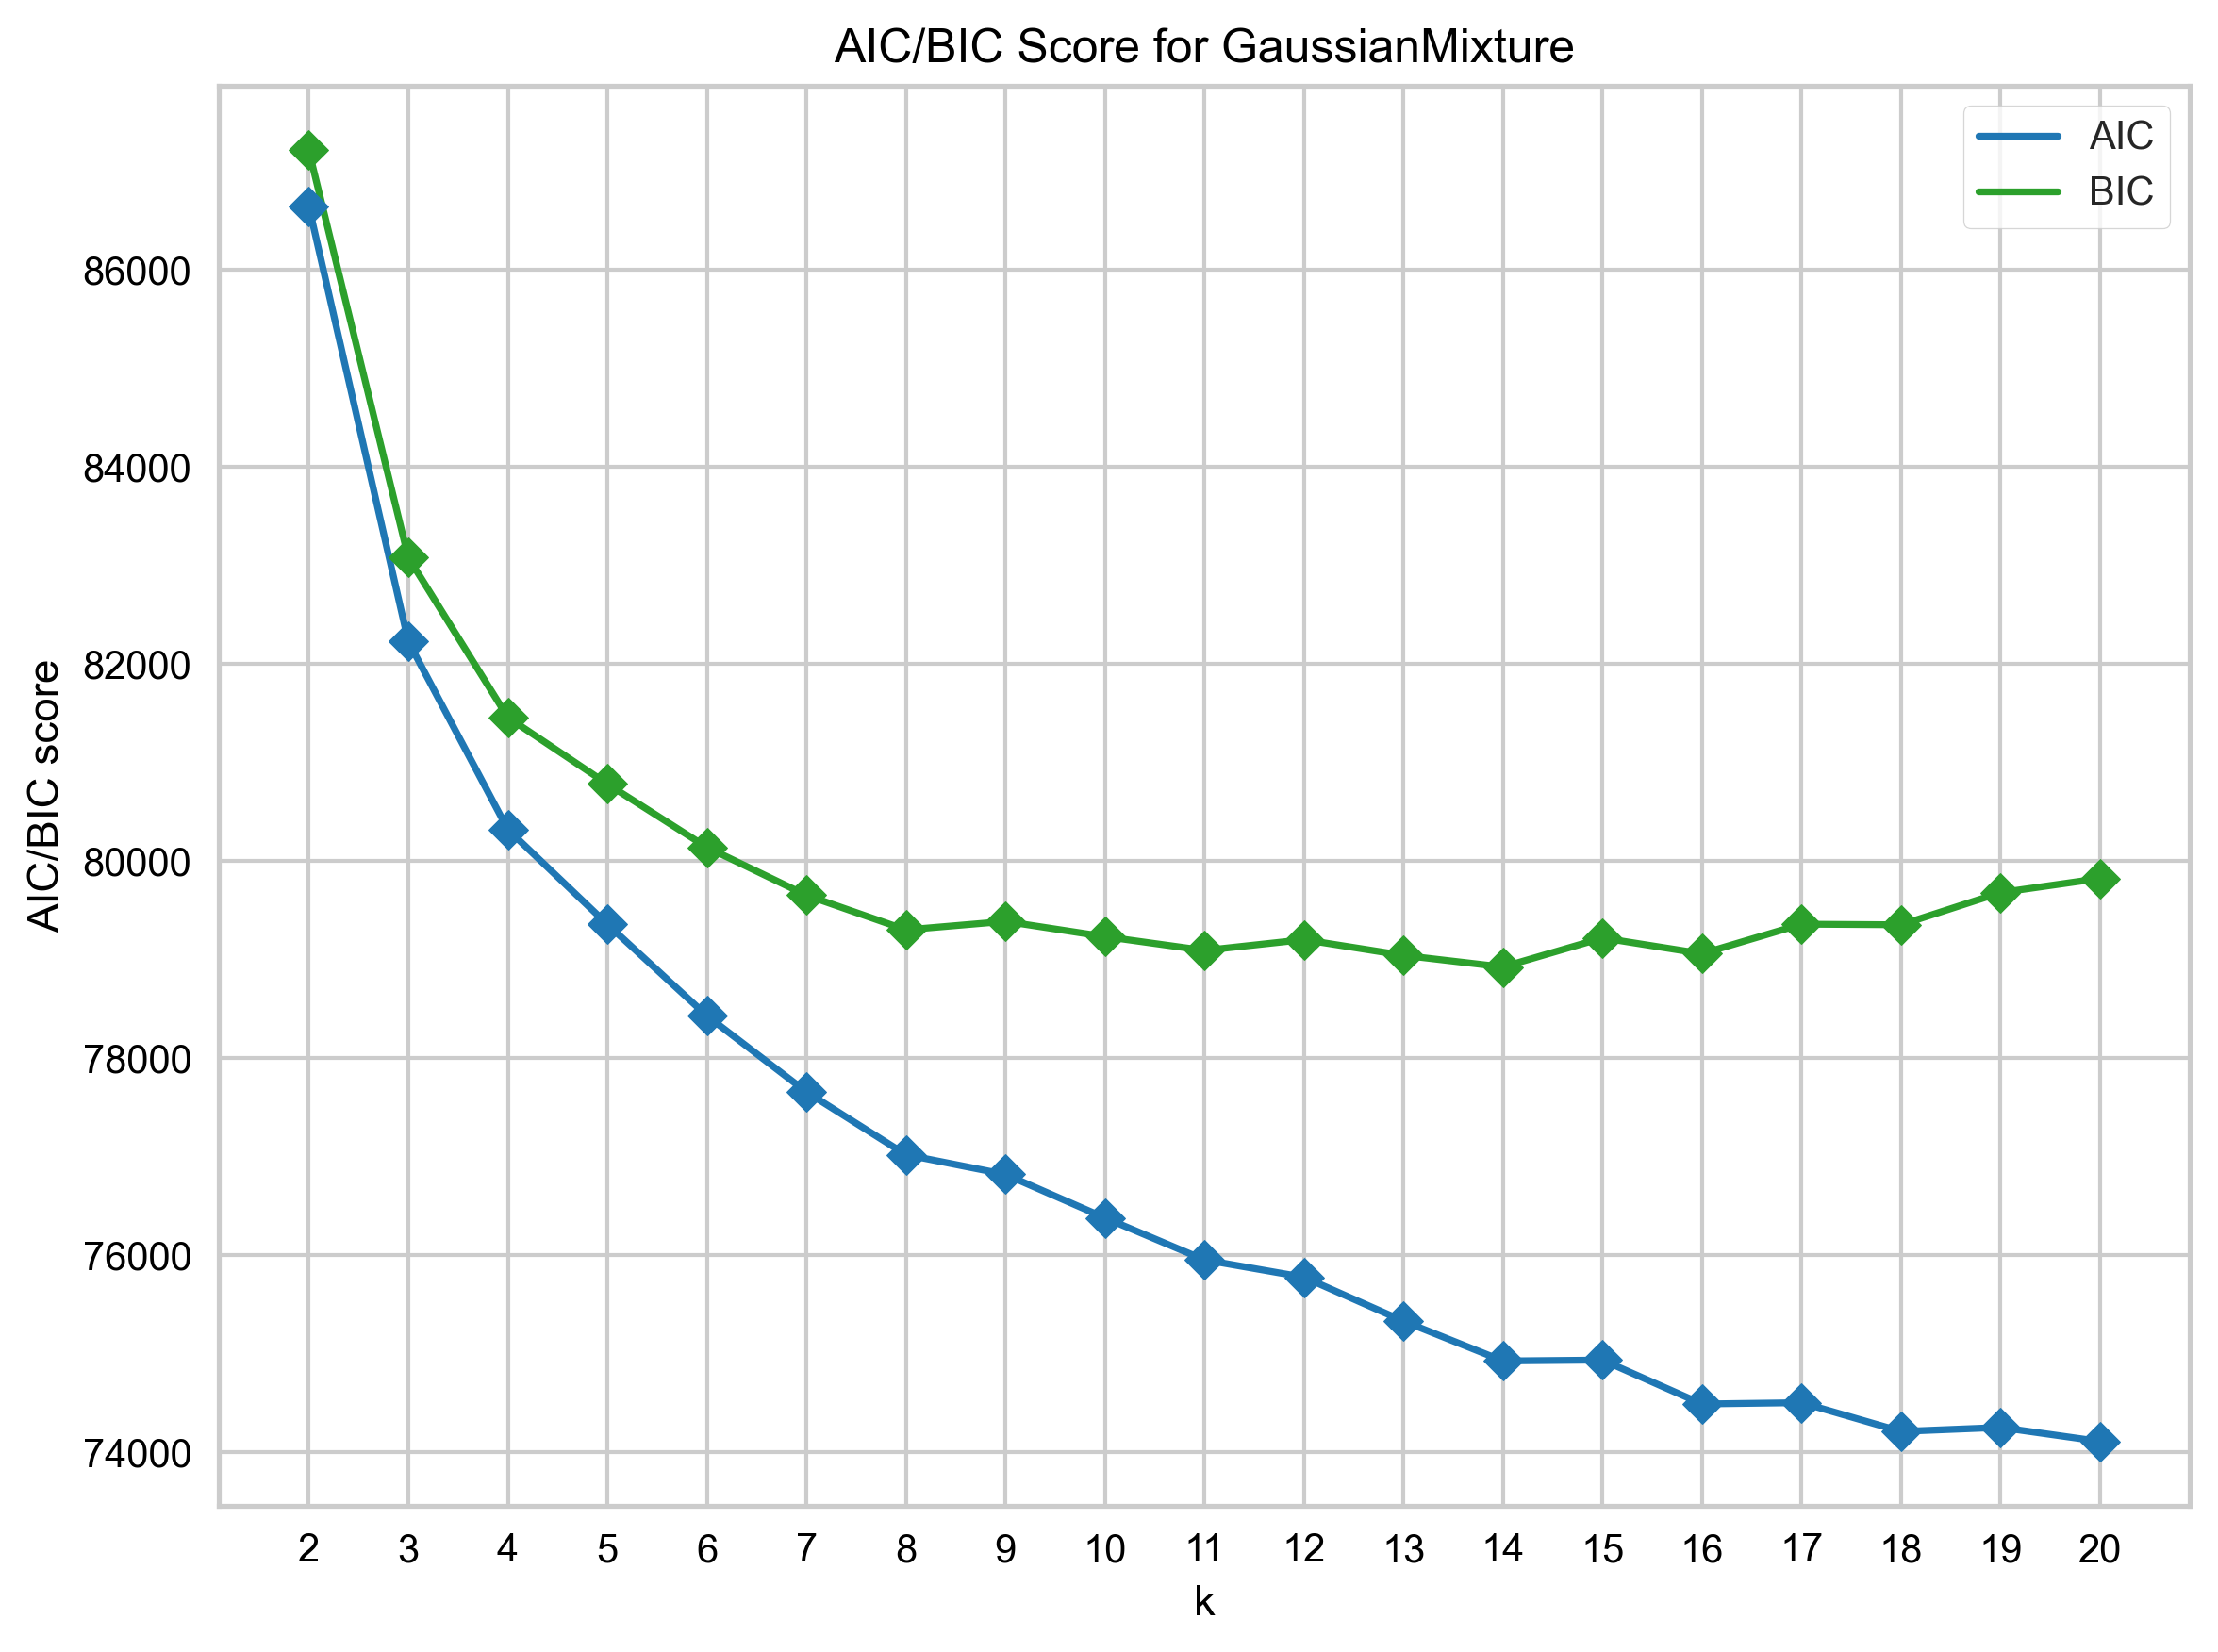

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


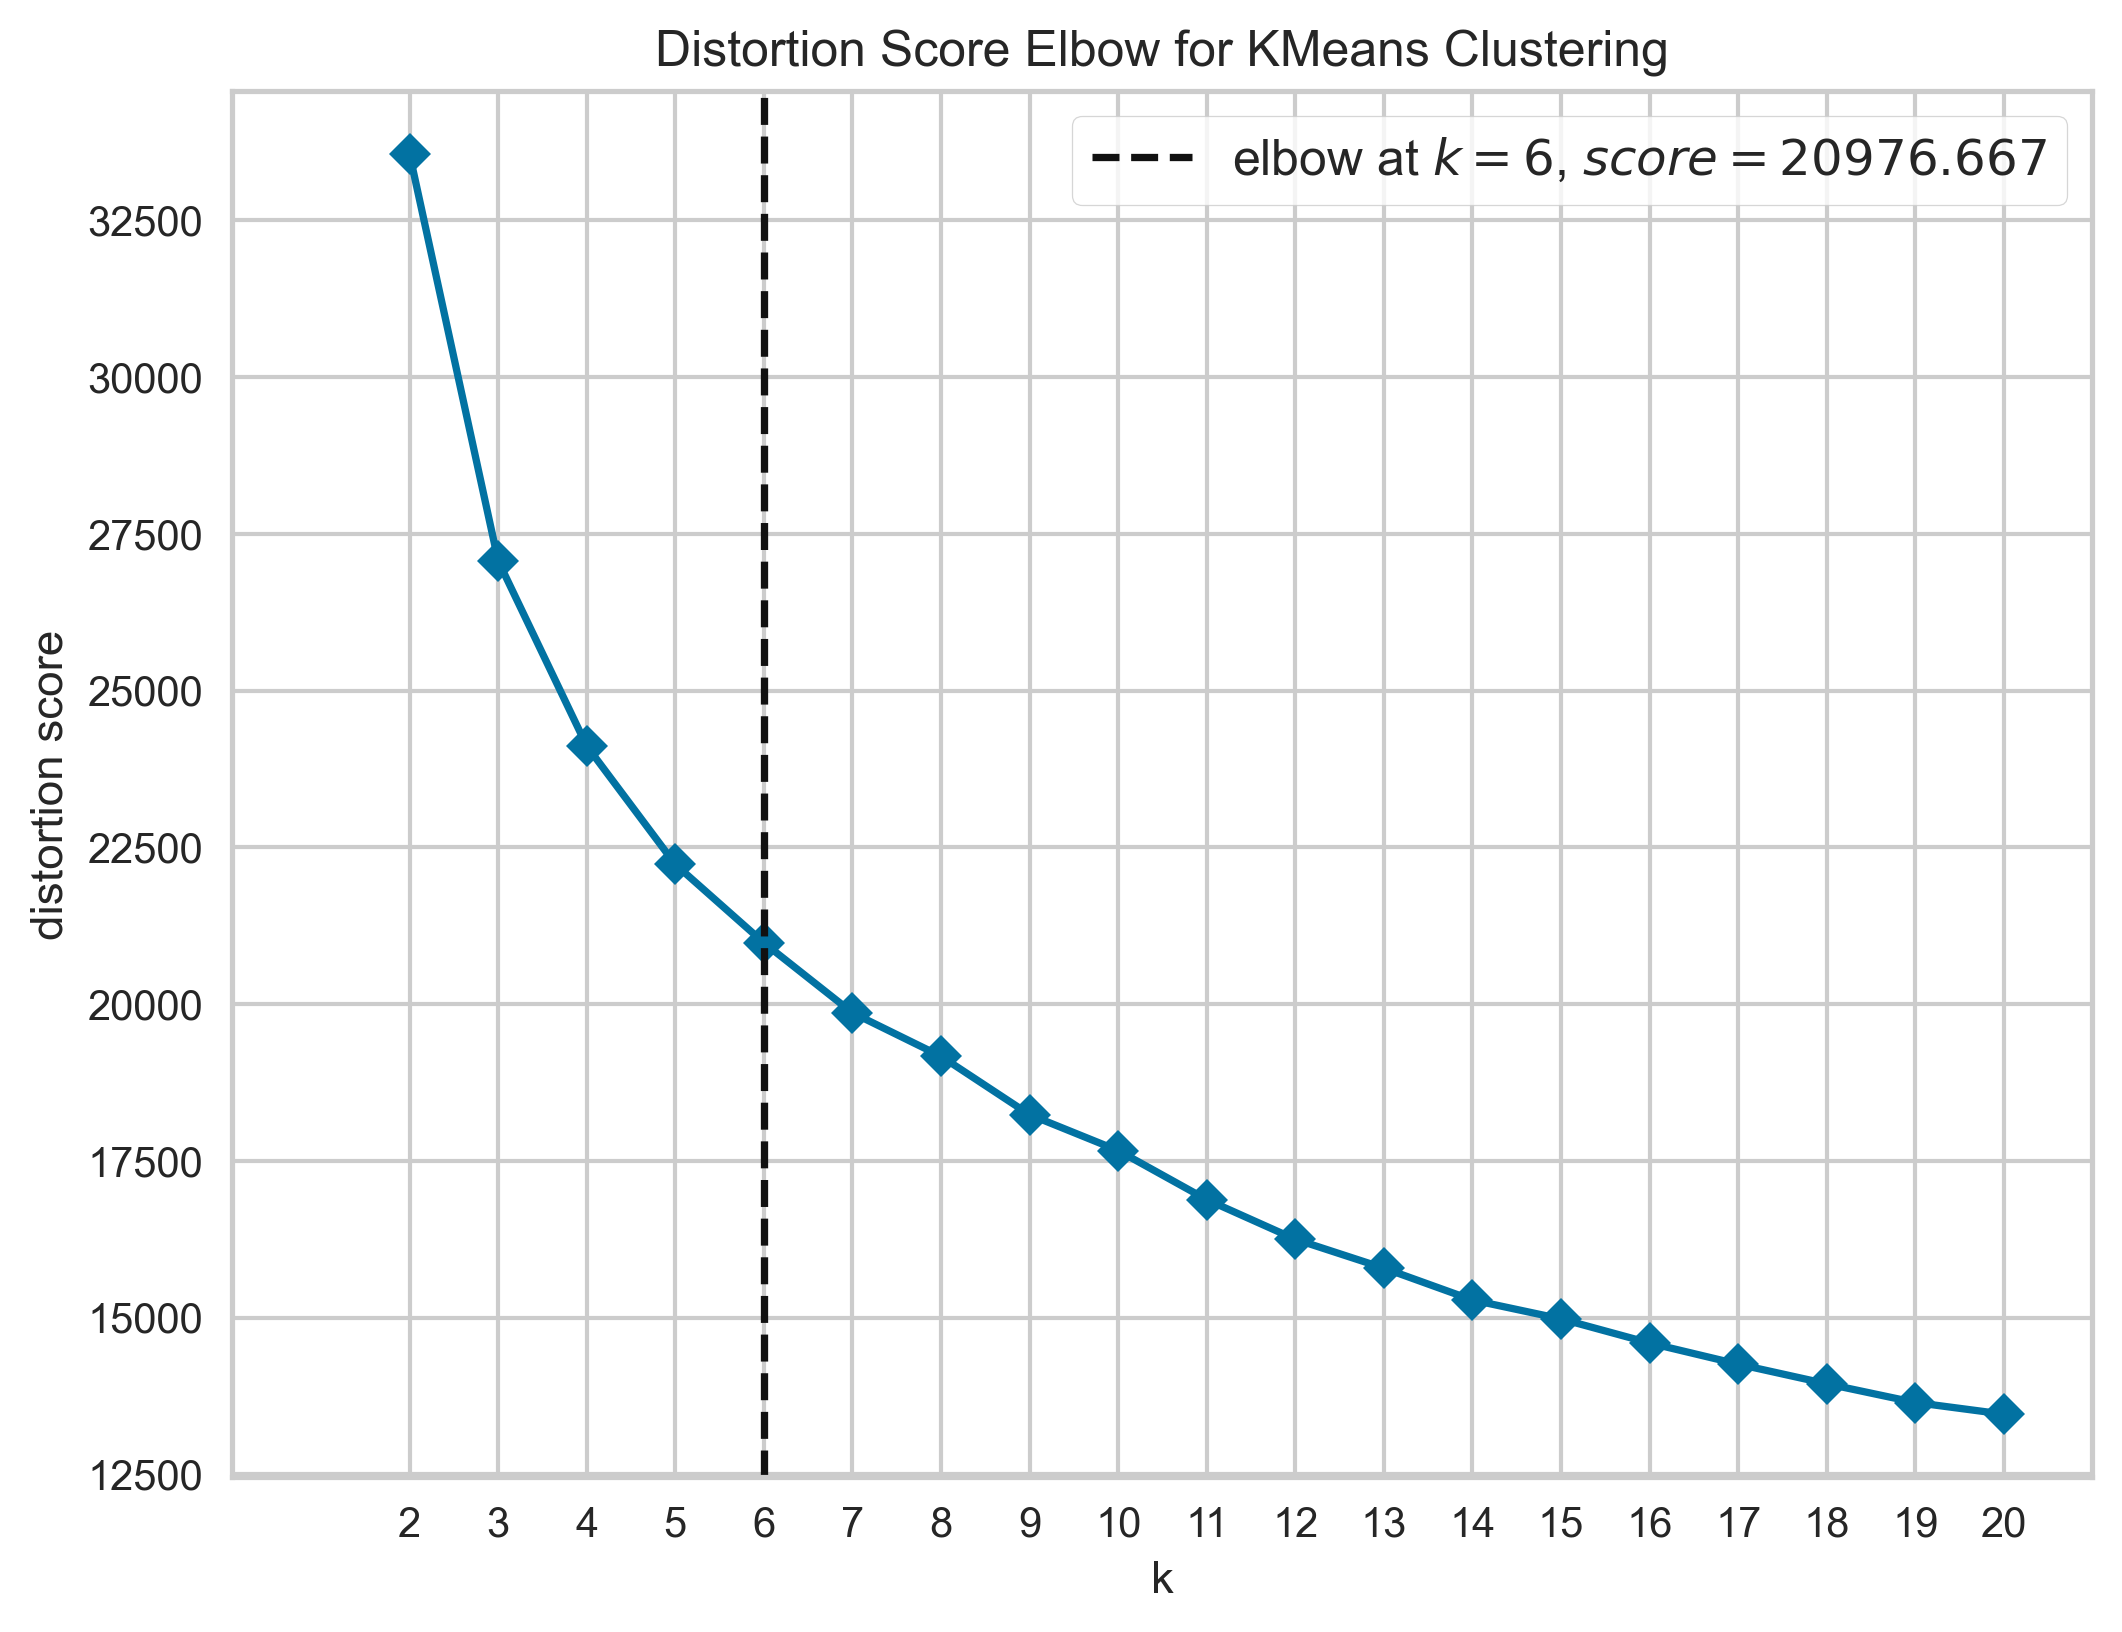

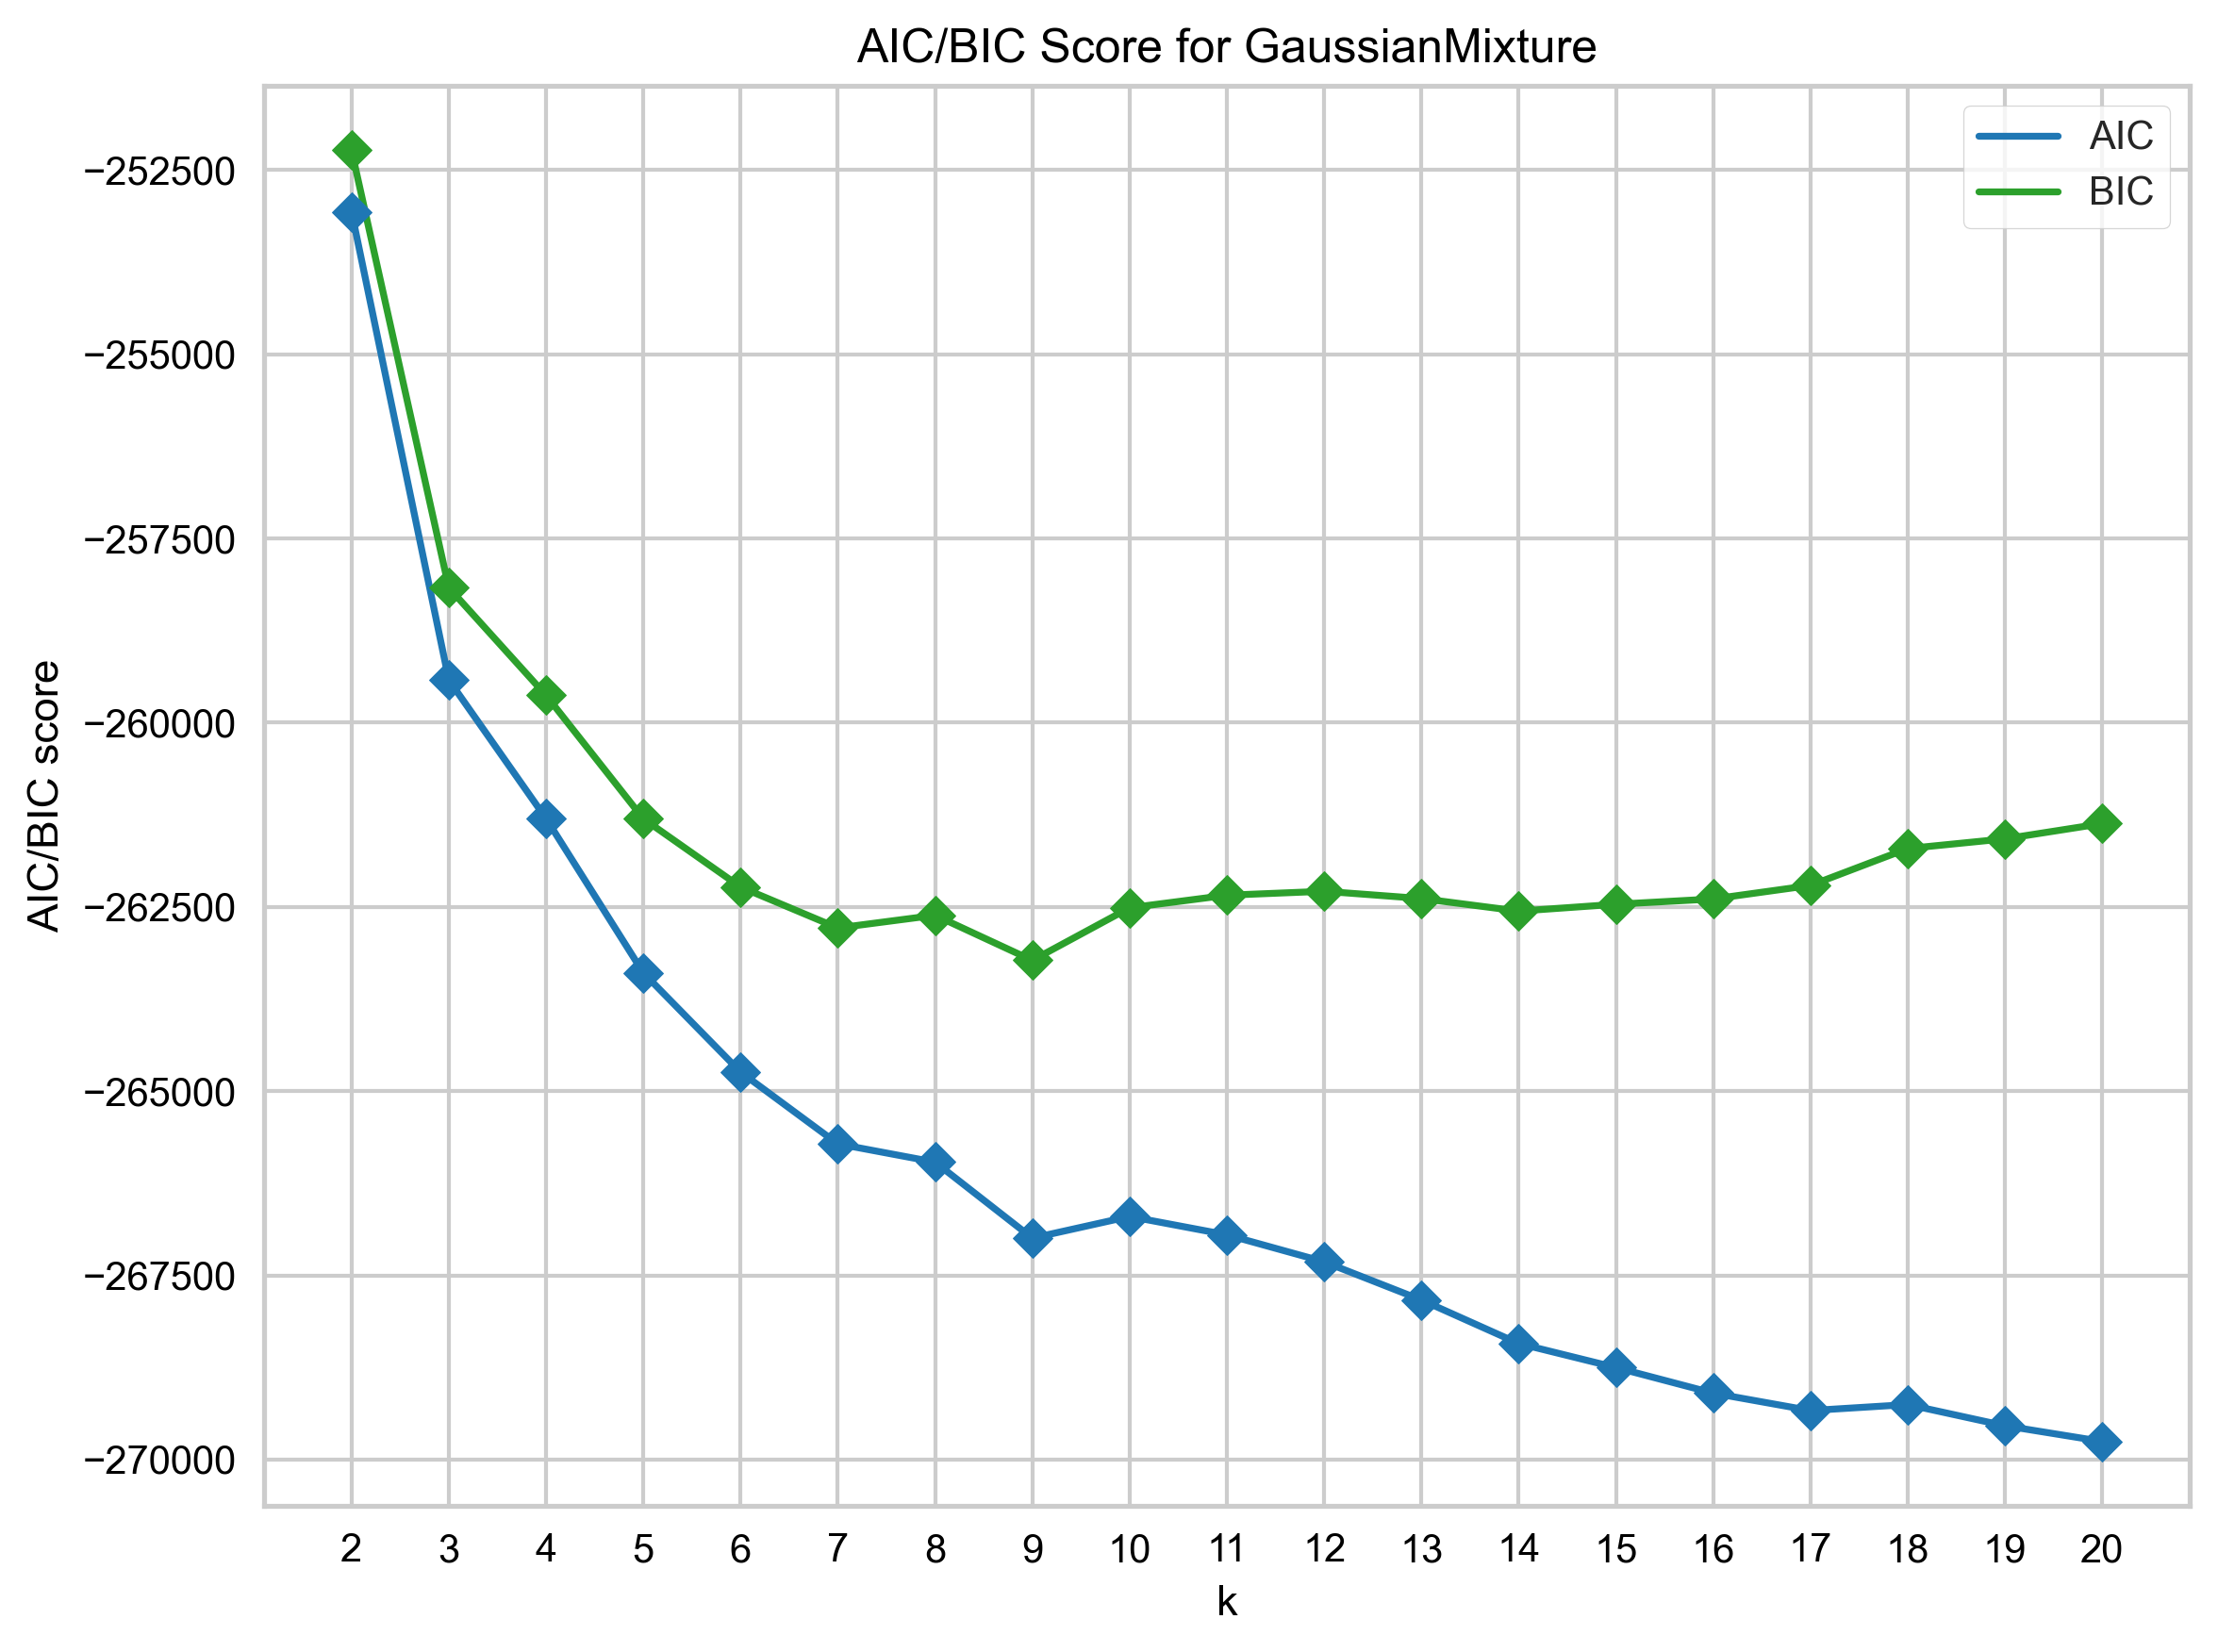

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


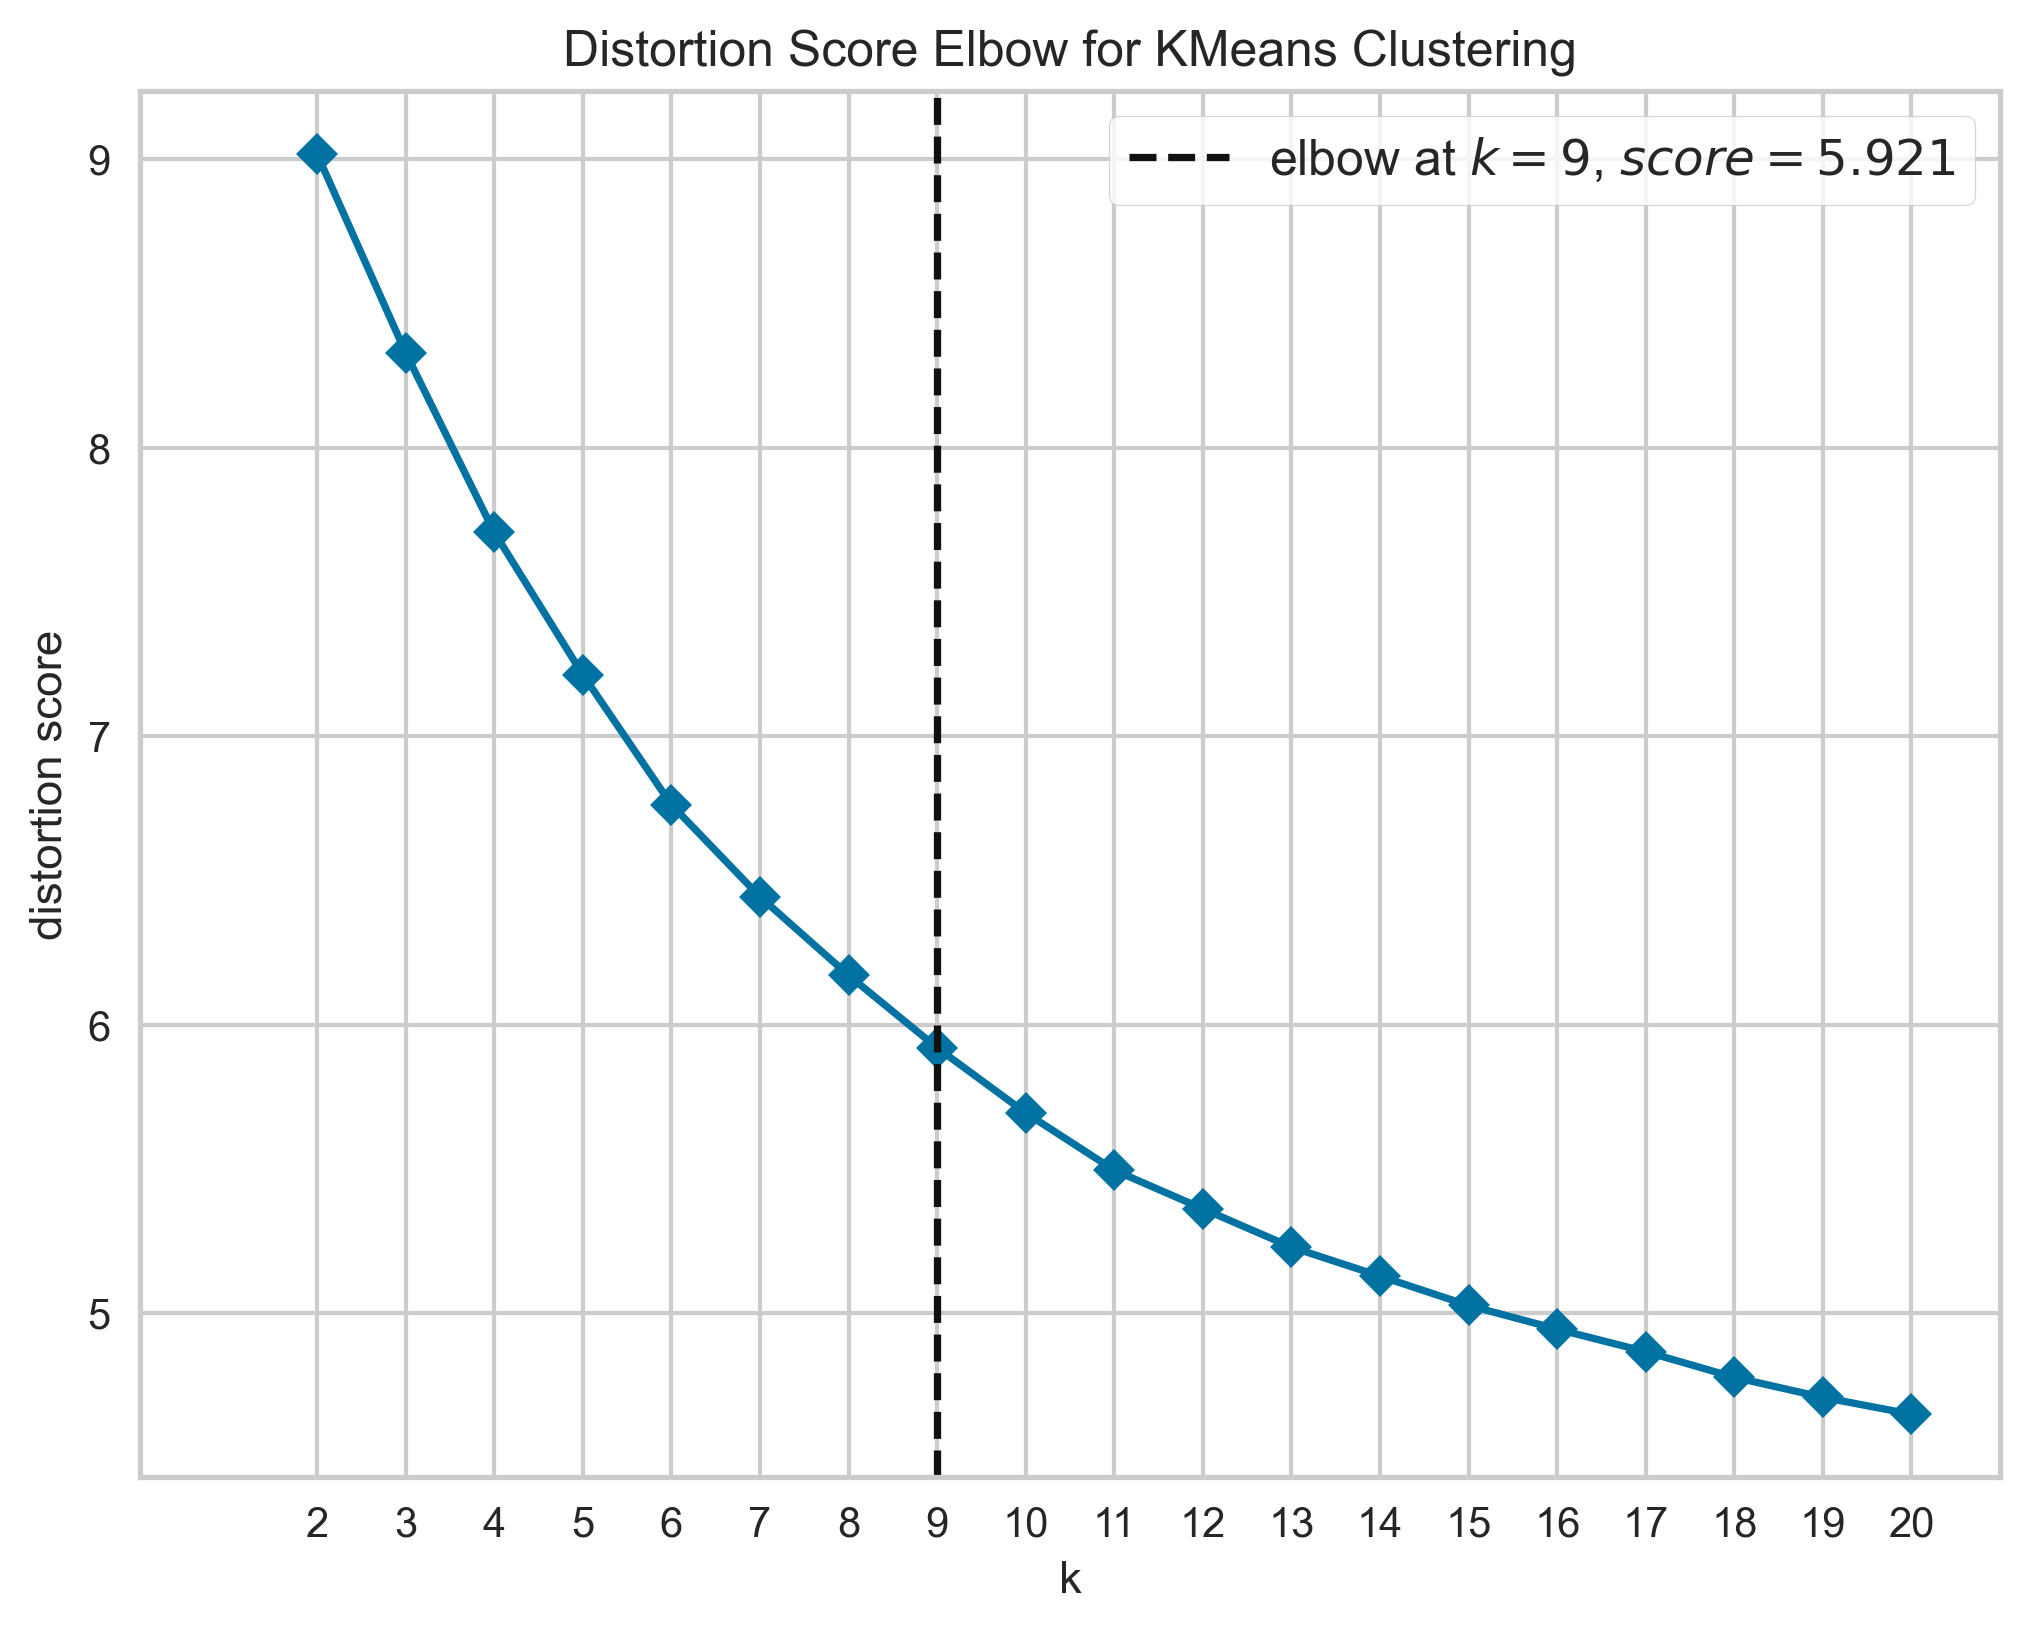

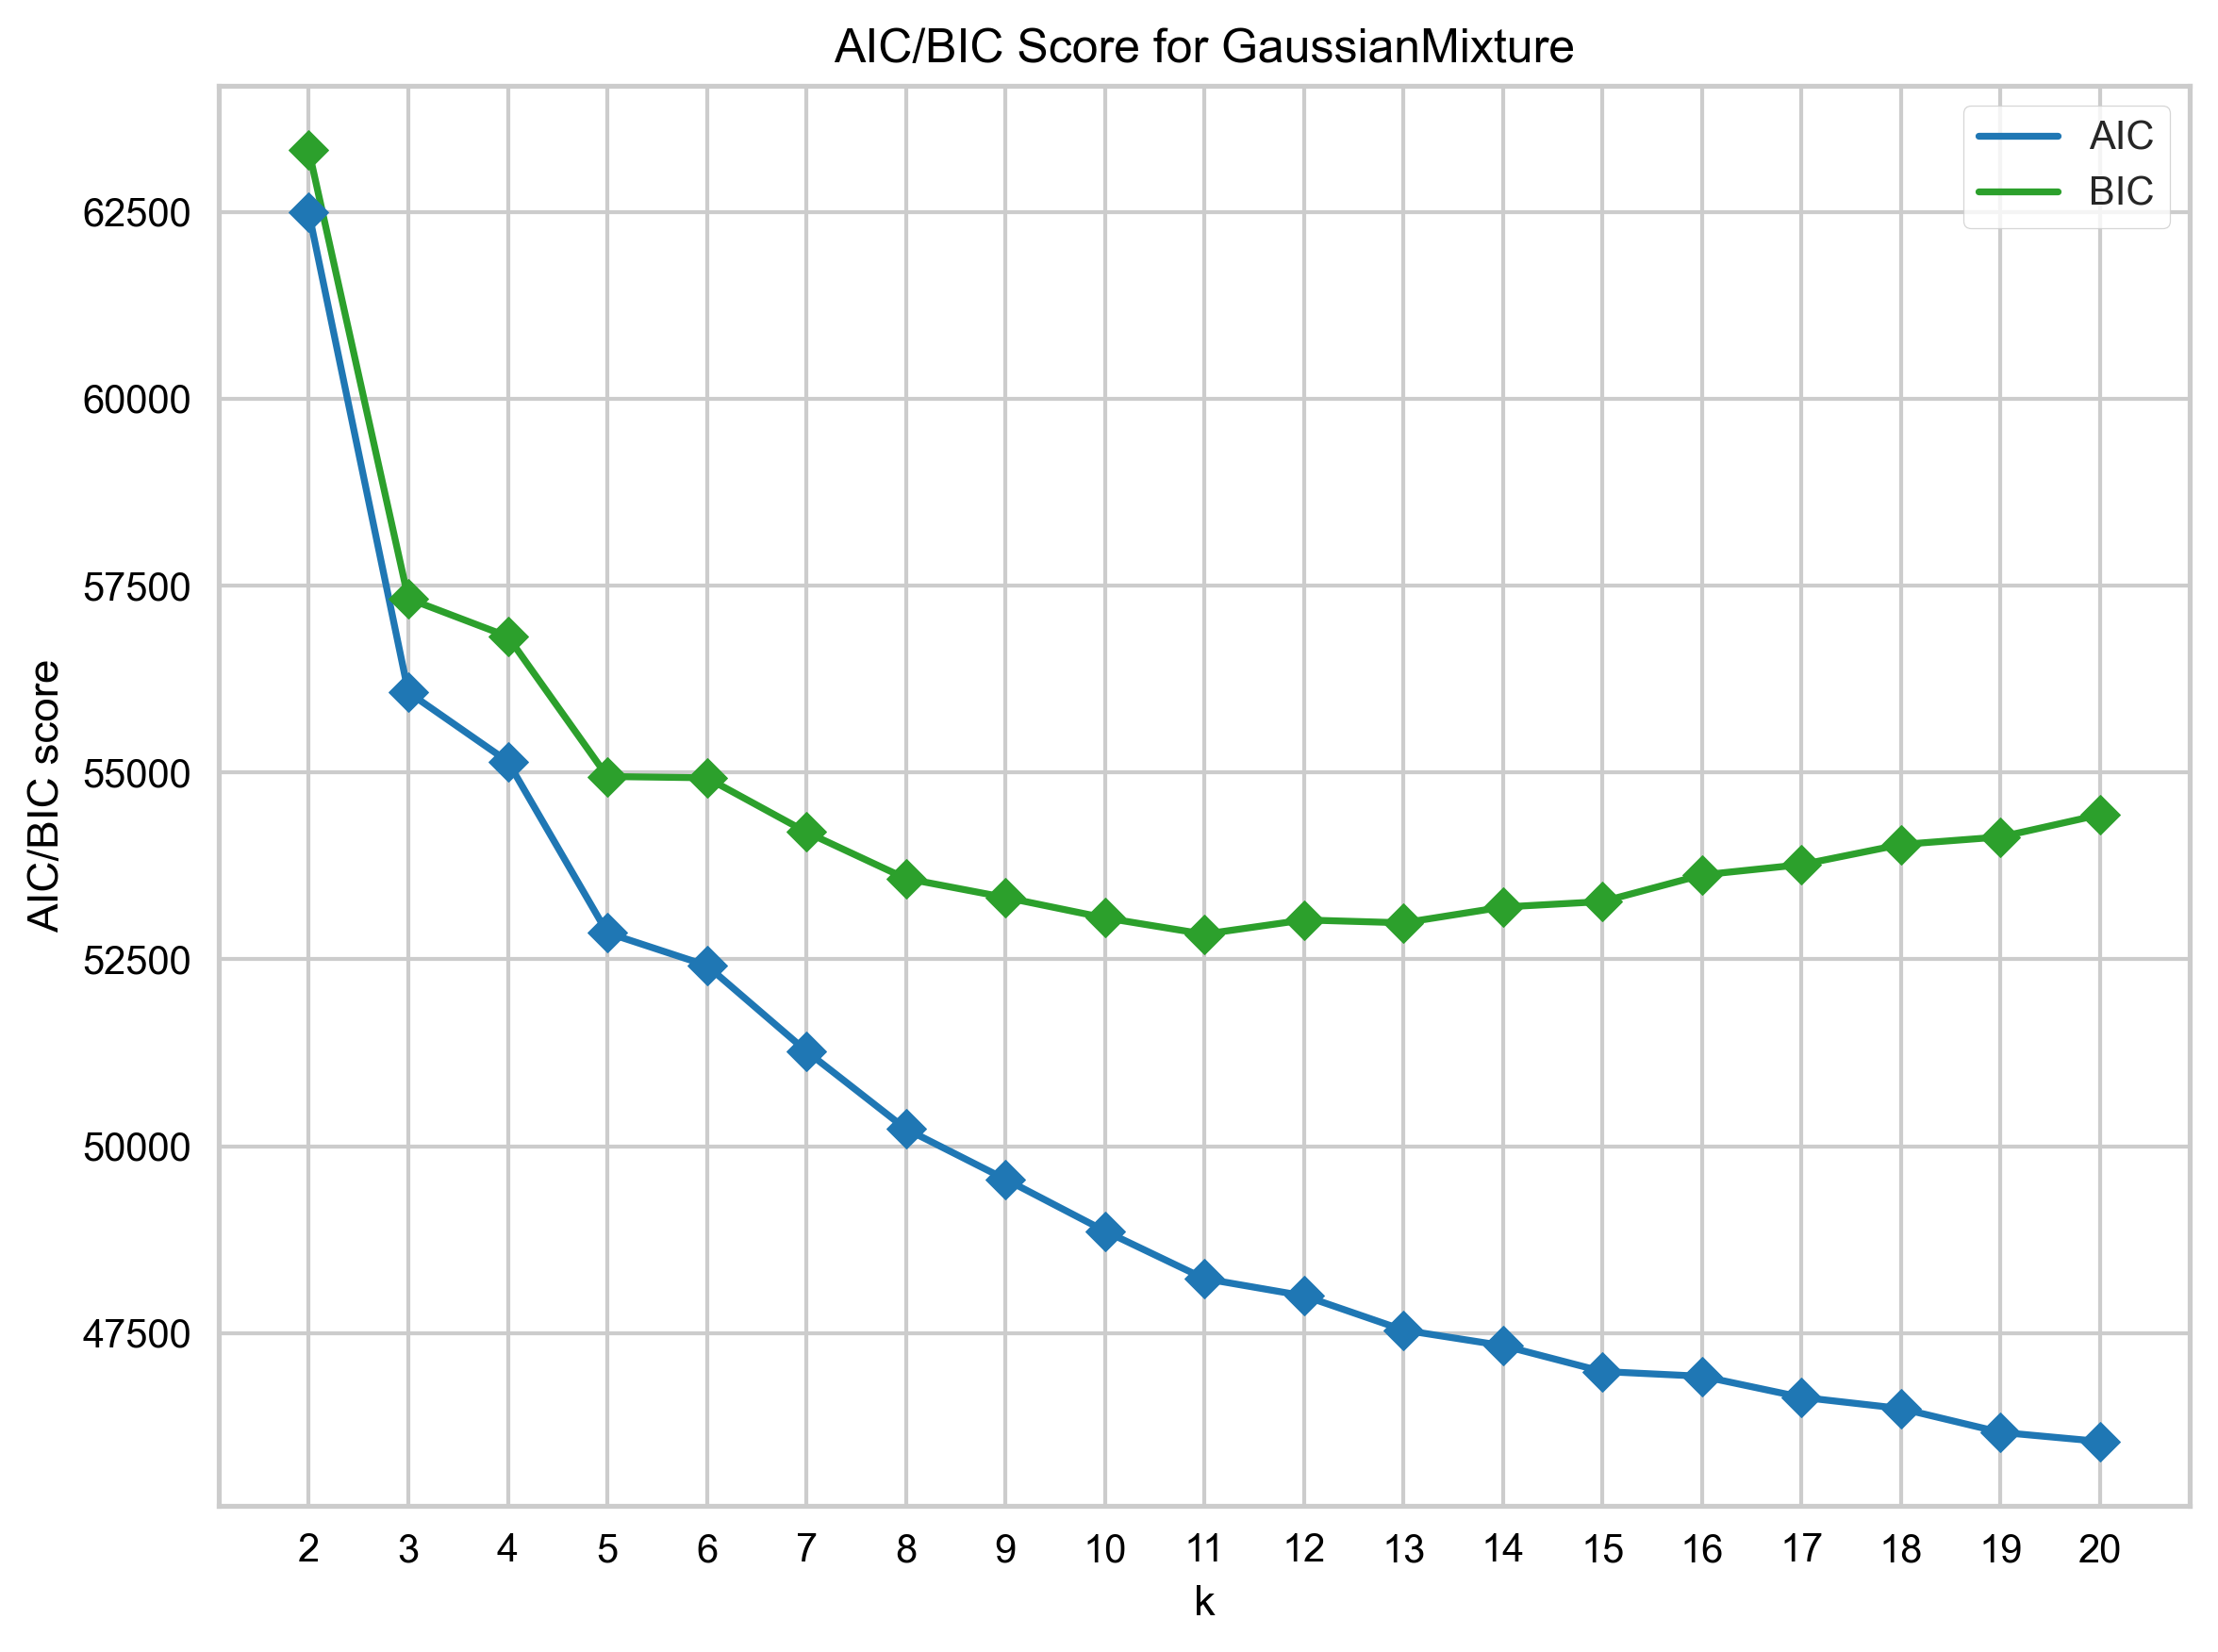

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


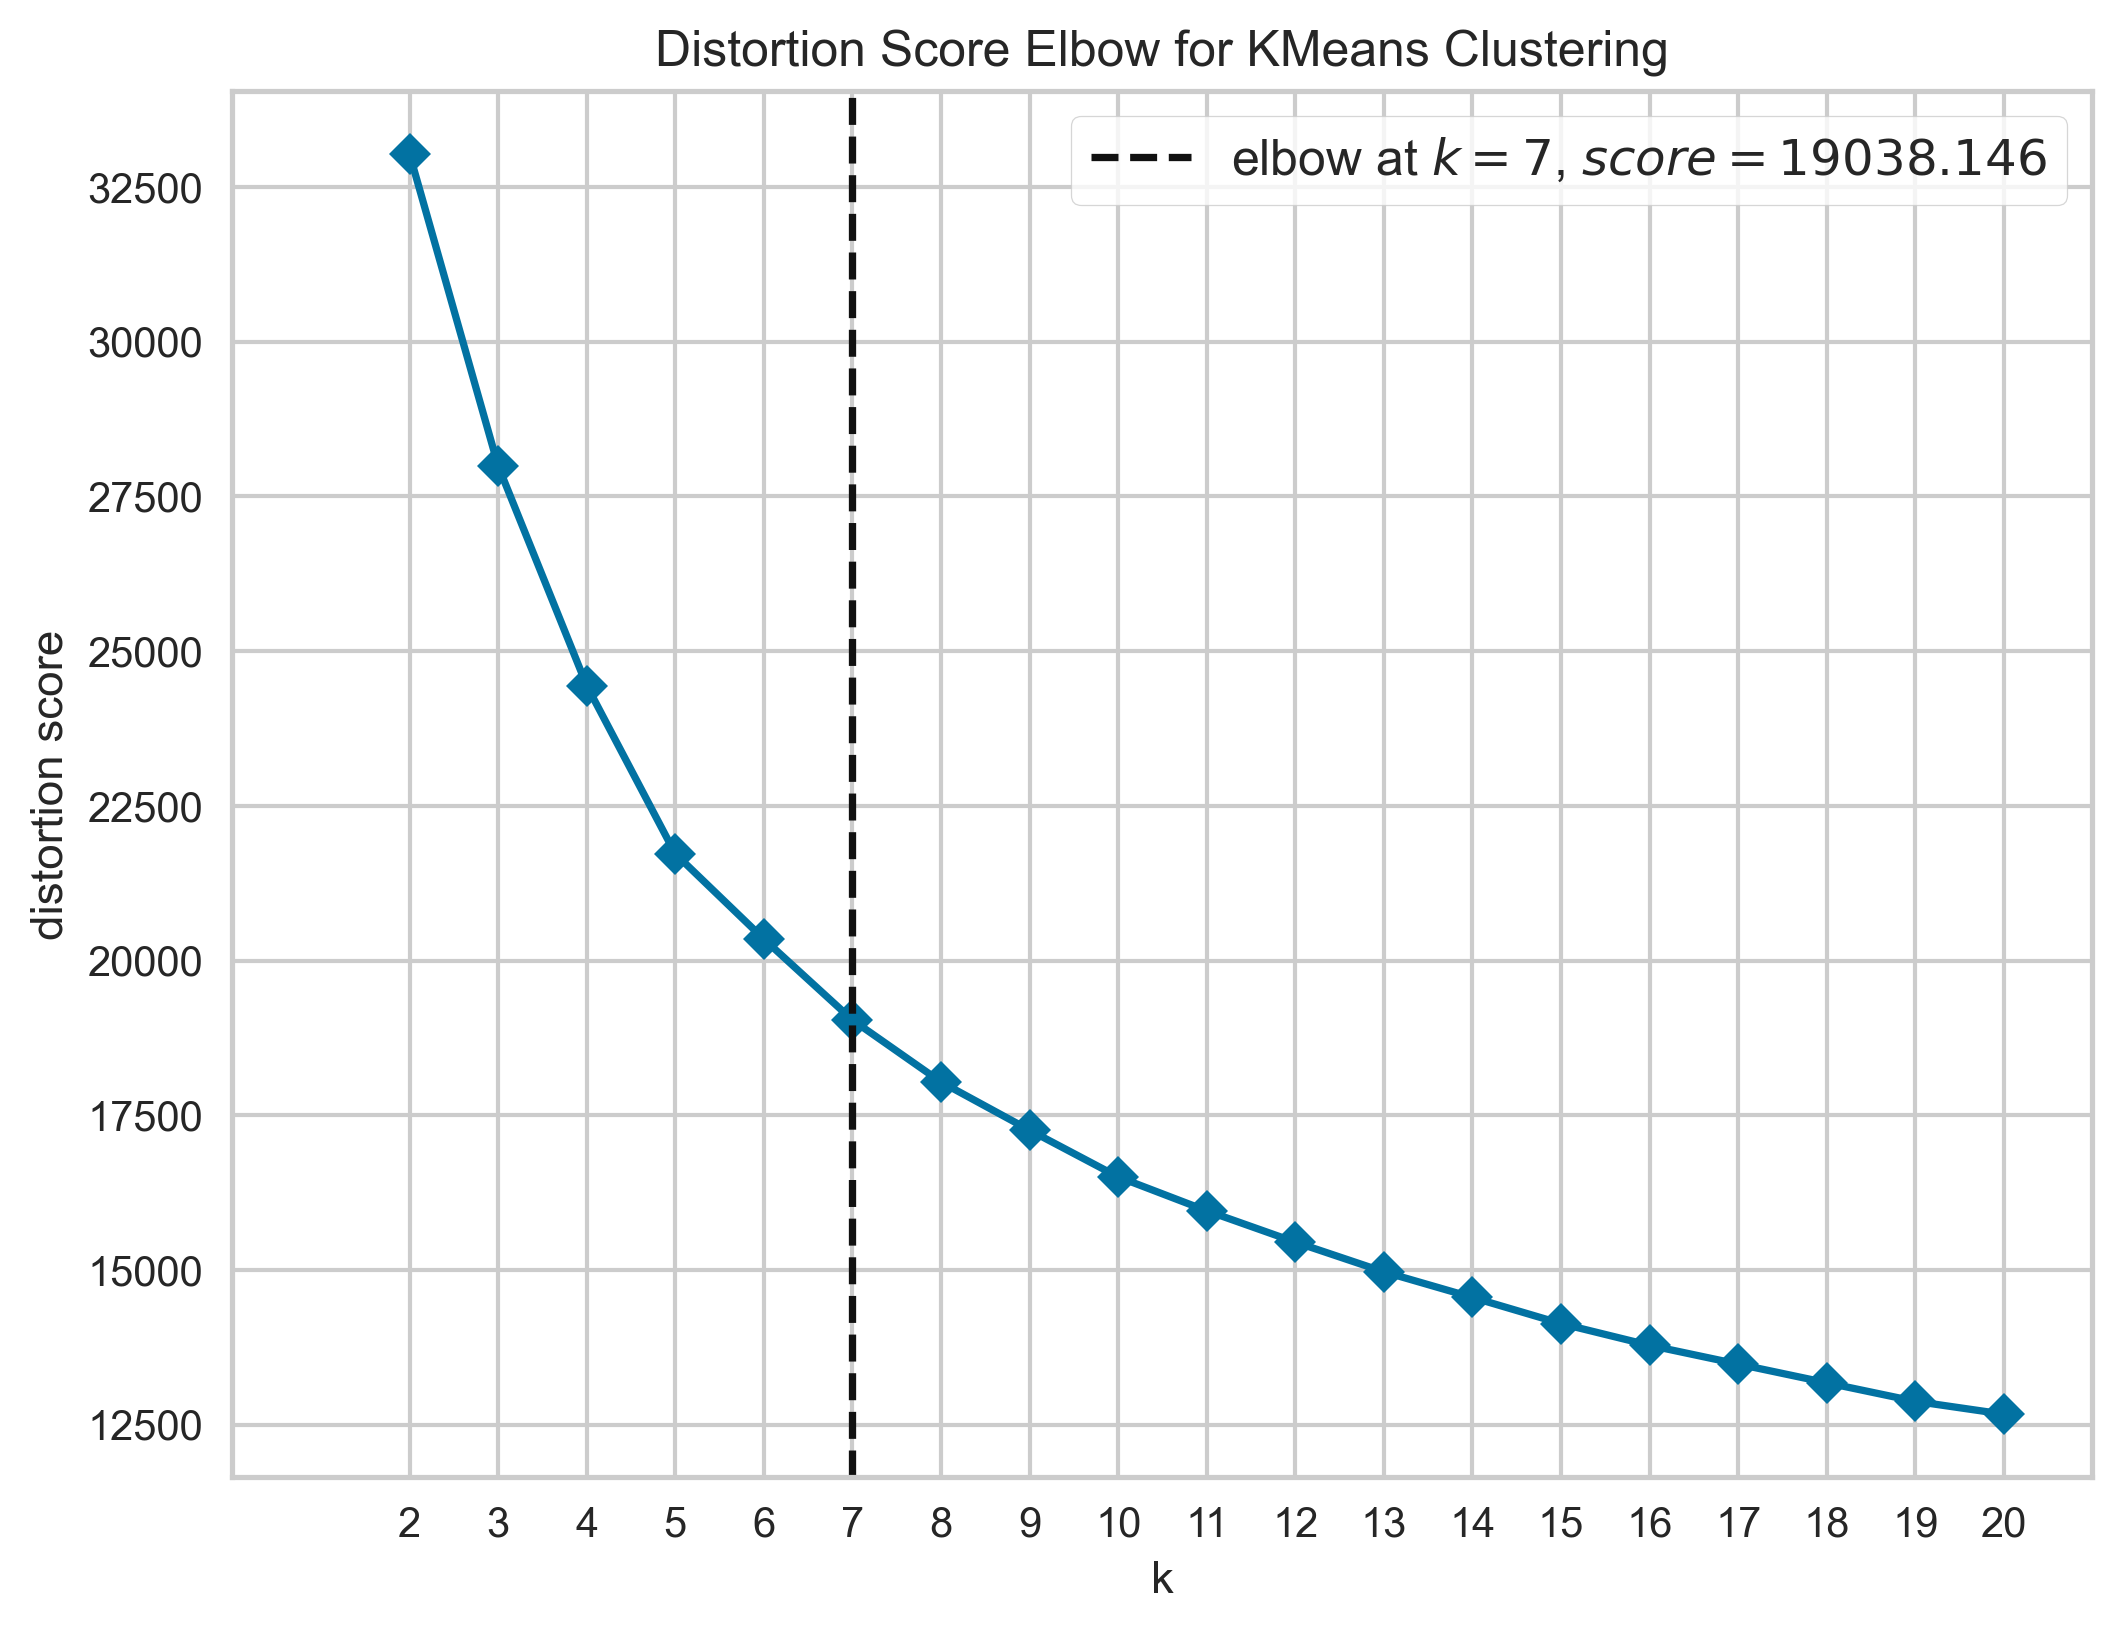

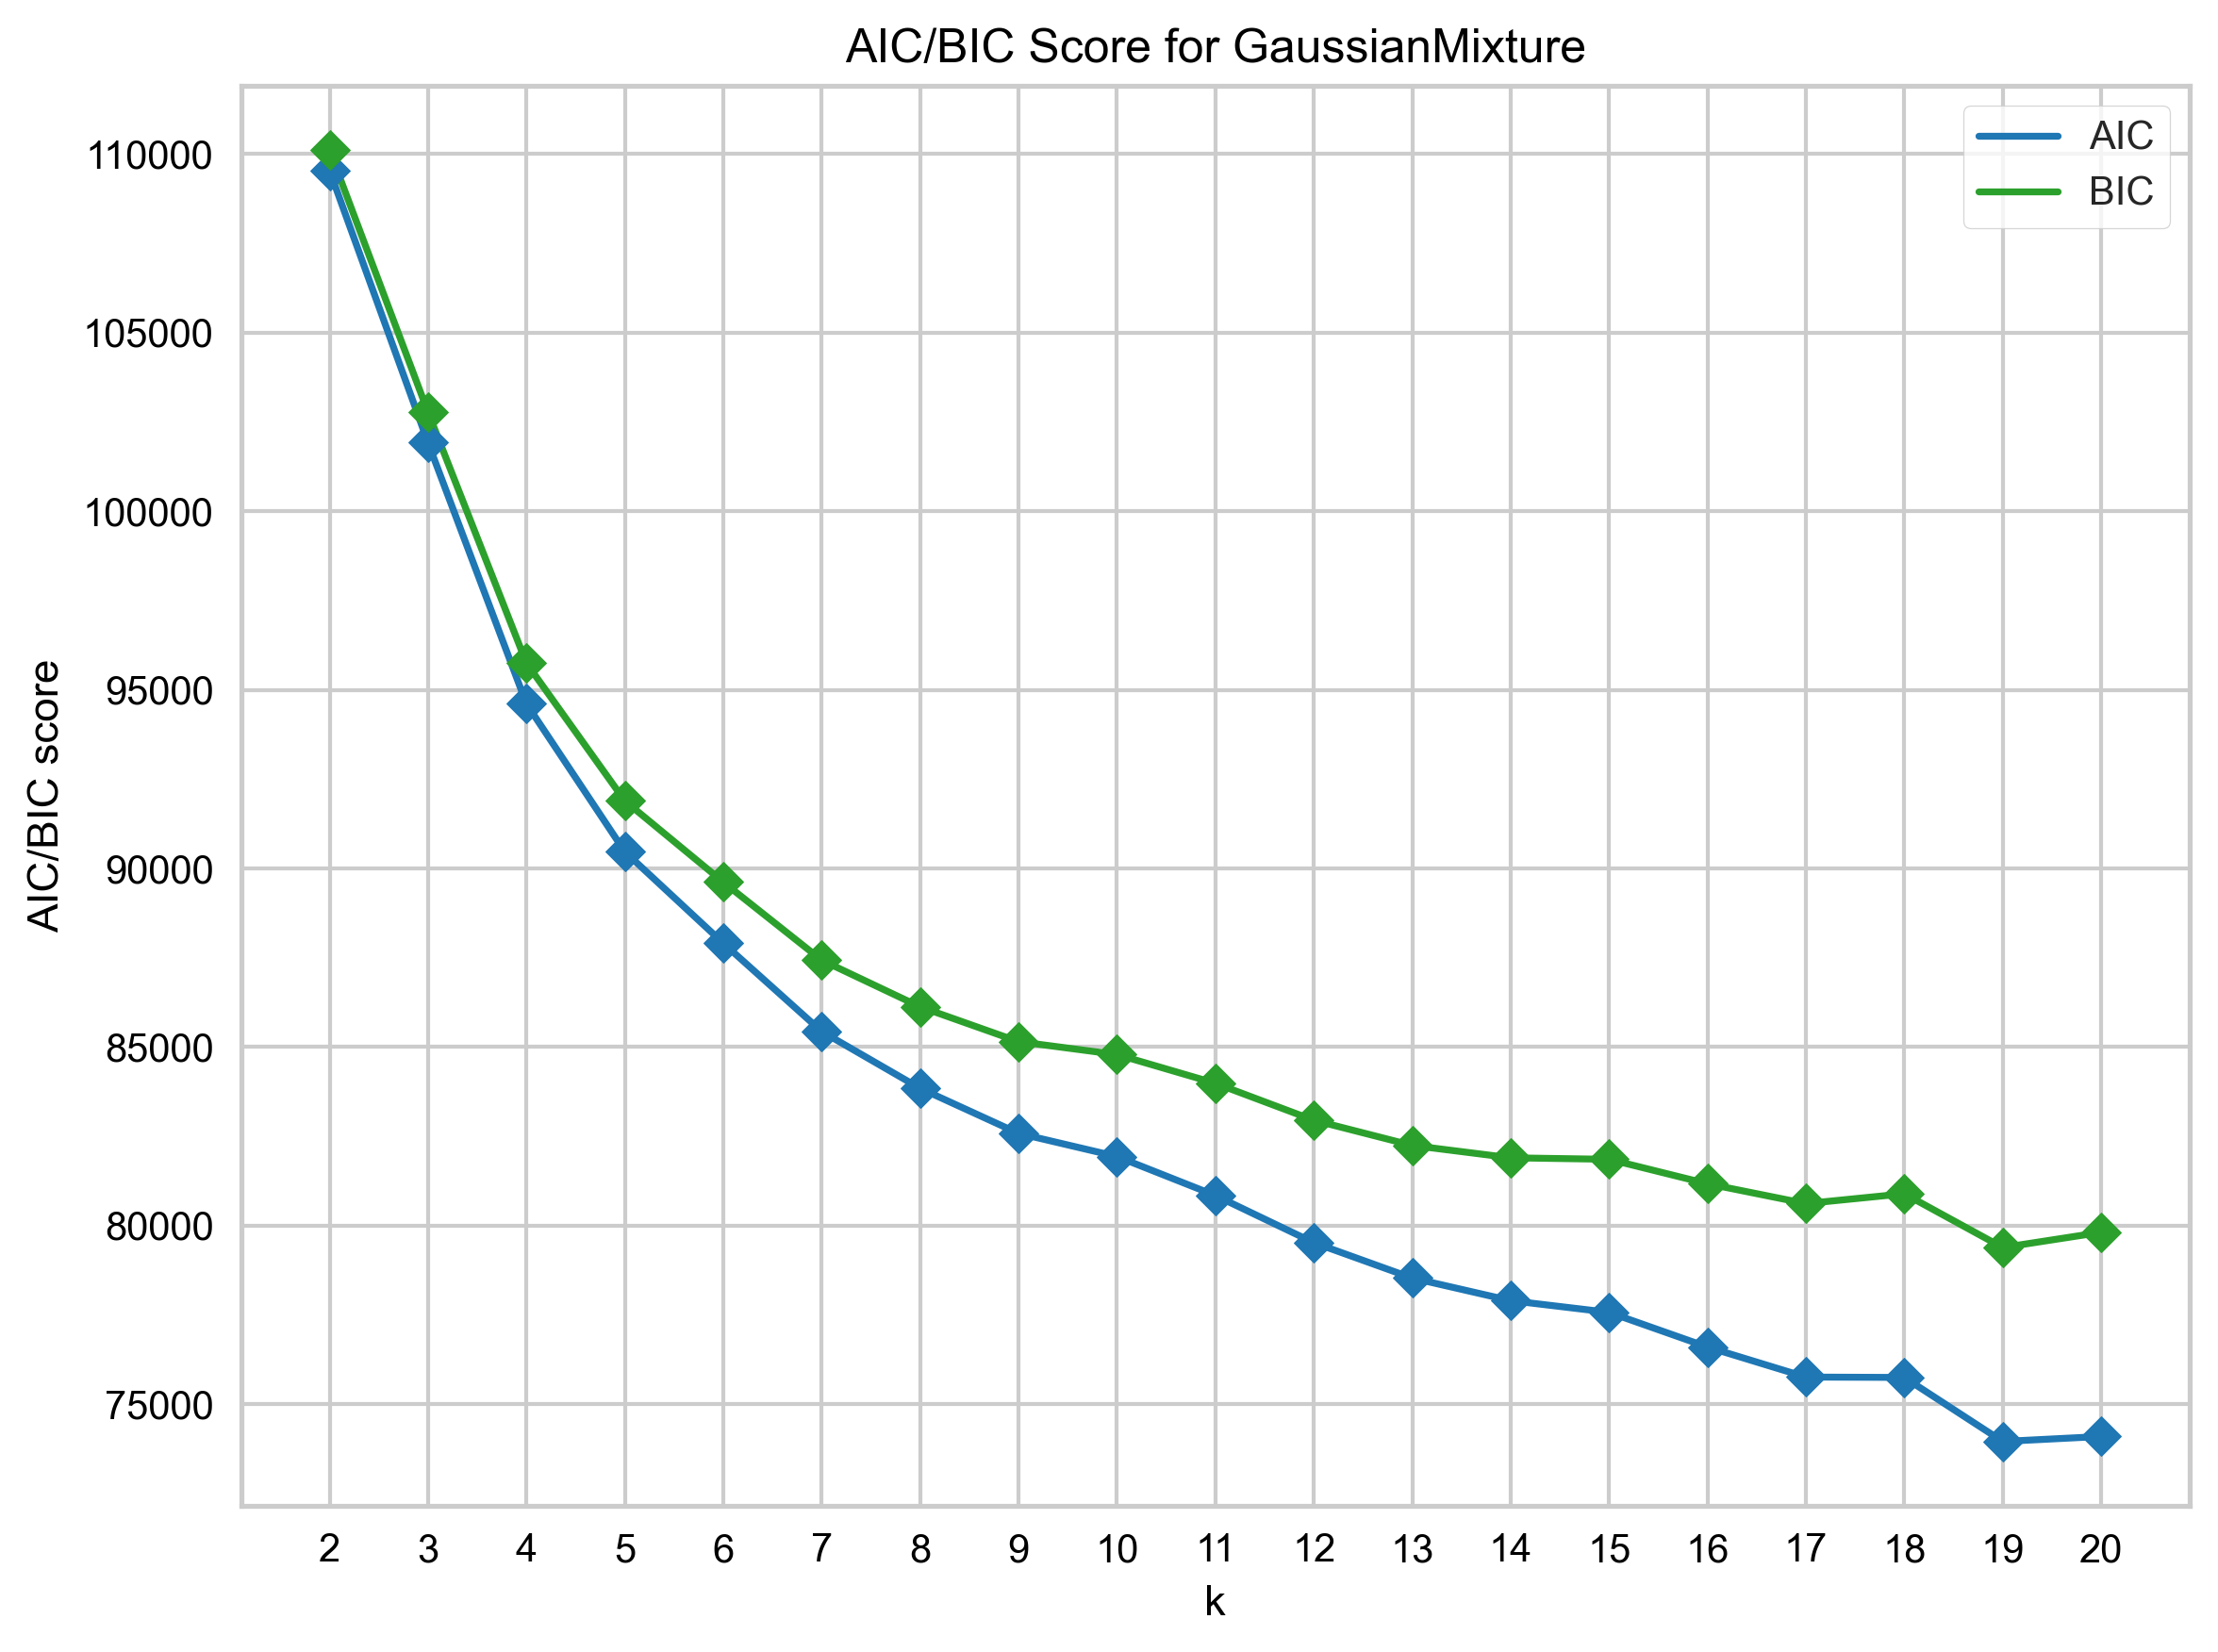

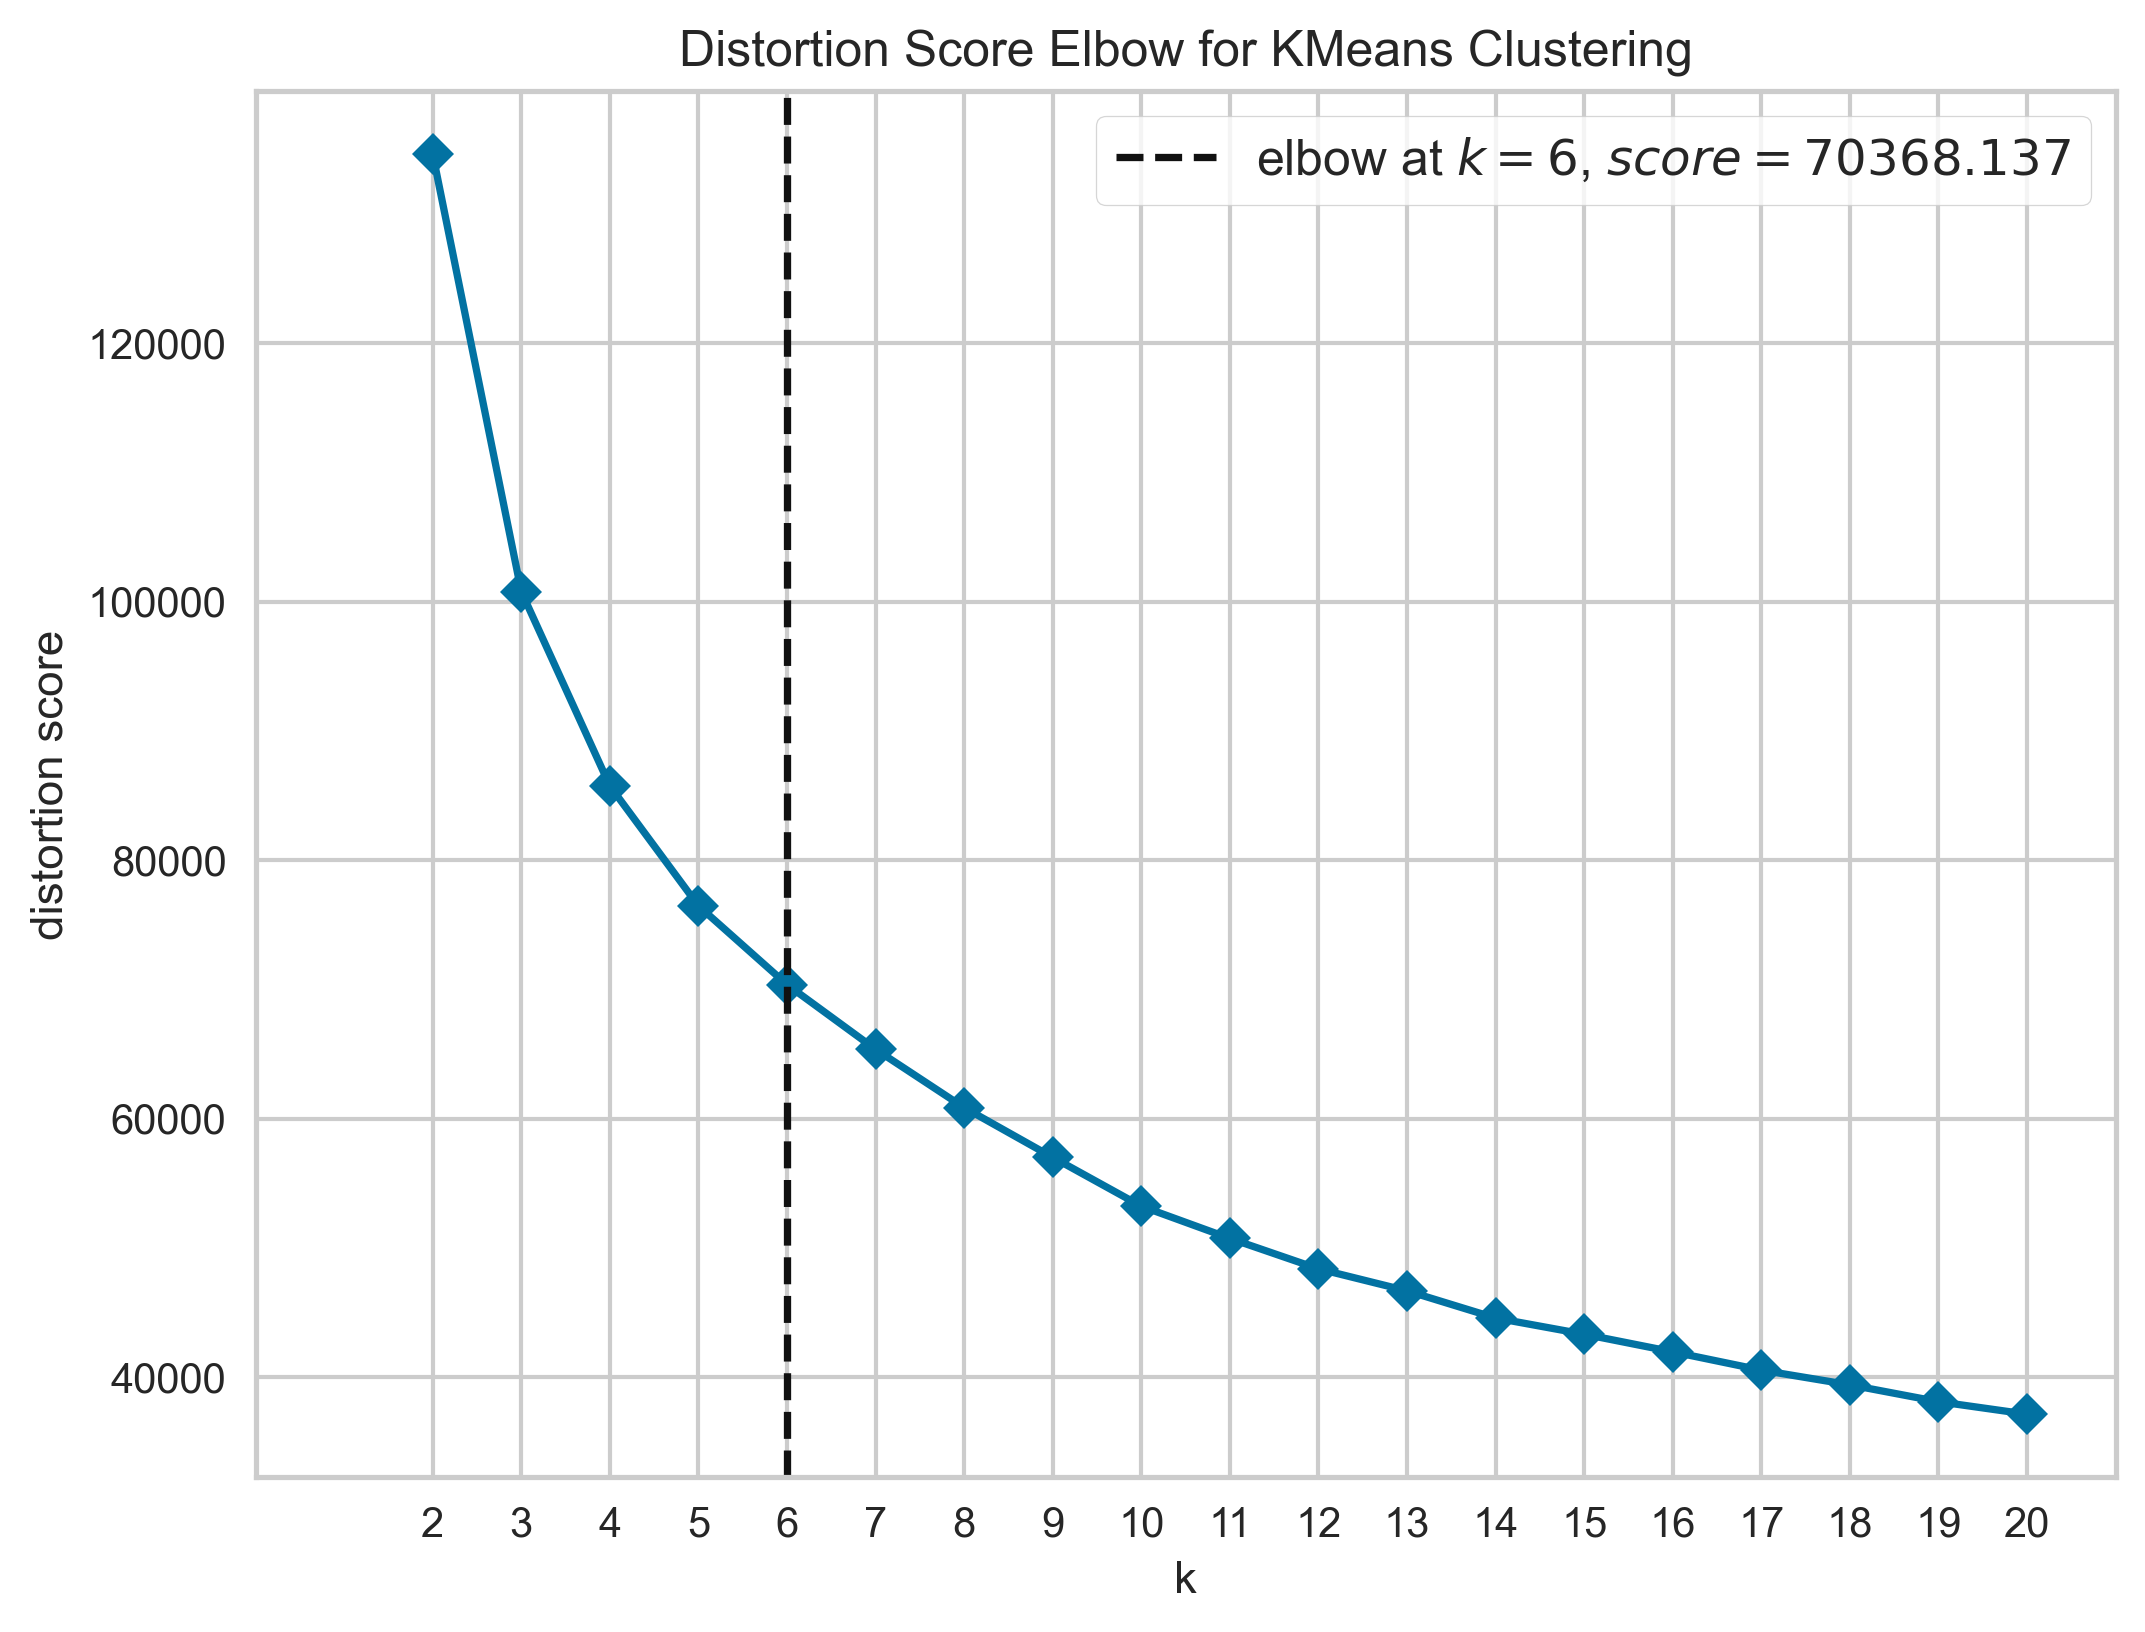

In [130]:
for projection in projections:
    short_name, name, transformer = projection
    X_train_transformed = transformer.fit_transform(X_train)

    charts.gmm_visualize_aic_bic(
        X_data=X_train_transformed,
        output_path=f"{STEP_3_PATH}/em_{short_name}_aic_bic.png",
        seed=SEED,
        k_max=20,
        n_init=10,
    )
    charts.k_means_visualize(
        X_data=X_train_transformed,
        output_path=f"{STEP_3_PATH}/k_means_{short_name}_distortion.png",
        seed=SEED,
        metric='distortion',
        locate_elbow=True
    )

In [140]:
importlib.reload(evals)

baseline_models = [
    ('Baseline, KMeans(k=7)', DummyTransformer(), KMeans(random_state=SEED, n_clusters=7)),
    ('Baseline, GMM(k=8)', DummyTransformer(), GaussianMixture(random_state=SEED, n_components=8, n_init=10)),
]

new_models = [
    ('PCA(n=8), KMeans(k=6)', PCA(n_components=8), KMeans(random_state=SEED, n_clusters=6)),
    ('PCA(n=8), GMM(k=14)', PCA(n_components=8), GaussianMixture(random_state=SEED, n_components=14, n_init=10)),

    ('ICA(n=10), KMeans(k=9)', FastICA(n_components=10), KMeans(random_state=SEED, n_clusters=9)),
    ('ICA(n=10), GMM(k=9)', FastICA(n_components=10), GaussianMixture(random_state=SEED, n_components=9, n_init=10)),

    ('RP(n=10), KMeans(k=7)', GaussianRandomProjection(n_components=10), KMeans(random_state=SEED, n_clusters=7)),
    ('RP(n=10), GMM(k=11)', GaussianRandomProjection(n_components=10),
     GaussianMixture(random_state=SEED, n_components=11, n_init=10)),

    ('Isomap(n=8), KMeans(k=6)', Isomap(n_components=8), KMeans(random_state=SEED, n_clusters=6)),
    ('Isomap(n=8), GMM(k=19)', Isomap(n_components=8), GaussianMixture(random_state=SEED, n_components=19, n_init=10)),
]

evals.evaluate_models_with_transformers(
    models=baseline_models + new_models,
    X_data=X_train,
    labels=y_train
)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
Baseline, KMeans(k=7)    0    0.625605   0.060003            0.092530   
Baseline, GMM(k=8)       0    0.625141   0.063513            0.099790   
PCA(n=8), KMeans(k=6)    0    0.624920   0.058616            0.089494   
PCA(n=8), GMM(k=14)      0    0.648528   0.076618            0.141065   
ICA(n=10), KMeans(k=9)   0    0.636196   0.056540            0.095792   
ICA(n=10), GMM(k=9)      0    0.630880   0.062698            0.103191   
RP(n=10), KMeans(k=7)    0    0.629024   0.067891            0.106963   
RP(n=10), GMM(k=11)      0    0.637691   0.056693            0.098575   
Isomap(n=8), KMeans(k=6) 0    0.609530   0.059690            0.086342   
Isomap(n=8), GMM(k=19)   0    0.655683   0.063183            0.130106   

                            Fowlkes-Mallows index  
Baseline, KMeans(k=7)    0               0.262941  
Baseline, GMM(k=8)       0               0.269107  
PCA(n=8), KMeans(k=6)    0               0.264790  
PCA(n=8), GMM(k=14)      0               0.217982  
ICA(n=10), KMeans(k=9)   0               0.224844  
ICA(n=10), GMM(k=9)      0               0.247150  
RP(n=10), KMeans(k=7)    0               0.259199  
RP(n=10), GMM(k=11)      0               0.225928  
Isomap(n=8), KMeans(k=6) 0               0.293658  
Isomap(n=8), GMM(k=19)   0               0.161988

In [141]:
kmeans_baseline_clusters = KMeans(random_state=SEED, n_clusters=7).fit_predict(X_train)
gmm_baseline_clusters = GaussianMixture(random_state=SEED, n_components=8, n_init=10).fit_predict(X_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [142]:
# How new clusters are similar baseline KMeans
evals.evaluate_models_with_transformers(
    models=new_models,
    X_data=X_train,
    labels=kmeans_baseline_clusters
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
PCA(n=8), KMeans(k=6)    0    0.962991   0.872985            1.557010   
PCA(n=8), GMM(k=14)      0    0.835283   0.482477            1.012181   
ICA(n=10), KMeans(k=9)   0    0.856166   0.526833            1.027843   
ICA(n=10), GMM(k=9)      0    0.821732   0.488231            0.928907   
RP(n=10), KMeans(k=7)    0    0.811588   0.430323            0.800068   
RP(n=10), GMM(k=11)      0    0.795287   0.438526            0.847829   
Isomap(n=8), KMeans(k=6) 0    0.851508   0.634159            1.080130   
Isomap(n=8), GMM(k=19)   0    0.839417   0.480075            1.111828   

                            Fowlkes-Mallows index  
PCA(n=8), KMeans(k=6)    0               0.892830  
PCA(n=8), GMM(k=14)      0               0.415456  
ICA(n=10), KMeans(k=9)   0               0.525716  
ICA(n=10), GMM(k=9)      0               0.449108  
RP(n=10), KMeans(k=7)    0               0.414779  
RP(n=10), GMM(k=11)      0               0.373463  
Isomap(n=8), KMeans(k=6) 0               0.626412  
Isomap(n=8), GMM(k=19)   0               0.355976

In [143]:
evals.evaluate_models_with_transformers(
    models=new_models,
    X_data=X_train,
    labels=gmm_baseline_clusters,
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Rand Index  V Measure  Mutual Information  \
PCA(n=8), KMeans(k=6)    0    0.818376   0.490265            0.888663   
PCA(n=8), GMM(k=14)      0    0.864131   0.592572            1.260375   
ICA(n=10), KMeans(k=9)   0    0.823884   0.454347            0.899632   
ICA(n=10), GMM(k=9)      0    0.892078   0.680846            1.315169   
RP(n=10), KMeans(k=7)    0    0.799923   0.445807            0.820211   
RP(n=10), GMM(k=11)      0    0.843468   0.555326            1.123467   
Isomap(n=8), KMeans(k=6) 0    0.822609   0.554610            0.960762   
Isomap(n=8), GMM(k=19)   0    0.834094   0.469626            1.101282   

                            Fowlkes-Mallows index  
PCA(n=8), KMeans(k=6)    0               0.482020  
PCA(n=8), GMM(k=14)      0               0.534948  
ICA(n=10), KMeans(k=9)   0               0.428362  
ICA(n=10), GMM(k=9)      0               0.673410  
RP(n=10), KMeans(k=7)    0               0.422330  
RP(n=10), GMM(k=11)      0               0.486350  
Isomap(n=8), KMeans(k=6) 0               0.557280  
Isomap(n=8), GMM(k=19)   0               0.350741

In [ ]:
# Let's look at GMM Isomap, because we got soooo many clusters
# Let's look at ICA KMeans, because it is the only KMeans combination that generated more clusters than the baseline.
# If we really-really need some other stuff, then let's plot silhouette scores for KMeans algo, t-SNE/Isomap visualization, etc.

# Step 4